# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).



In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_13w_fmt = file.read()

### Report last updated **06 Oct 2021**

### Vaccinations included up to **05 Oct 2021** inclusive

#### 
## Contents:
- **<a href=#summary>Overview</a>**   (NEW: now includes third/booster dose counts)
<br>
<br>
- **<a href=#summarychart>Summary Charts</a>**
<br>
<br>
- **Charts:** Trends in first dose vaccination coverage according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
 - <a href=#charts_shield>shielding (aged 16-69) population</a>
 - <a href=#charts65>65-69 population</a>
 - <a href=#charts60>60-64 population</a>
 - <a href=#charts55>55-59 population</a>
 - <a href=#charts50>50-54 population</a>
 - <a href=#charts40>40-49 population</a>
<br>
<br>
- **Tables:** Current first dose vaccination coverage according to demographic/clinical features, for:
  - <a href=#Cumulative-vaccination-figures-among-80+-population>80+</a>  population
  - <a href=#Cumulative-vaccination-figures-among-70-79-population>70-79</a>  population
  - <a href=#Cumulative-vaccination-figures-among-care-home-population>care home (65+)</a> population
  - <a href=#Cumulative-vaccination-figures-among-shielding-(aged-16-69)-population>shielding (aged 16-69)</a>  population
  - <a href=#Cumulative-vaccination-figures-among-65-69-population>65-69</a>  population
  - <a href=#Cumulative-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population>LD (aged 16-64)</a> populations.
  - <a href=#Cumulative-vaccination-figures-among-60-64-population>60-64</a>  population
  - <a href=#Cumulative-vaccination-figures-among-55-59-population>55-59</a>  population
  - <a href=#Cumulative-vaccination-figures-among-50-54-population>50-54</a>  population
  - <a href=#Cumulative-vaccination-figures-among-40-49-population>40-49</a>  population
  - <a href=#Cumulative-vaccination-figures-among-18-39-population>18-39</a>  population
  - <a href=#Cumulative-vaccination-figures-among-16-17-population>16-17</a>  population
<br>
<br>
- Appendix: <a href=#ethnicity>Proportion of each population group for whom ethnicity is known</a>


# 
## Overview of Vaccination Figures to date <a name='summary' />


In [2]:
import json
summary_stats_1 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_first_dose.txt")).set_index("Unnamed: 0")
summary_stats_2 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_second_dose.txt")).set_index("Unnamed: 0")
summary_stats_3 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_third_dose.txt")).set_index("Unnamed: 0")
additional_stats = pd.read_csv(os.path.join("..", "interim-outputs","text", "additional_stats_first_dose.txt")).set_index("Unnamed: 0")

out = summary_stats_1.join(summary_stats_2)
out = out.join(summary_stats_3)
out.index = out.index.rename("Group")
display(out)


display(Markdown(f"##### \n" 
                 "**NB** Patient counts are rounded to nearest 7\n"
                 "\nSecond doses are at least 19 days after the first; third doses at least 8 weeks after the second\n"
                "##### \n" ))

display(Markdown("### Group definitions \n - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).\n"
                 "\n- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) \
                 provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).\n"                
                "\n- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)\
                codelist and excludes people who are shielding.\n"
                 "\n- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding \
                is only counted in the shielding group, not in the 65-69 population\n"))


display(Markdown(f"##### \n"
                 f"### Vaccine types\n"
                 f"**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day."))

for x in additional_stats.index[0:3]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown(f"### Second doses and dose combinations" ))
display(Markdown("**Note:** second dose figures are raw proportions and do not take into account how many are due, which is likely to vary substantially by brand.<br>\
                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)"))

for x in additional_stats.index[3:7]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown("<br>**Note:** mixed doses counts patients with first and second doses at least 19 days apart, \
                  excluding patients with two different brands recorded on the same day \
                  or recorded on a date prior to when the given brand was available in the UK"))
       
for x in additional_stats.index[7:]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))

    


first dose as at 05 Oct 2021  \
Group                                                  
Total vaccinated in TPP                       45,003   
80+                           90.0% (1,939 of 2,156)   
70-79                         88.7% (3,101 of 3,500)   
care home                     91.0% (1,239 of 1,358)   
shielding (aged 16-69)            92.0% (392 of 427)   
65-69                         90.2% (1,897 of 2,100)   
LD (aged 16-64)                   90.4% (721 of 798)   
60-64                         90.4% (2,408 of 2,667)   
55-59                         90.2% (2,933 of 3,248)   
50-54                         89.1% (2,975 of 3,339)   
40-49                         89.7% (5,600 of 6,244)   
30-39                         90.1% (5,761 of 6,398)   
18-29                         90.2% (6,748 of 7,476)   
16-17                        90.3% (9,289 of 10,290)   

                        second dose as at 05 Oct 2021  \
Group                                                   
Total vaccinated in TPP                        39,998   
80+                            79.3% (1,708 of 2,156)   
70-79                          80.3% (2,807 of 3,500)   
care home                      79.6% (1,078 of 1,358)   
shielding (aged 16-69)             78.9% (336 of 427)   
65-69                          80.5% (1,687 of 2,100)   
LD (aged 16-64)                    78.7% (630 of 798)   
60-64                          78.9% (2,100 of 2,667)   
55-59                          80.1% (2,604 of 3,248)   
50-54                          80.4% (2,688 of 3,339)   
40-49                          80.0% (4,991 of 6,244)   
30-39                          80.4% (5,145 of 6,398)   
18-29                          80.4% (6,013 of 7,476)   
16-17                         79.7% (8,204 of 10,290)   

                        third dose as at 05 Oct 2021  
Group                                                 
Total vaccinated in TPP                        4,998  
80+                              9.1% (196 of 2,156)  
70-79                           10.9% (378 of 3,500)  
care home                       10.8% (147 of 1,358)  
shielding (aged 16-69)             10.1% (42 of 427)  
65-69                            9.5% (196 of 2,100)  
LD (aged 16-64)                     9.9% (77 of 798)  
60-64                           10.7% (287 of 2,667)  
55-59                            9.3% (301 of 3,248)  
50-54                            9.3% (308 of 3,339)  
40-49                            9.8% (609 of 6,244)  
30-39                           10.1% (644 of 6,398)  
18-29                           10.1% (756 of 7,476)  
16-17                        10.1% (1,043 of 10,290)

##### 
**NB** Patient counts are rounded to nearest 7

Second doses are at least 19 days after the first; third doses at least 8 weeks after the second
##### 


### Group definitions 
 - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).

- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/)                  provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).

- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)                codelist and excludes people who are shielding.

- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding                 is only counted in the shielding group, not in the 65-69 population


##### 
### Vaccine types
**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day.

Oxford-AZ vaccines (% of all first doses): **0.1%** (42)


Pfizer vaccines (% of all first doses): **0.2%** (112)


Moderna vaccines (% of all first doses): **0.1%** (35)


### Second doses and dose combinations

**Note:** second dose figures are raw proportions and do not take into account how many are due, which is likely to vary substantially by brand.<br>                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)

Second doses (% of all vaccinated): **88.9%** (39,998)


Second doses (% of Ox-AZ first doses): **6283.3%** (2,639)


Second doses (% of Pfizer first doses): **1131.2%** (1,267)


Second doses (% of Moderna first doses): **8940.0%** (3,129)


<br>**Note:** mixed doses counts patients with first and second doses at least 19 days apart,                   excluding patients with two different brands recorded on the same day                   or recorded on a date prior to when the given brand was available in the UK

Mixed doses Ox-AZ + Pfizer (% of fully vaccinated): **0.0%** (0)


Mixed doses Ox-AZ + Moderna (% of fully vaccinated): **0.0%** (0)


Mixed doses Moderna + Pfizer (% of fully vaccinated): **0.0%** (0)


# 

## Summary Charts <a name='summarychart' />

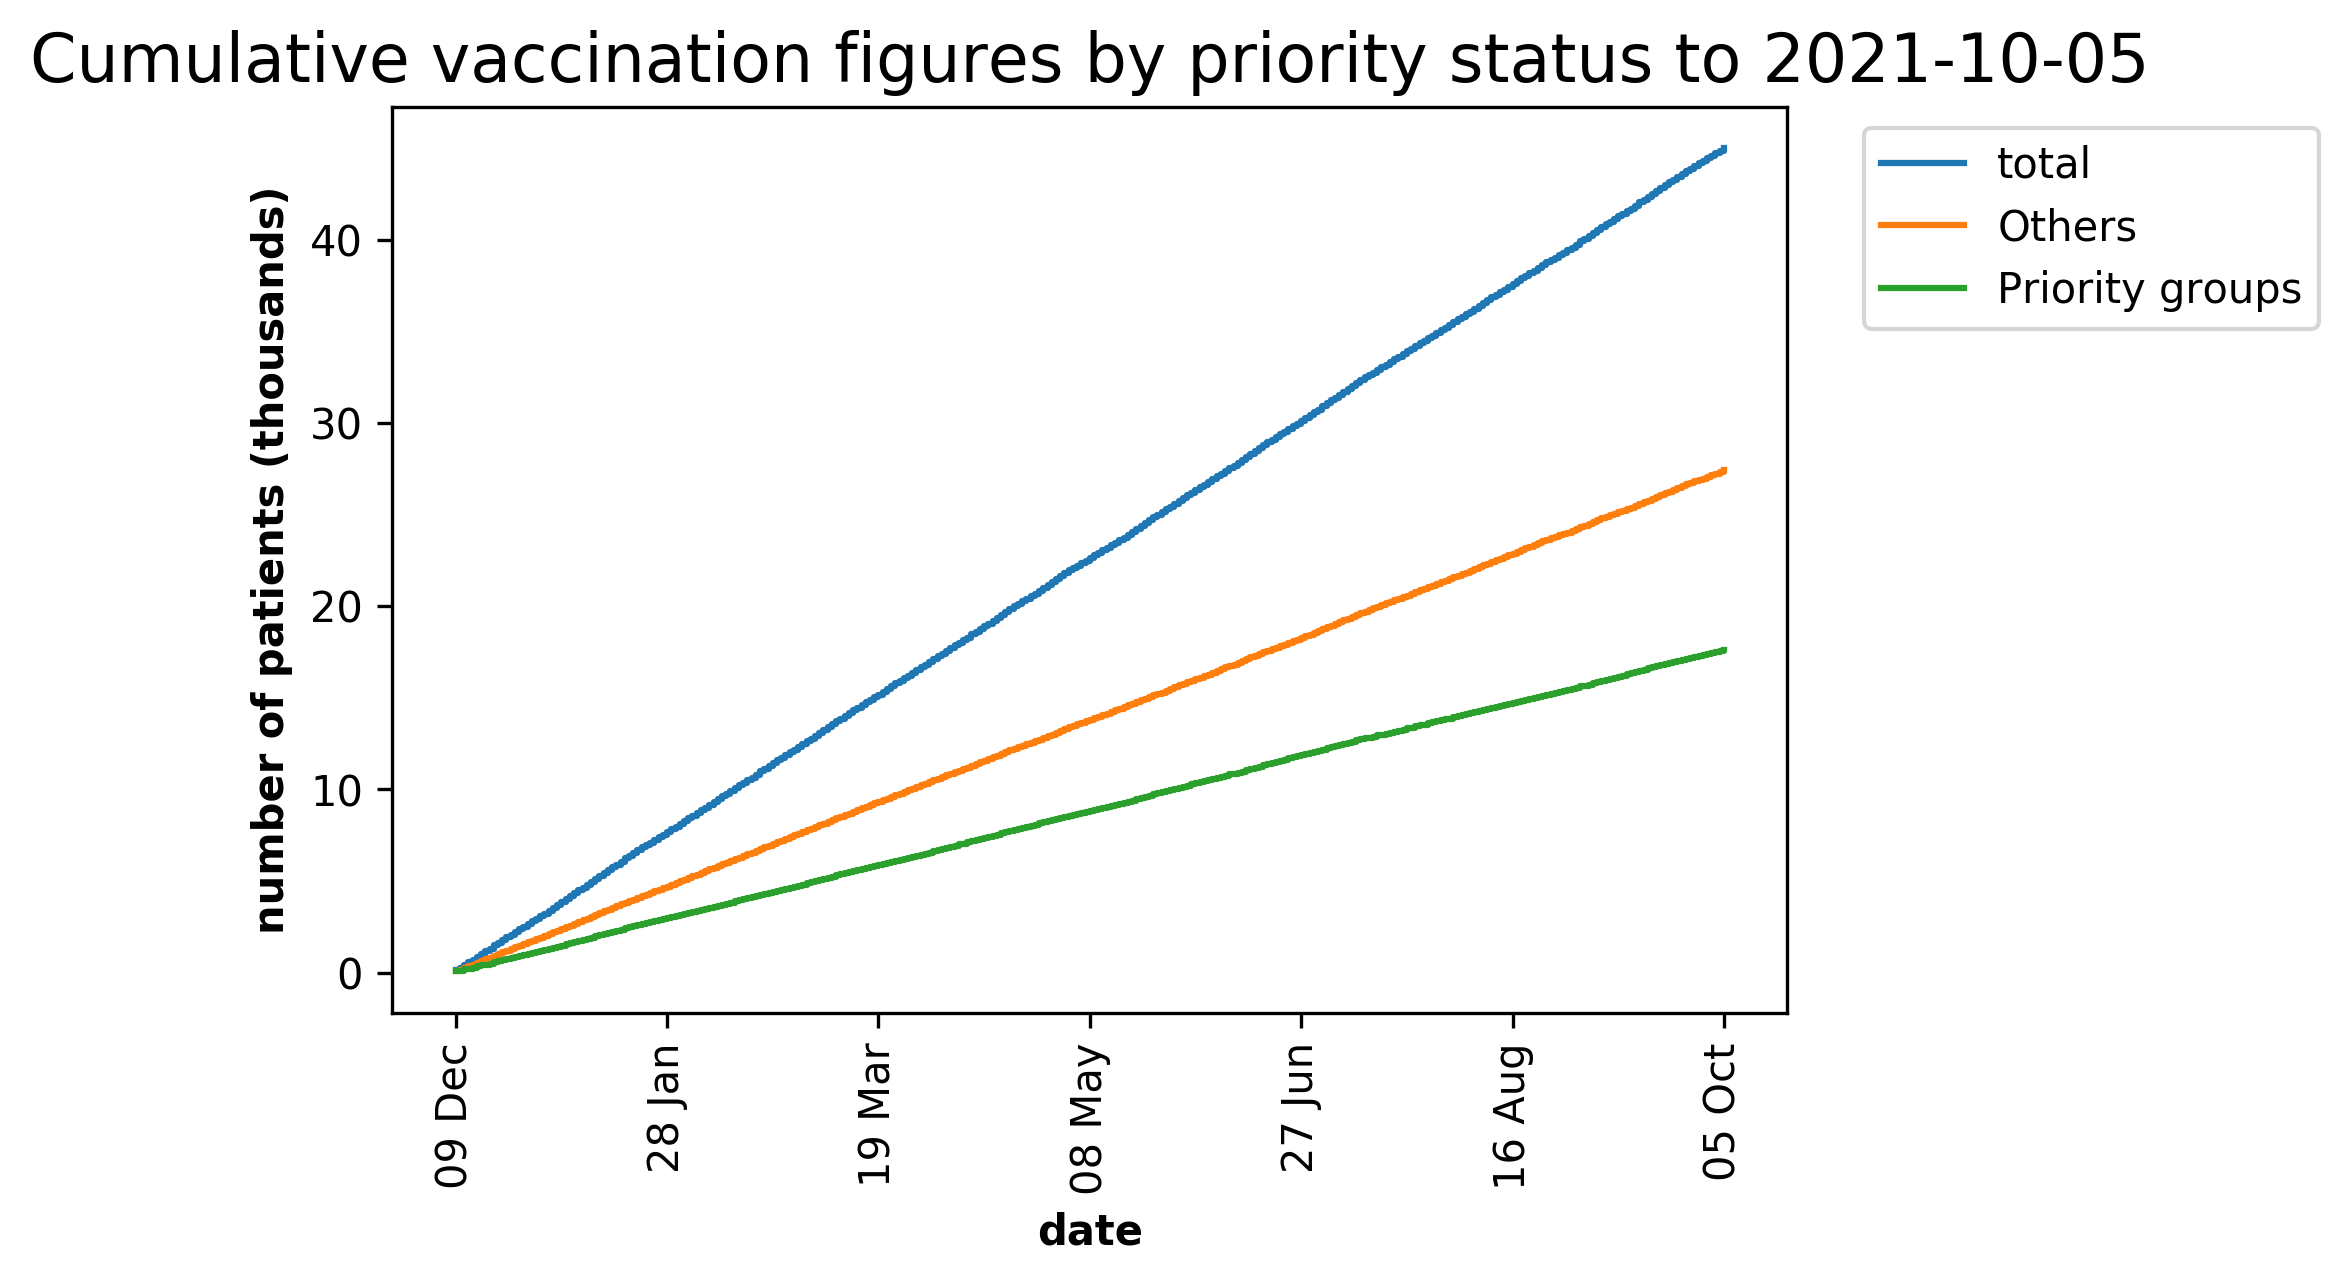

**Note:** 'Priority groups' only includes those identified as being in a priority group by our methodology.                 'Others' includes everyone aged 18-49 except those who are shielding or have a learning disability.<br><br>

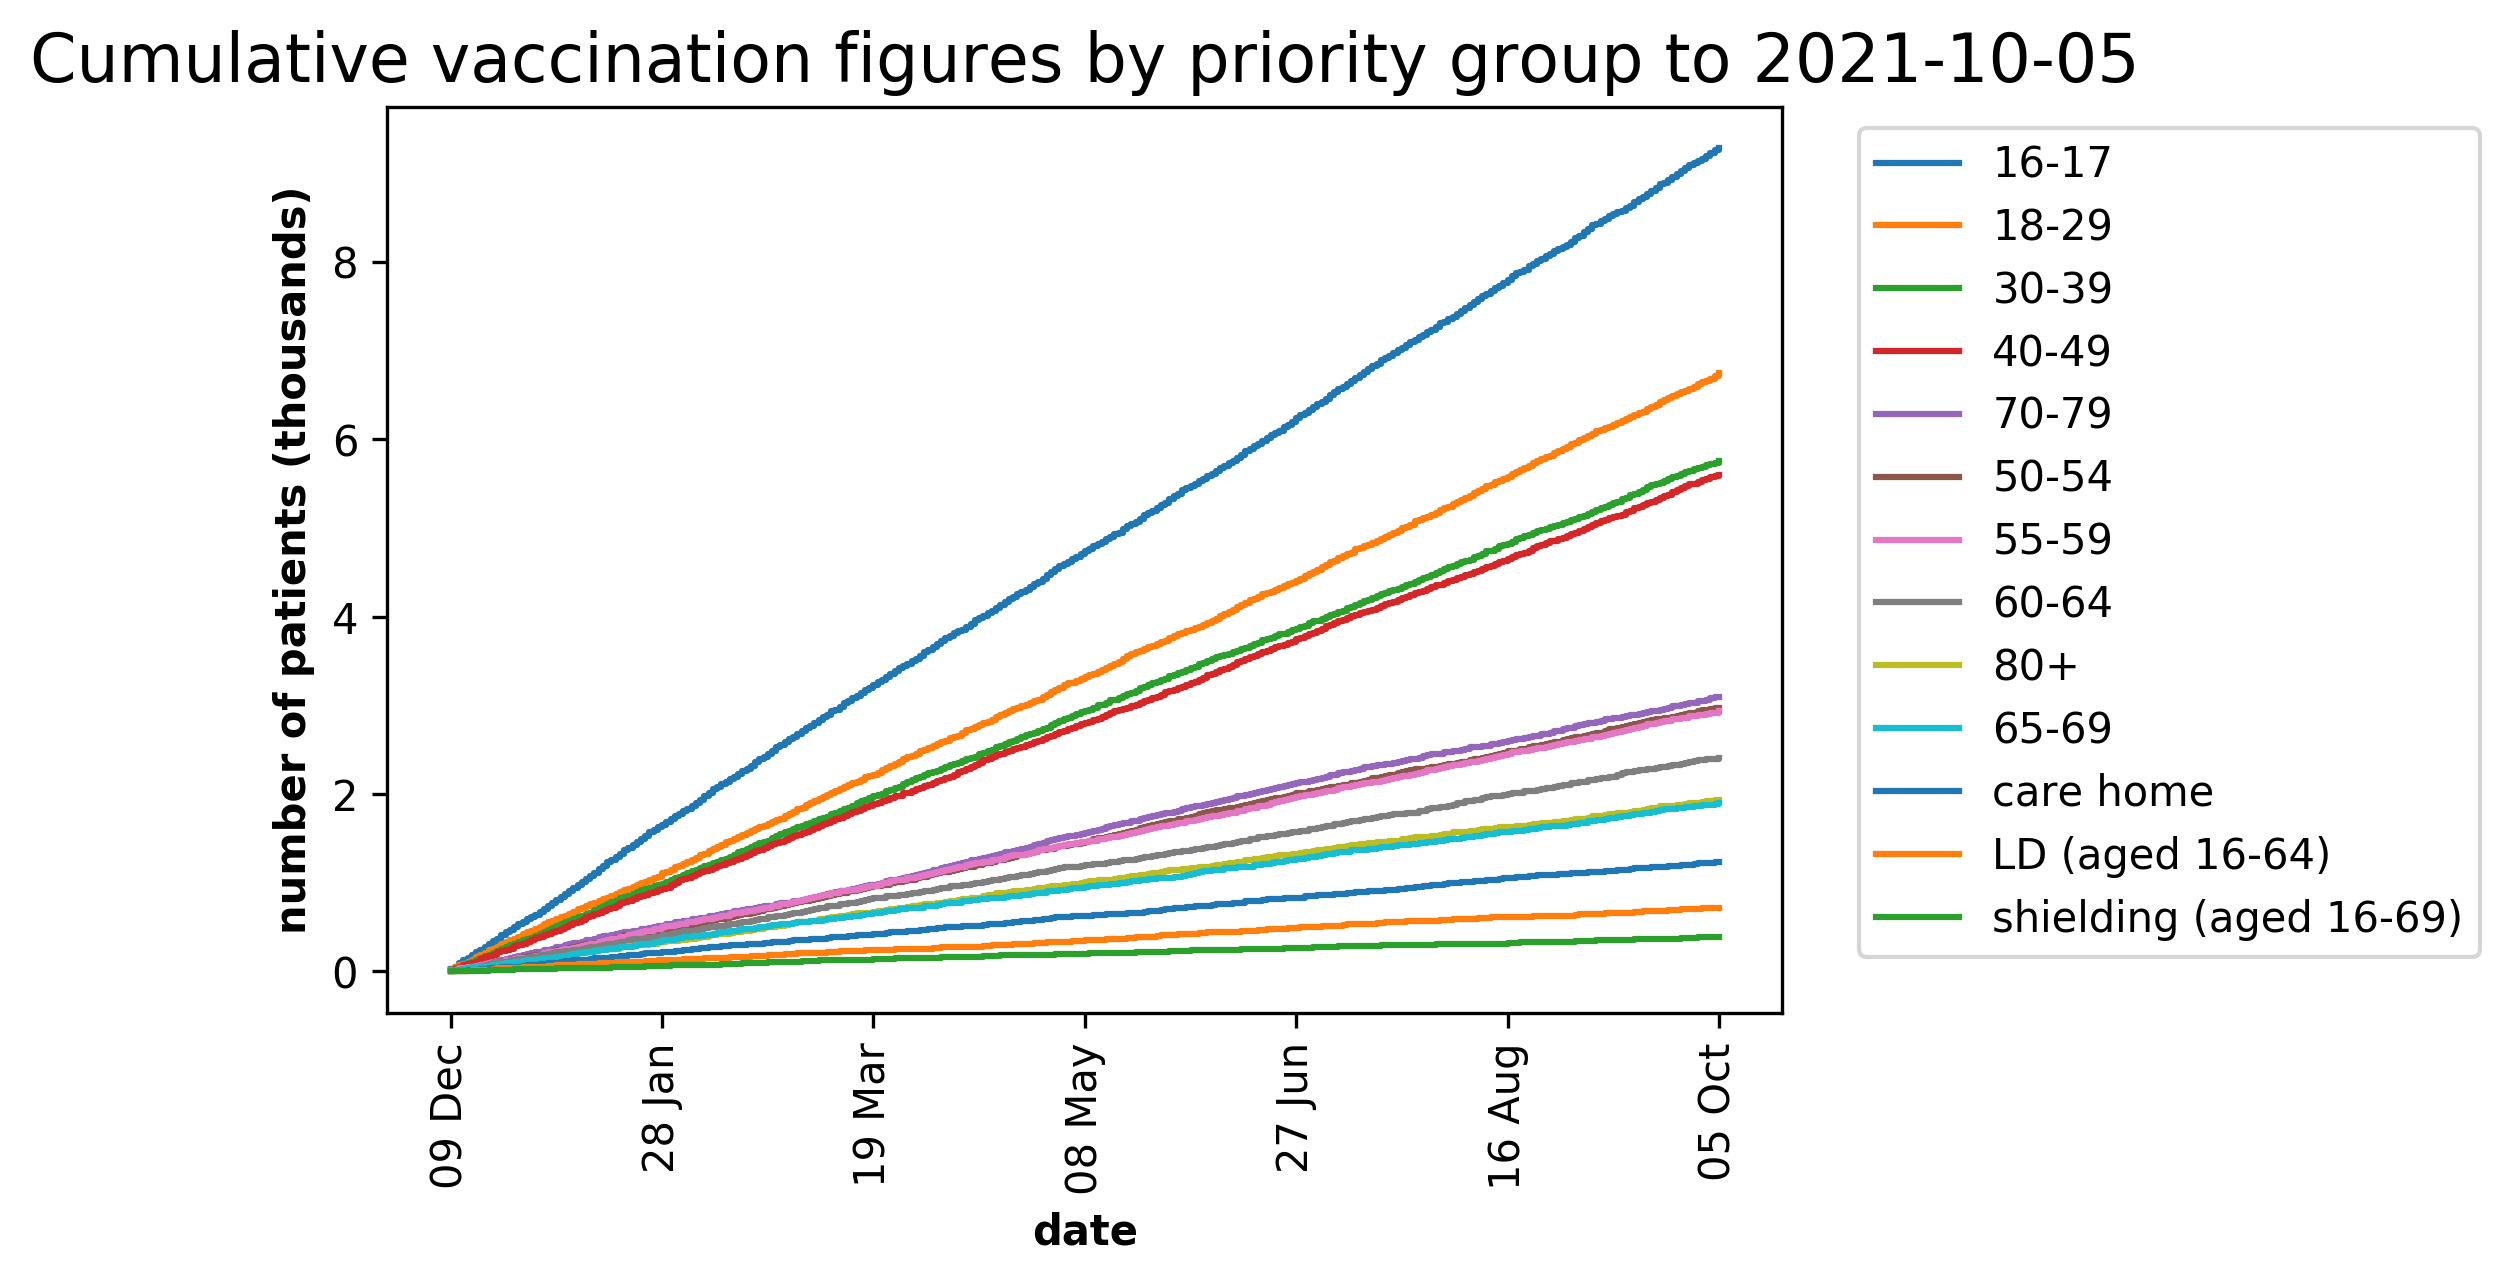

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *
from image_formats import pick_image_format

IMAGE_FORMAT = pick_image_format()

show_chart(f"Cumulative vaccination figures by priority status.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")
display(Markdown("**Note:** 'Priority groups' only includes those identified as being in a priority group by our methodology. \
                'Others' includes everyone aged 18-49 except those who are shielding or have a learning disability.<br><br>"))
show_chart(f"Cumulative vaccination figures by priority group.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")


# 
## Trends in vaccination rates of **80+** population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*_Latest overall cohort rate_ calculated as at latest date for vaccinations recorded across all TPP practices.**

## 80+ population

### COVID vaccinations among 80+ population
 ### by Sex

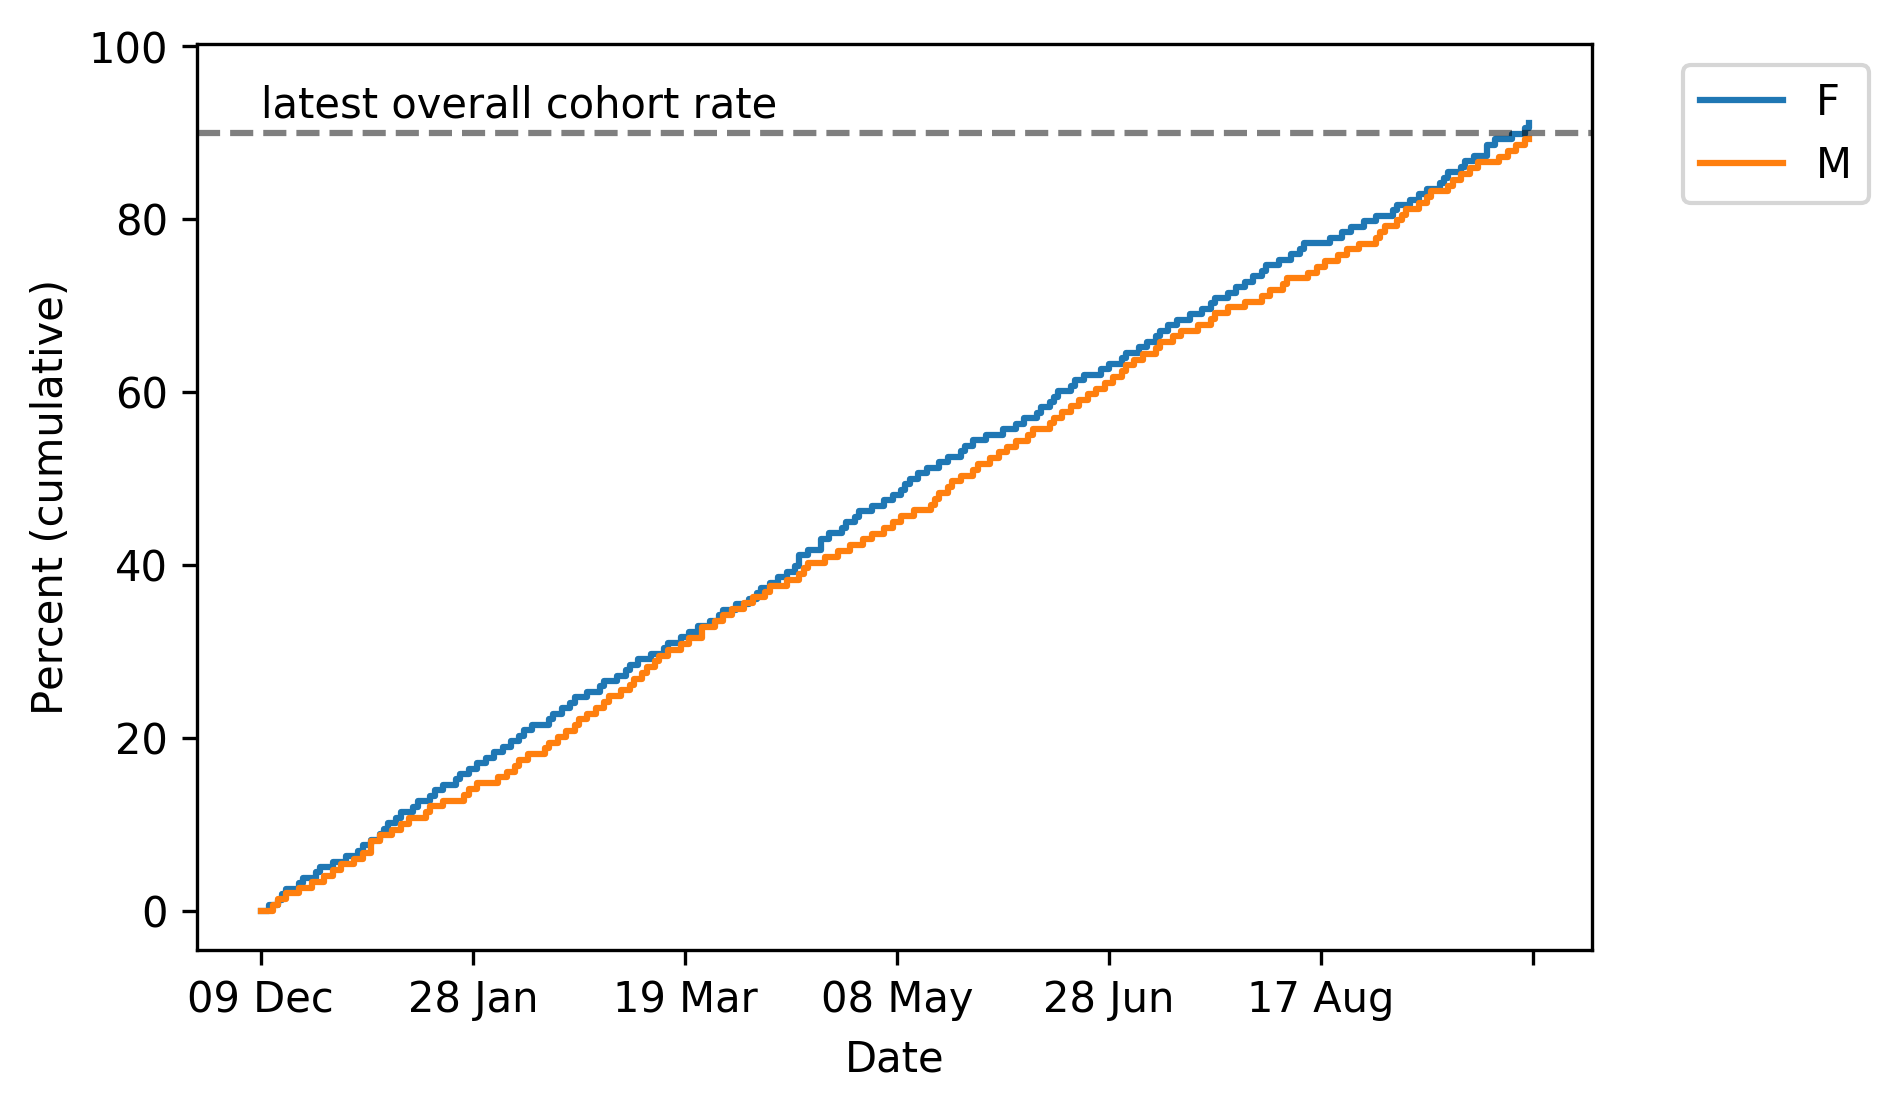

### COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

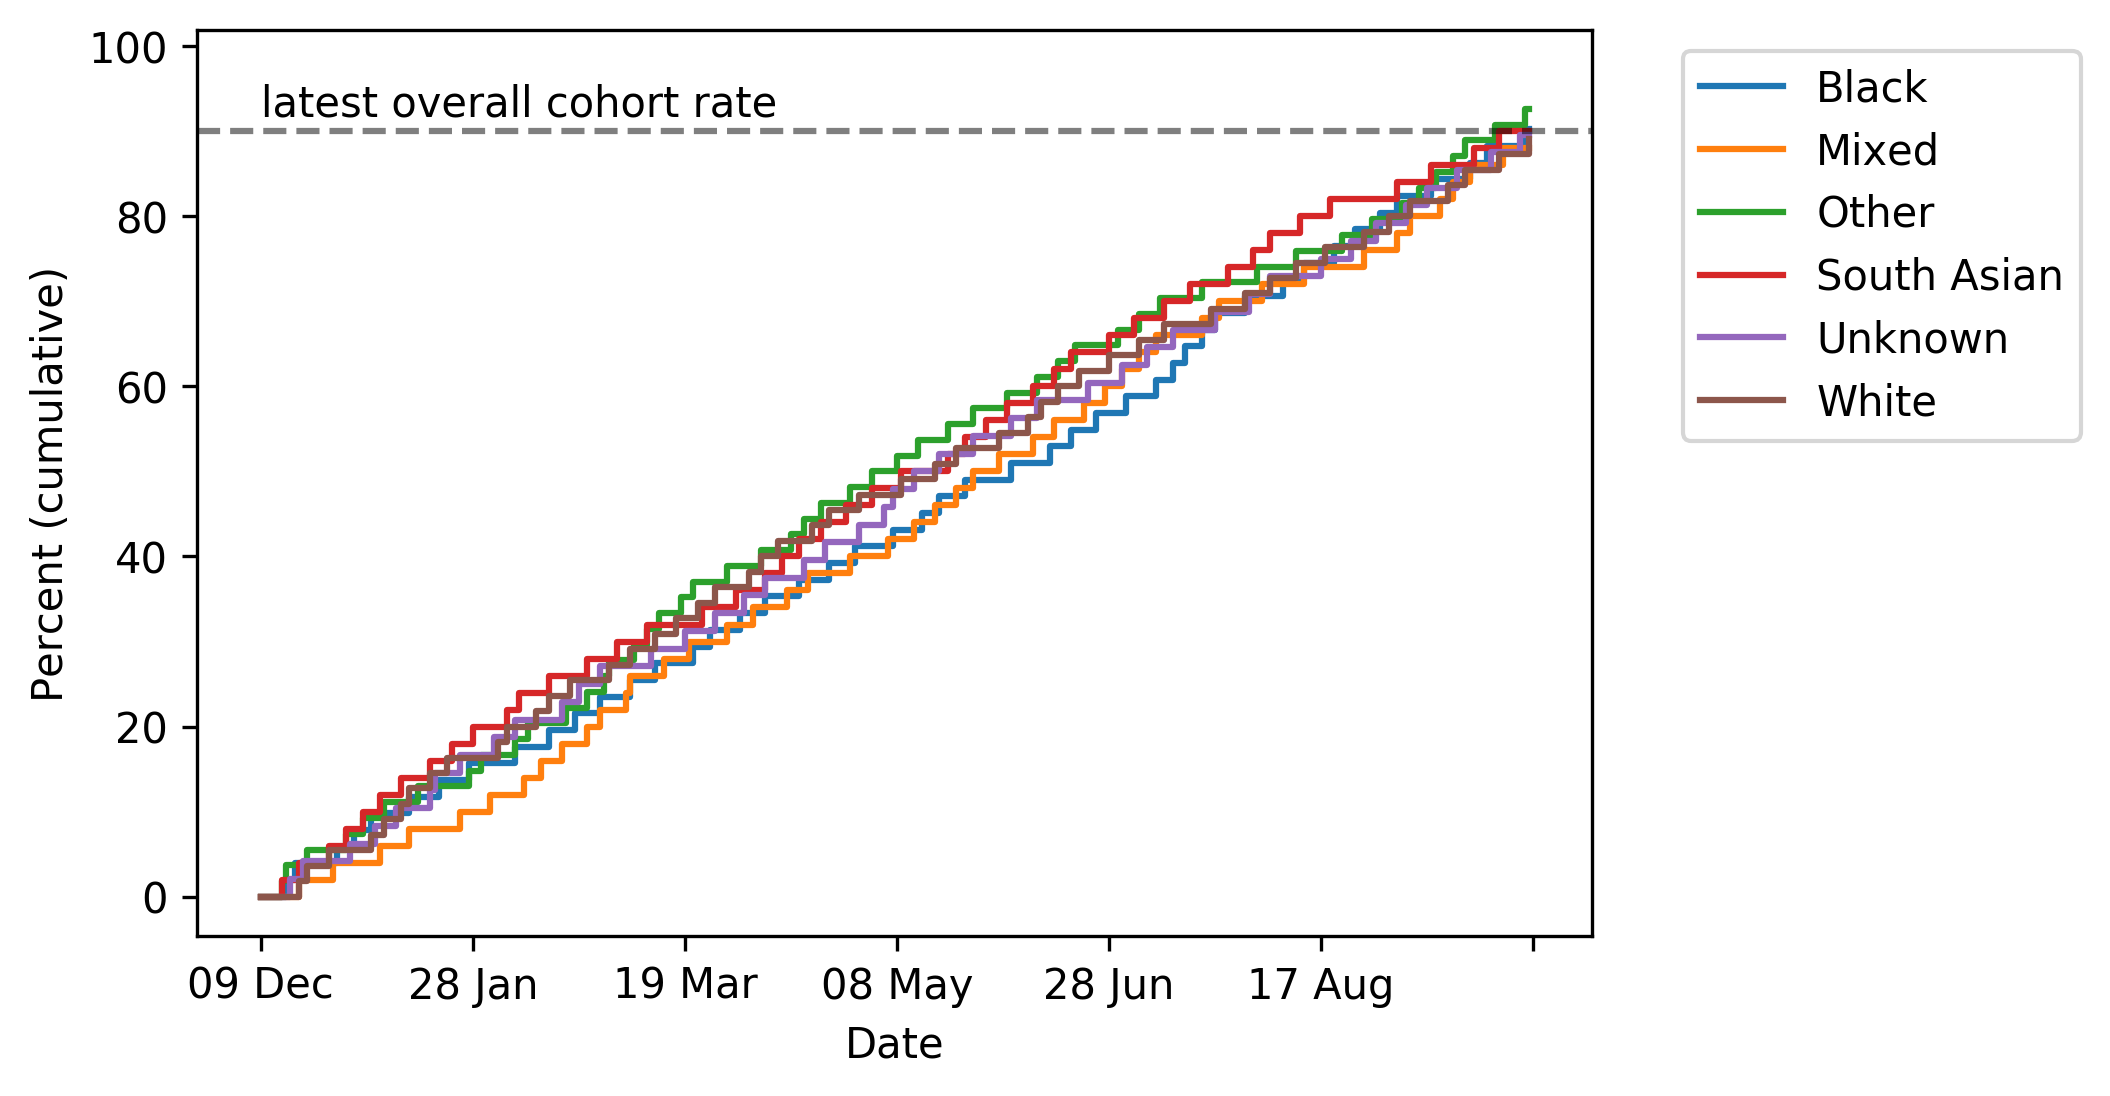

### COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

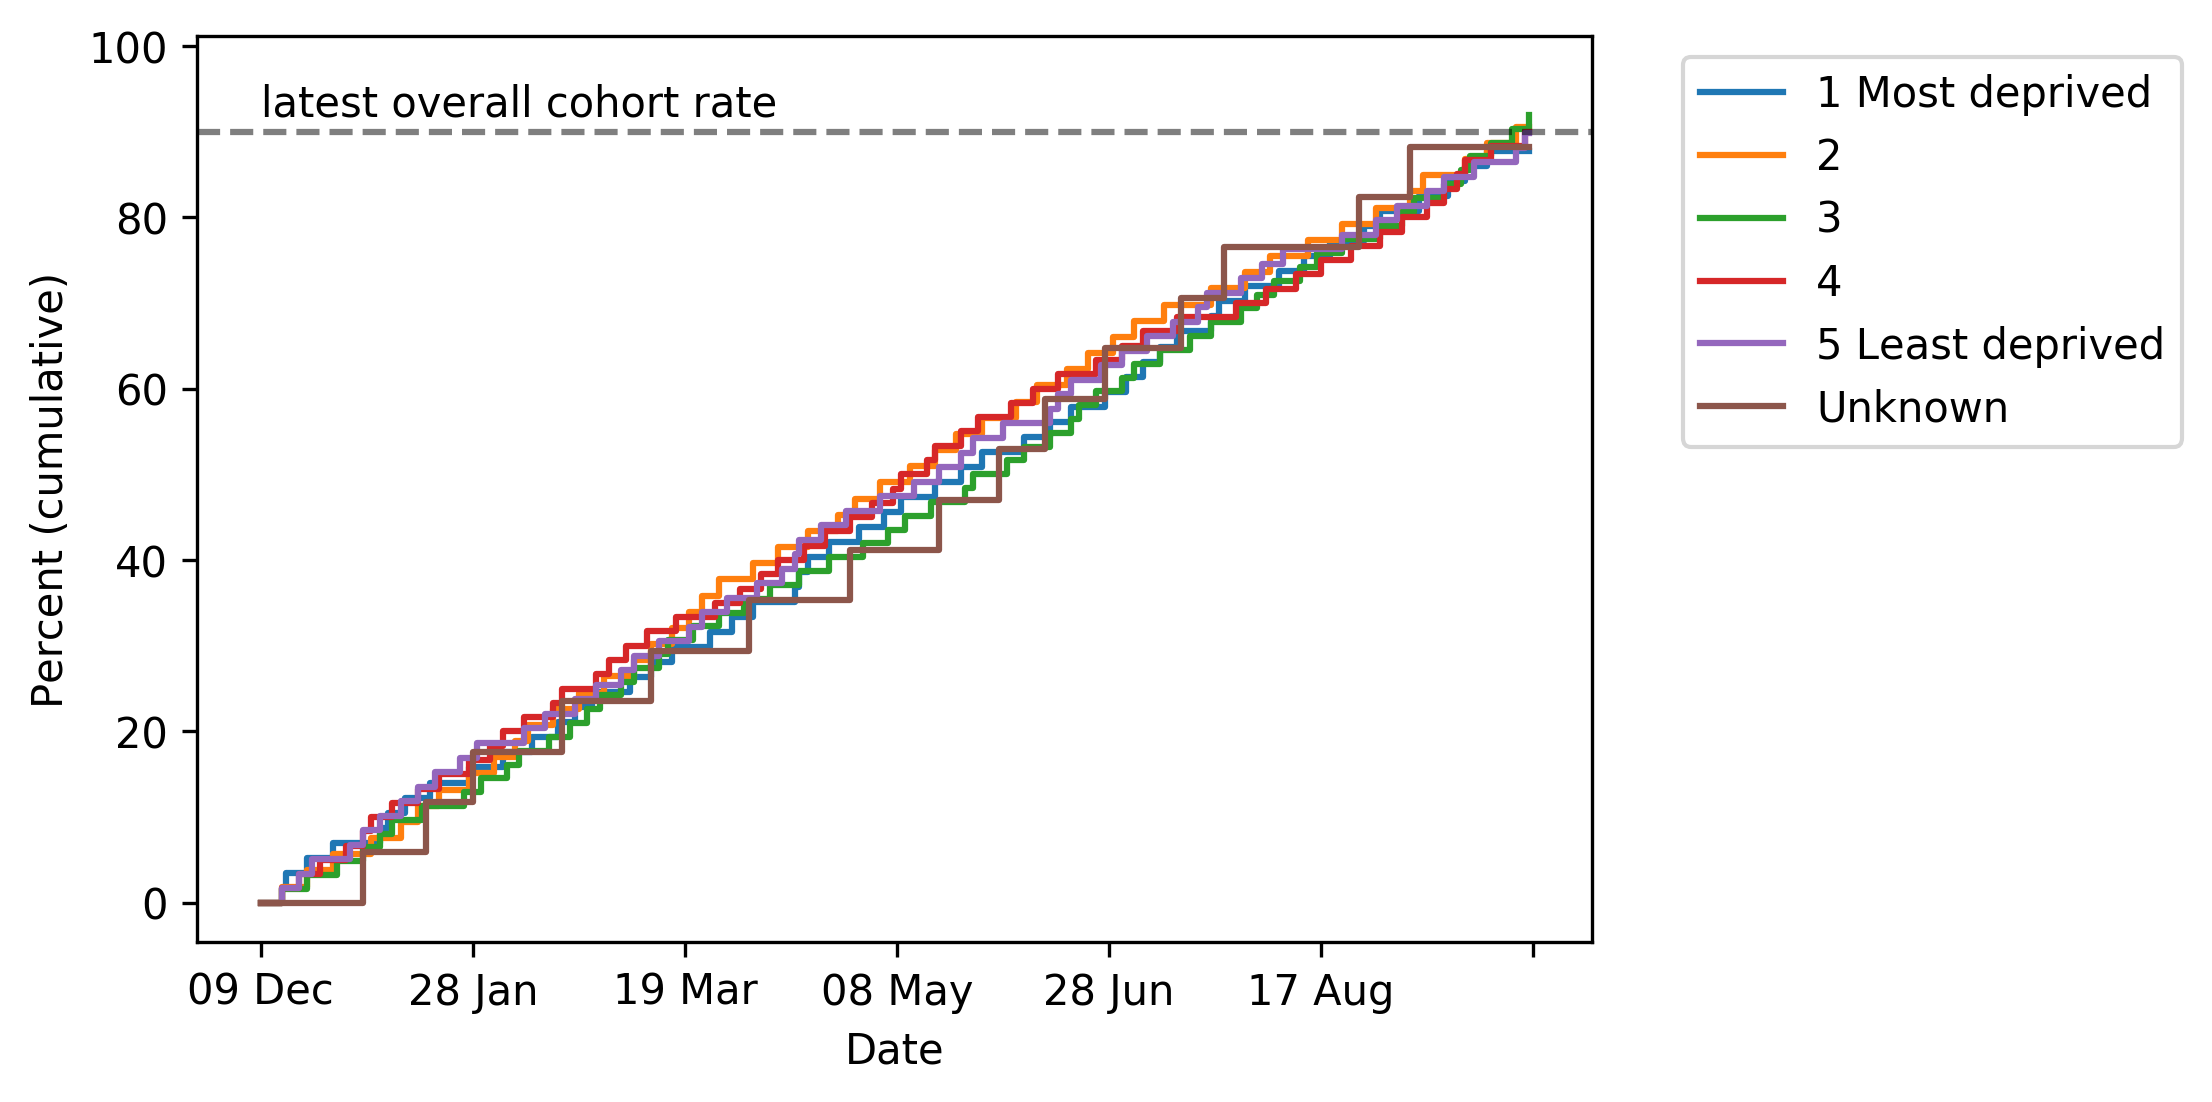

### COVID vaccinations among 80+ population
 ### by BMI

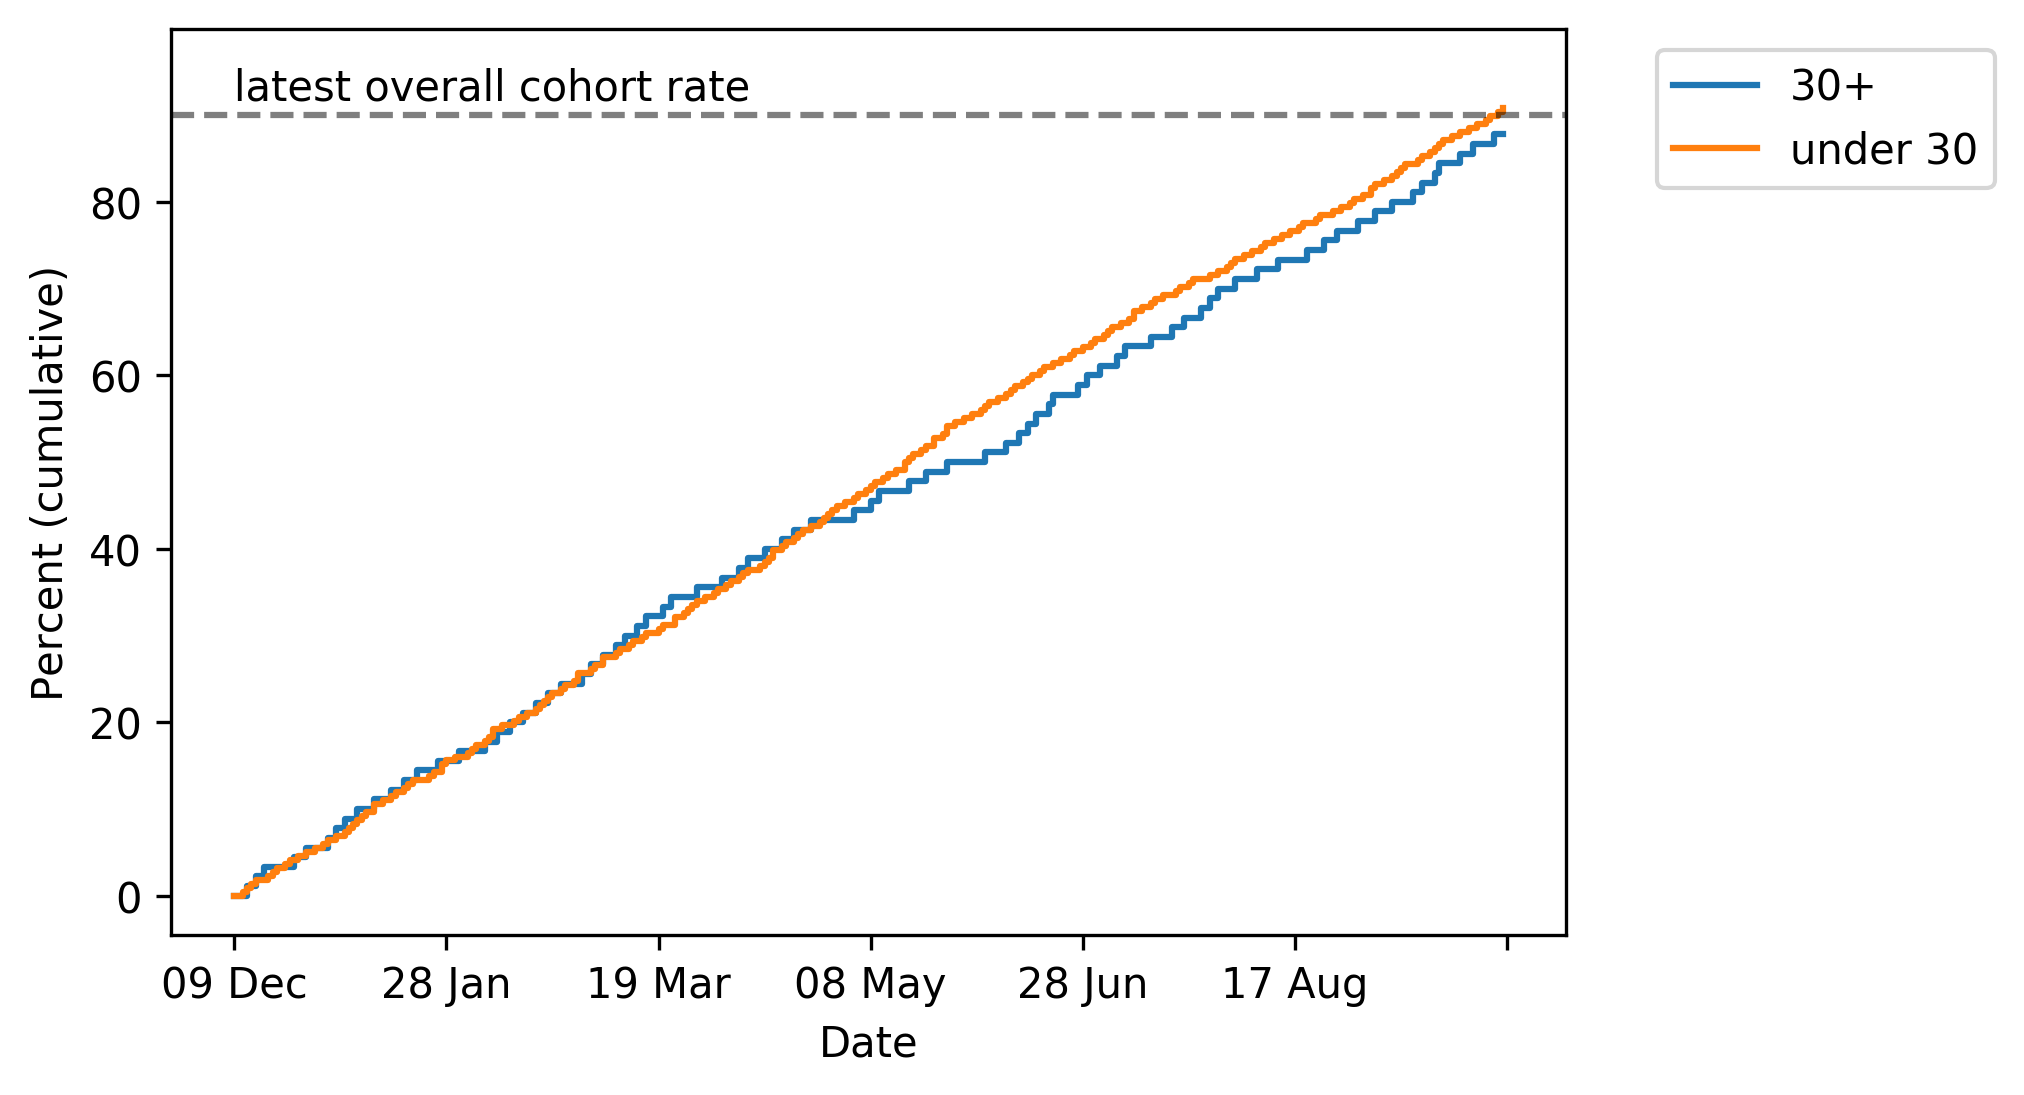

### COVID vaccinations among 80+ population
 ### by Dialysis

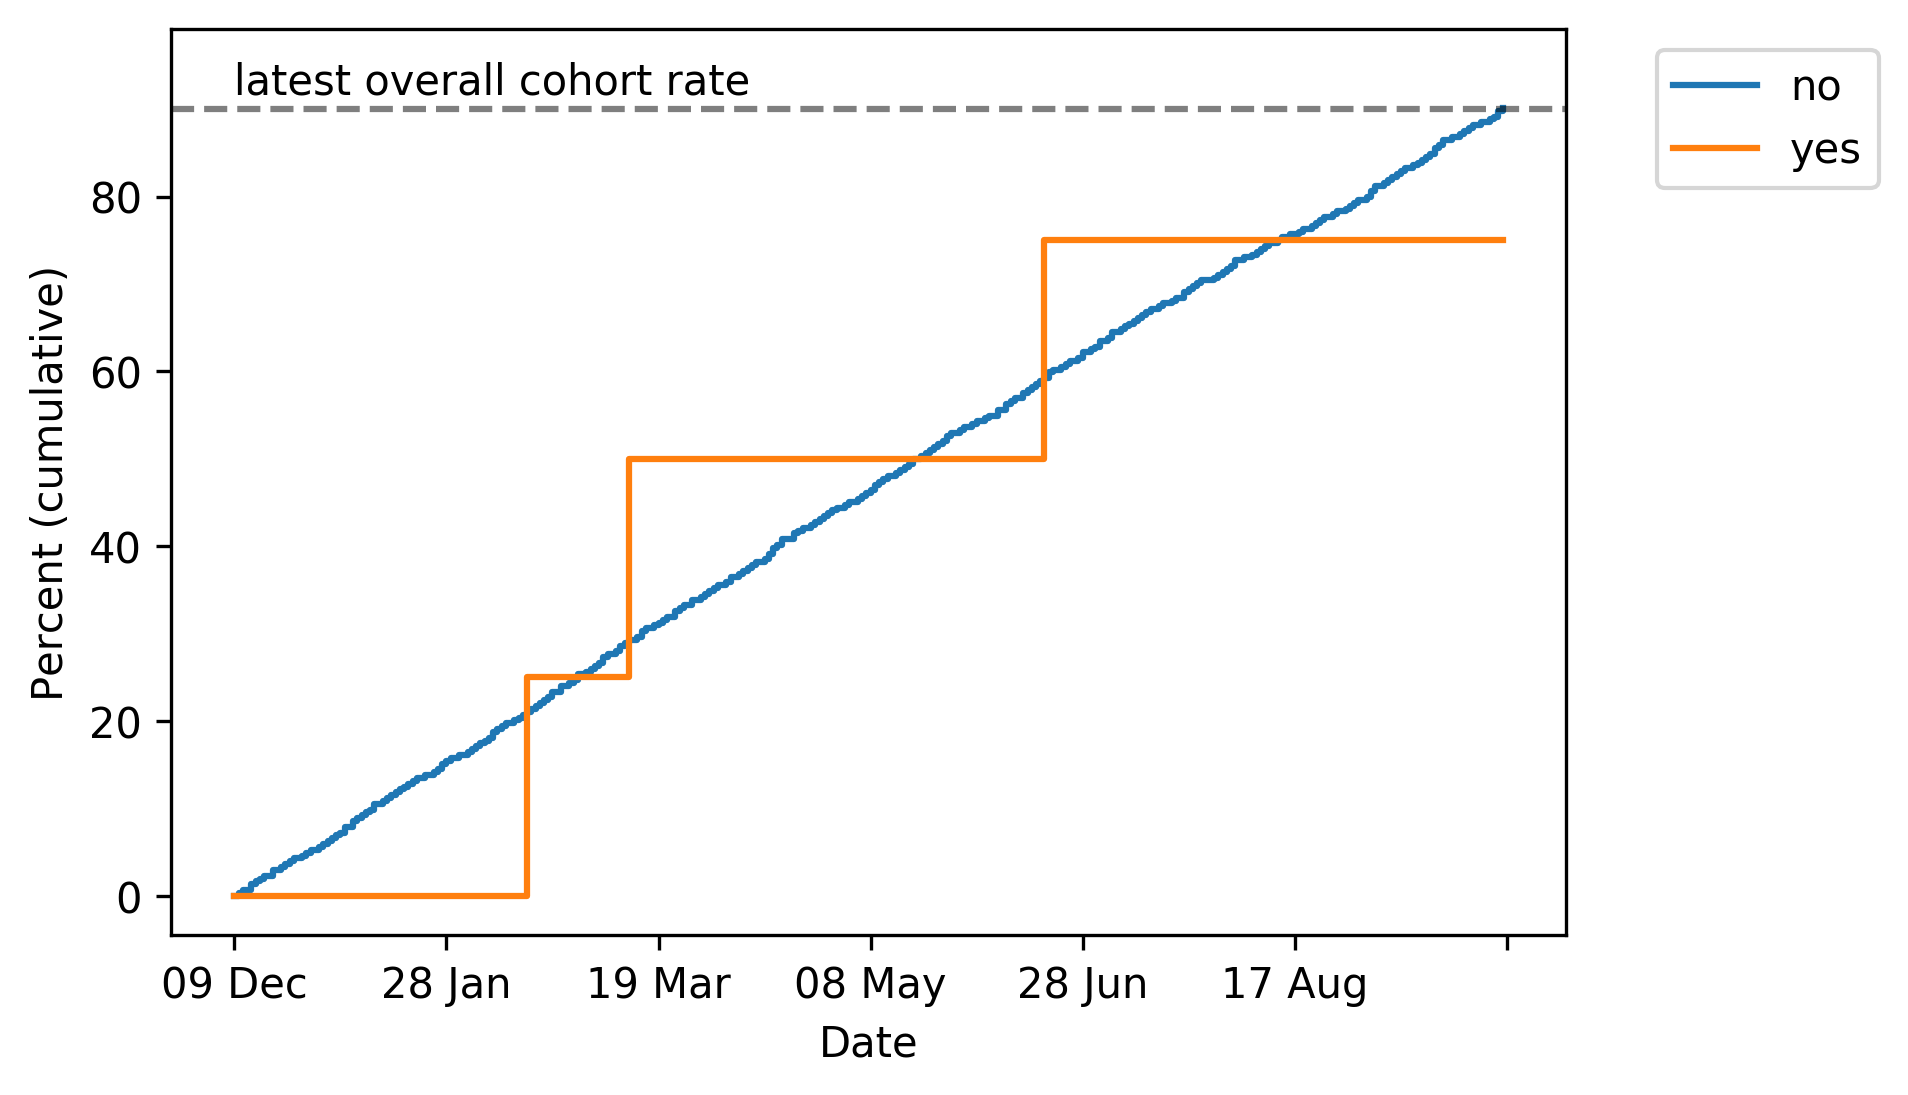

### COVID vaccinations among 80+ population
 ### by Dementia

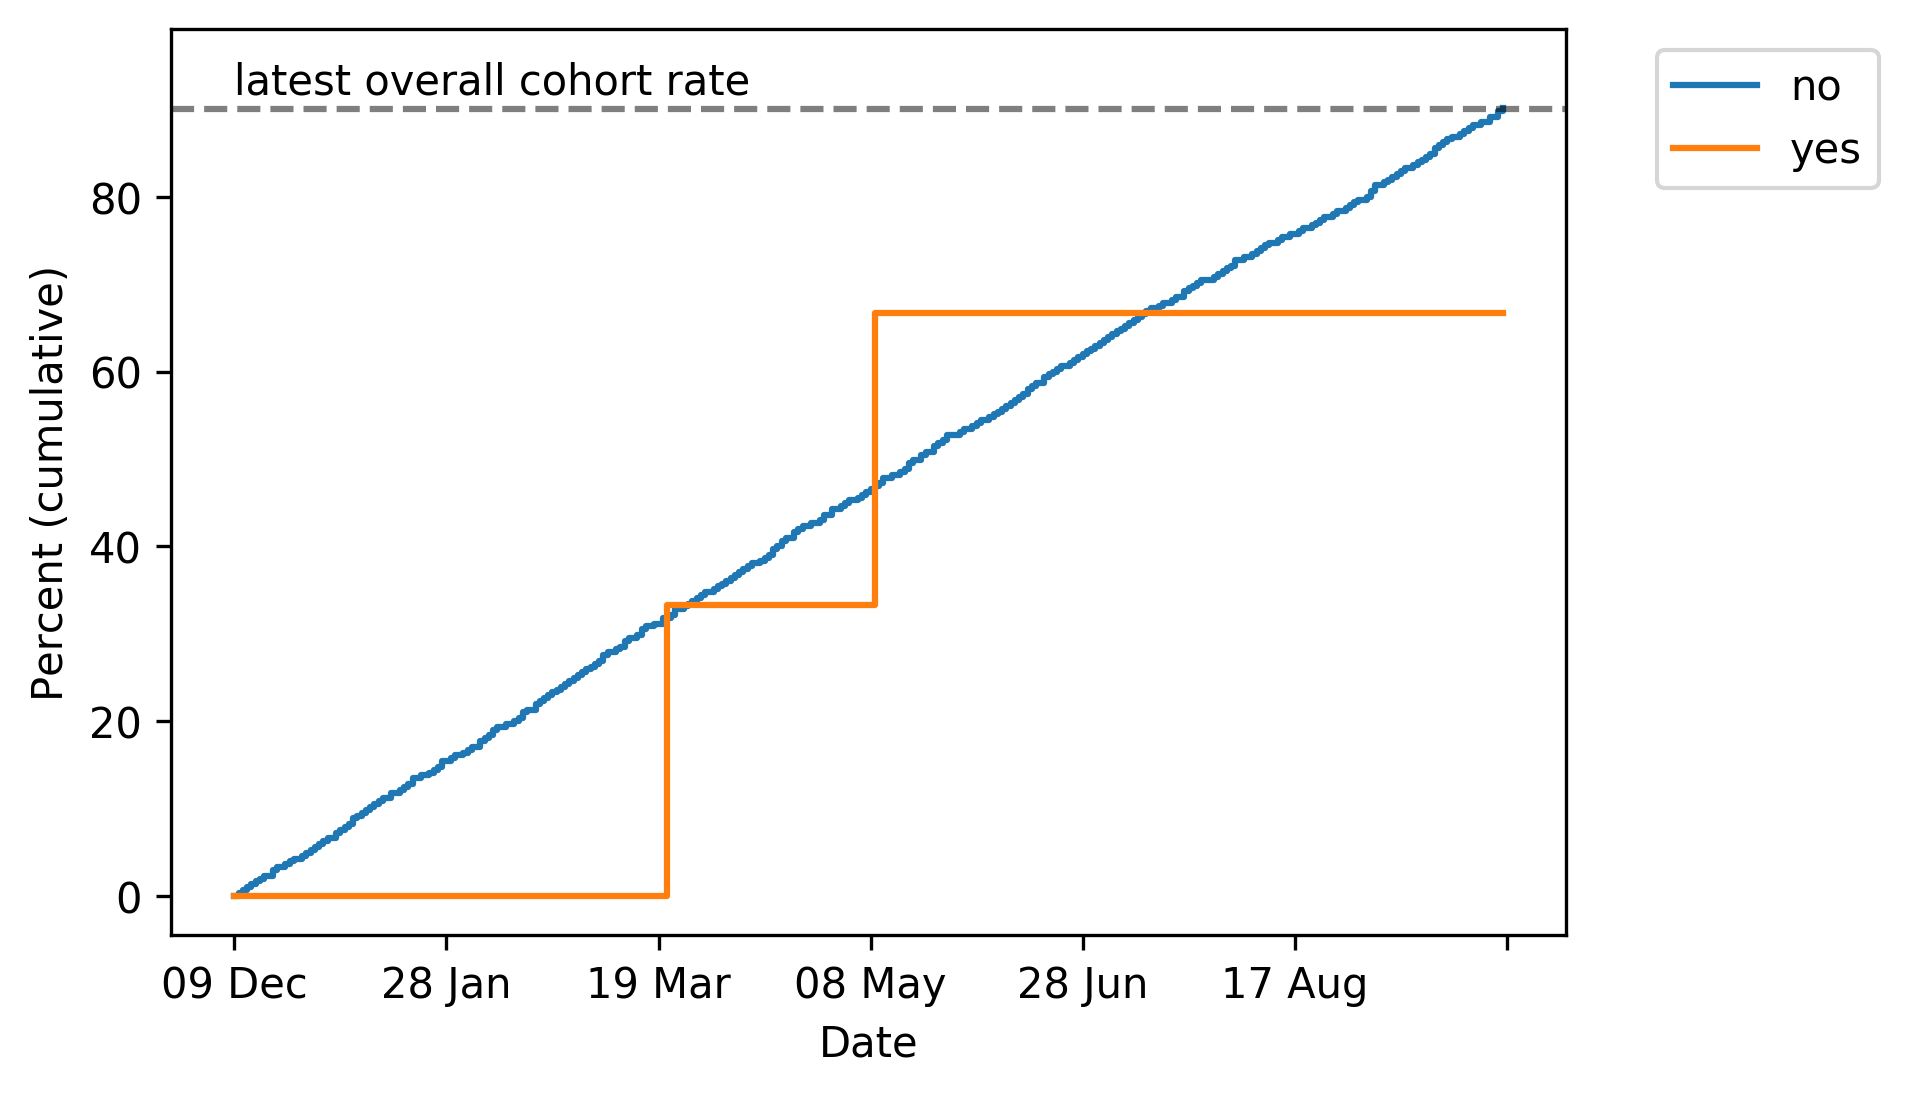

### COVID vaccinations among 80+ population
 ### by Learning disability

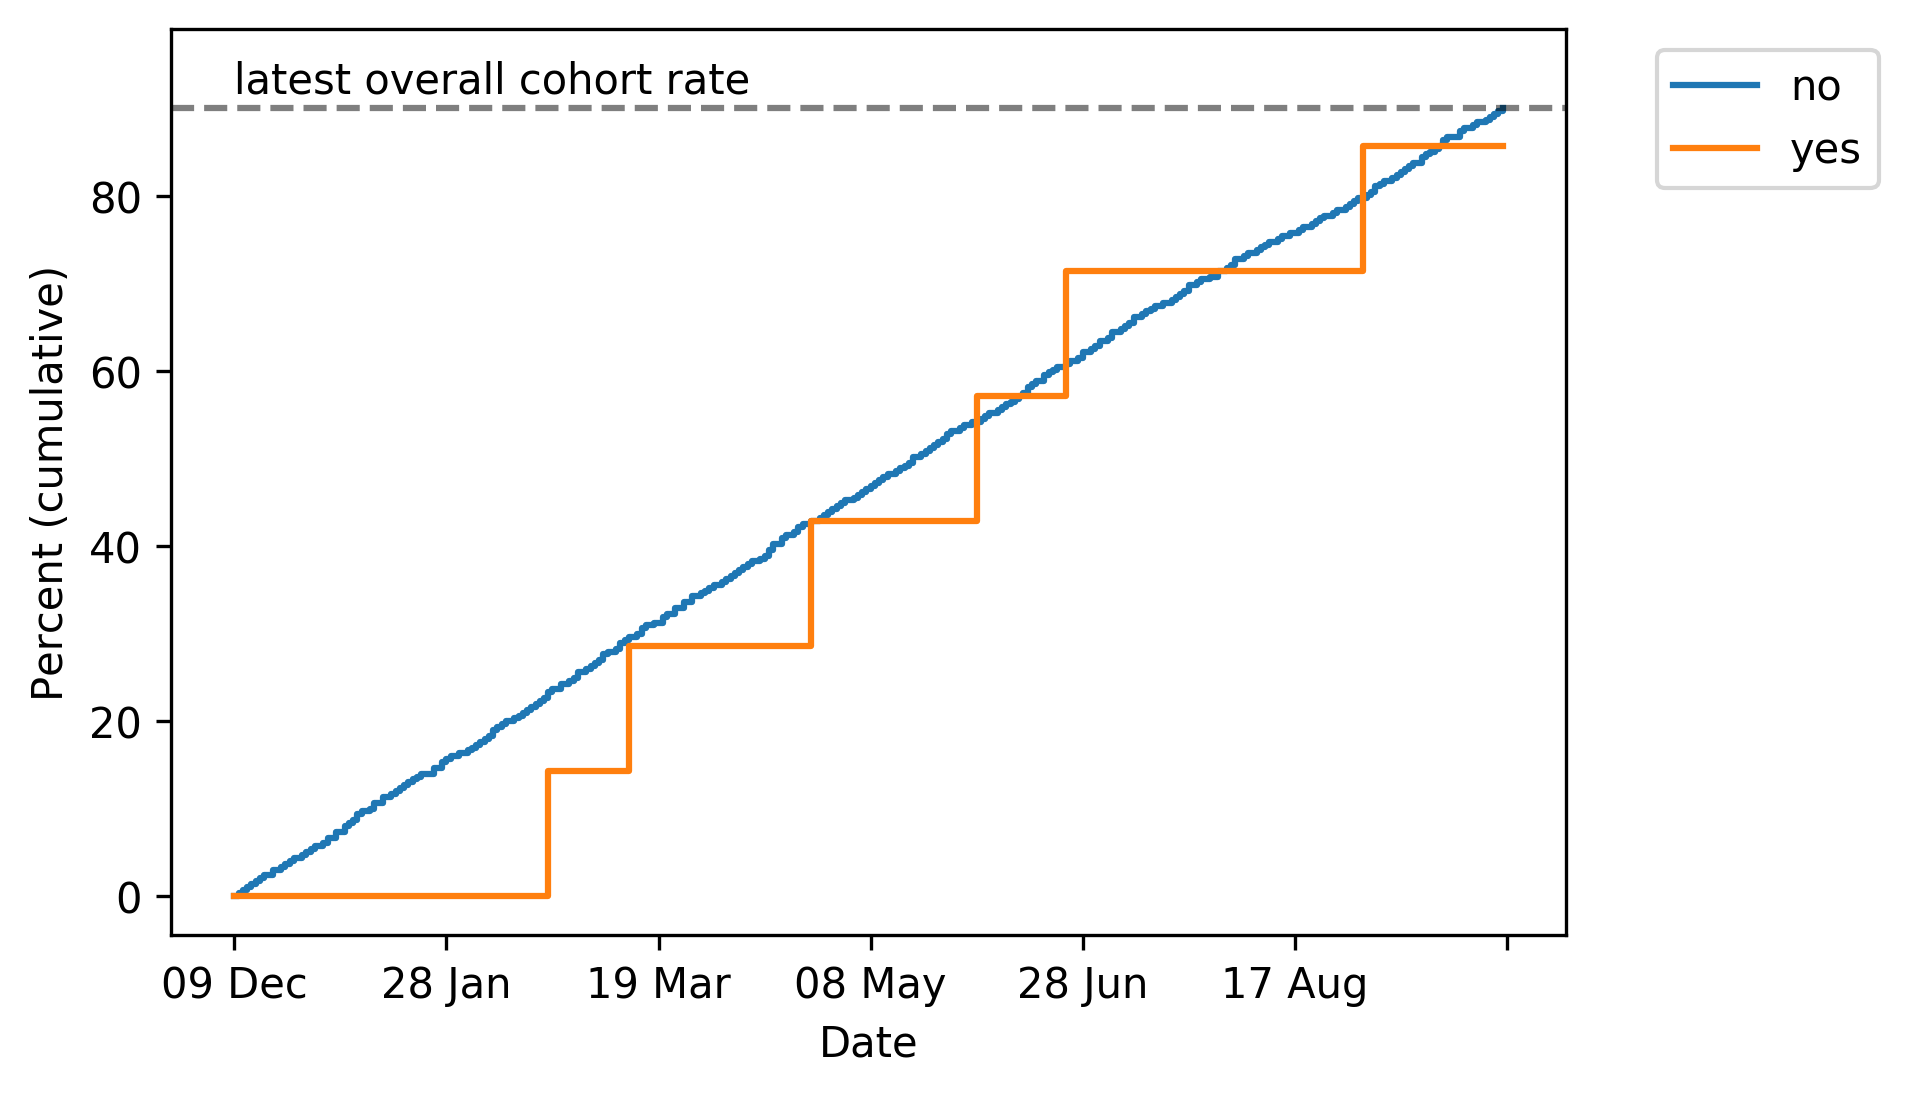

### COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

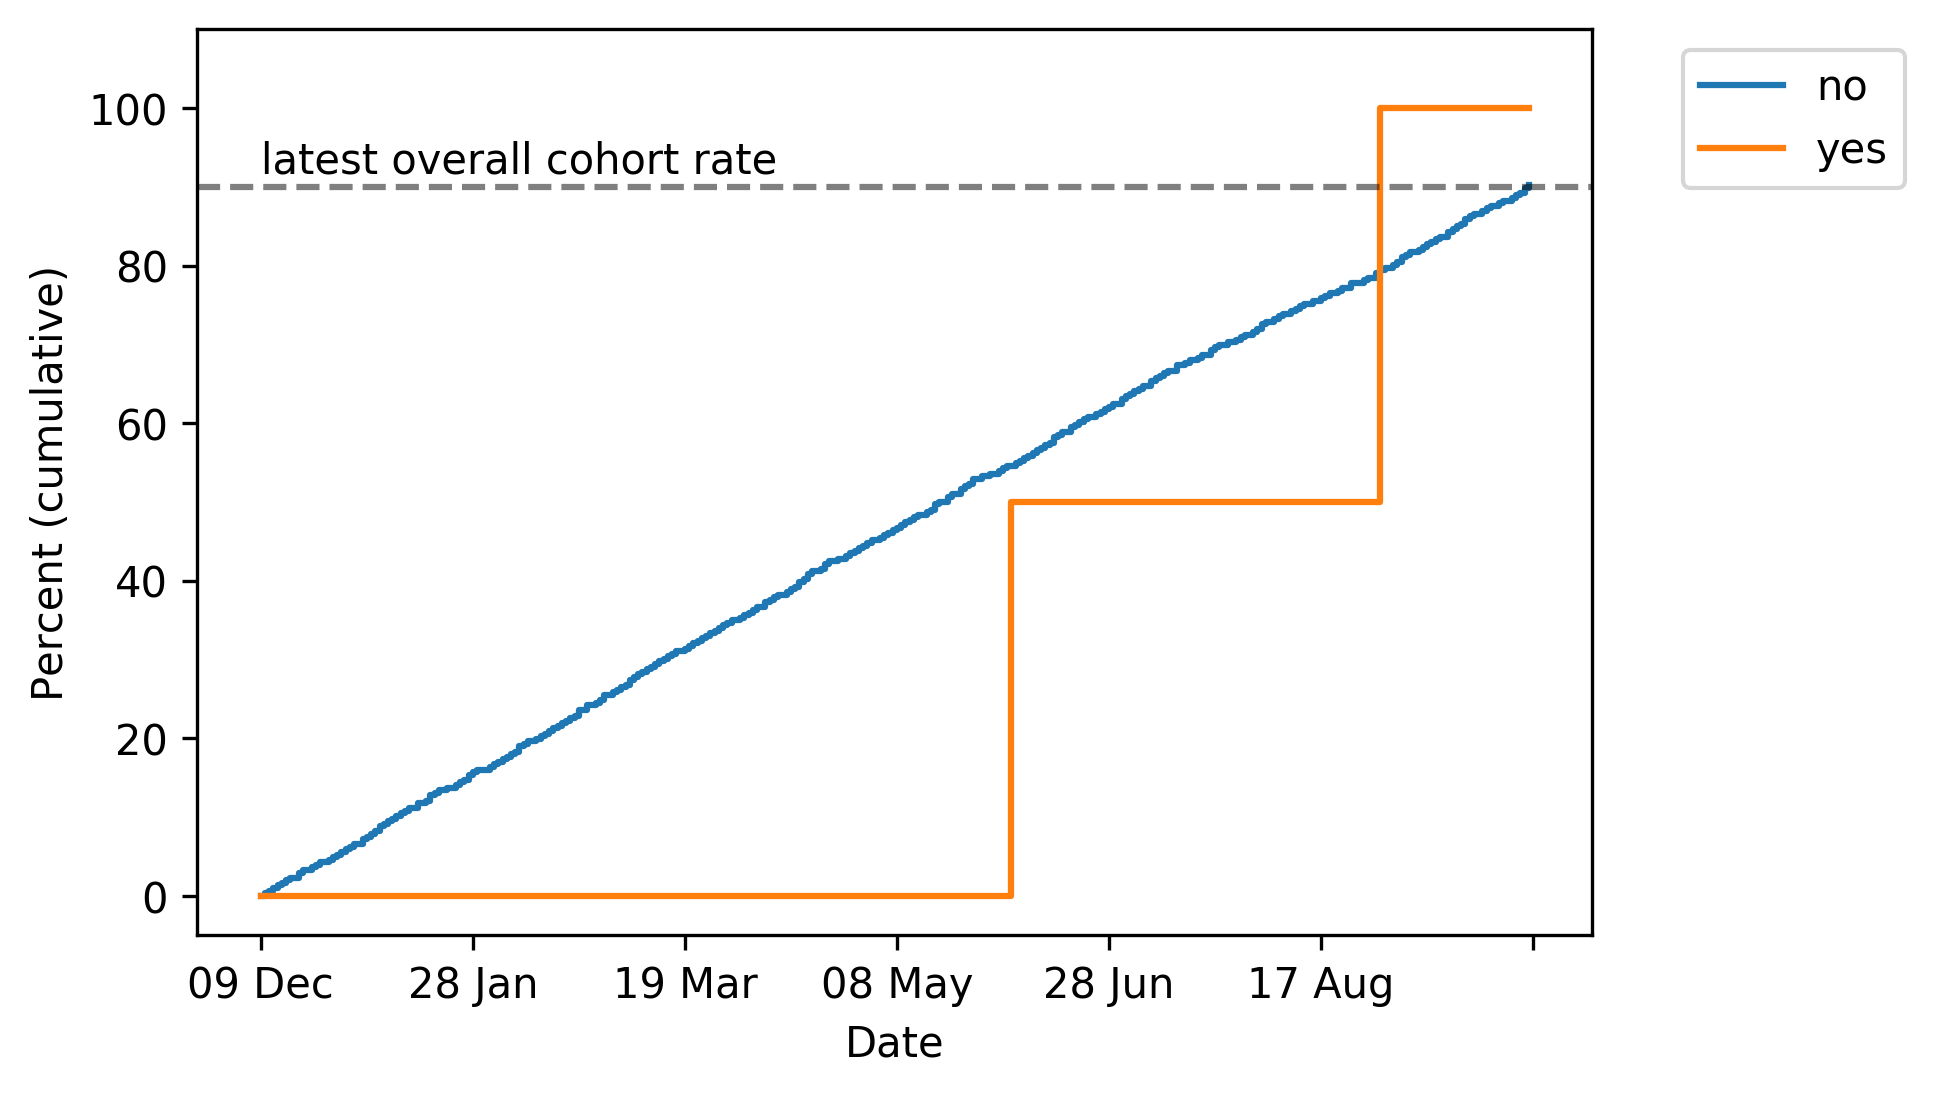

### COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

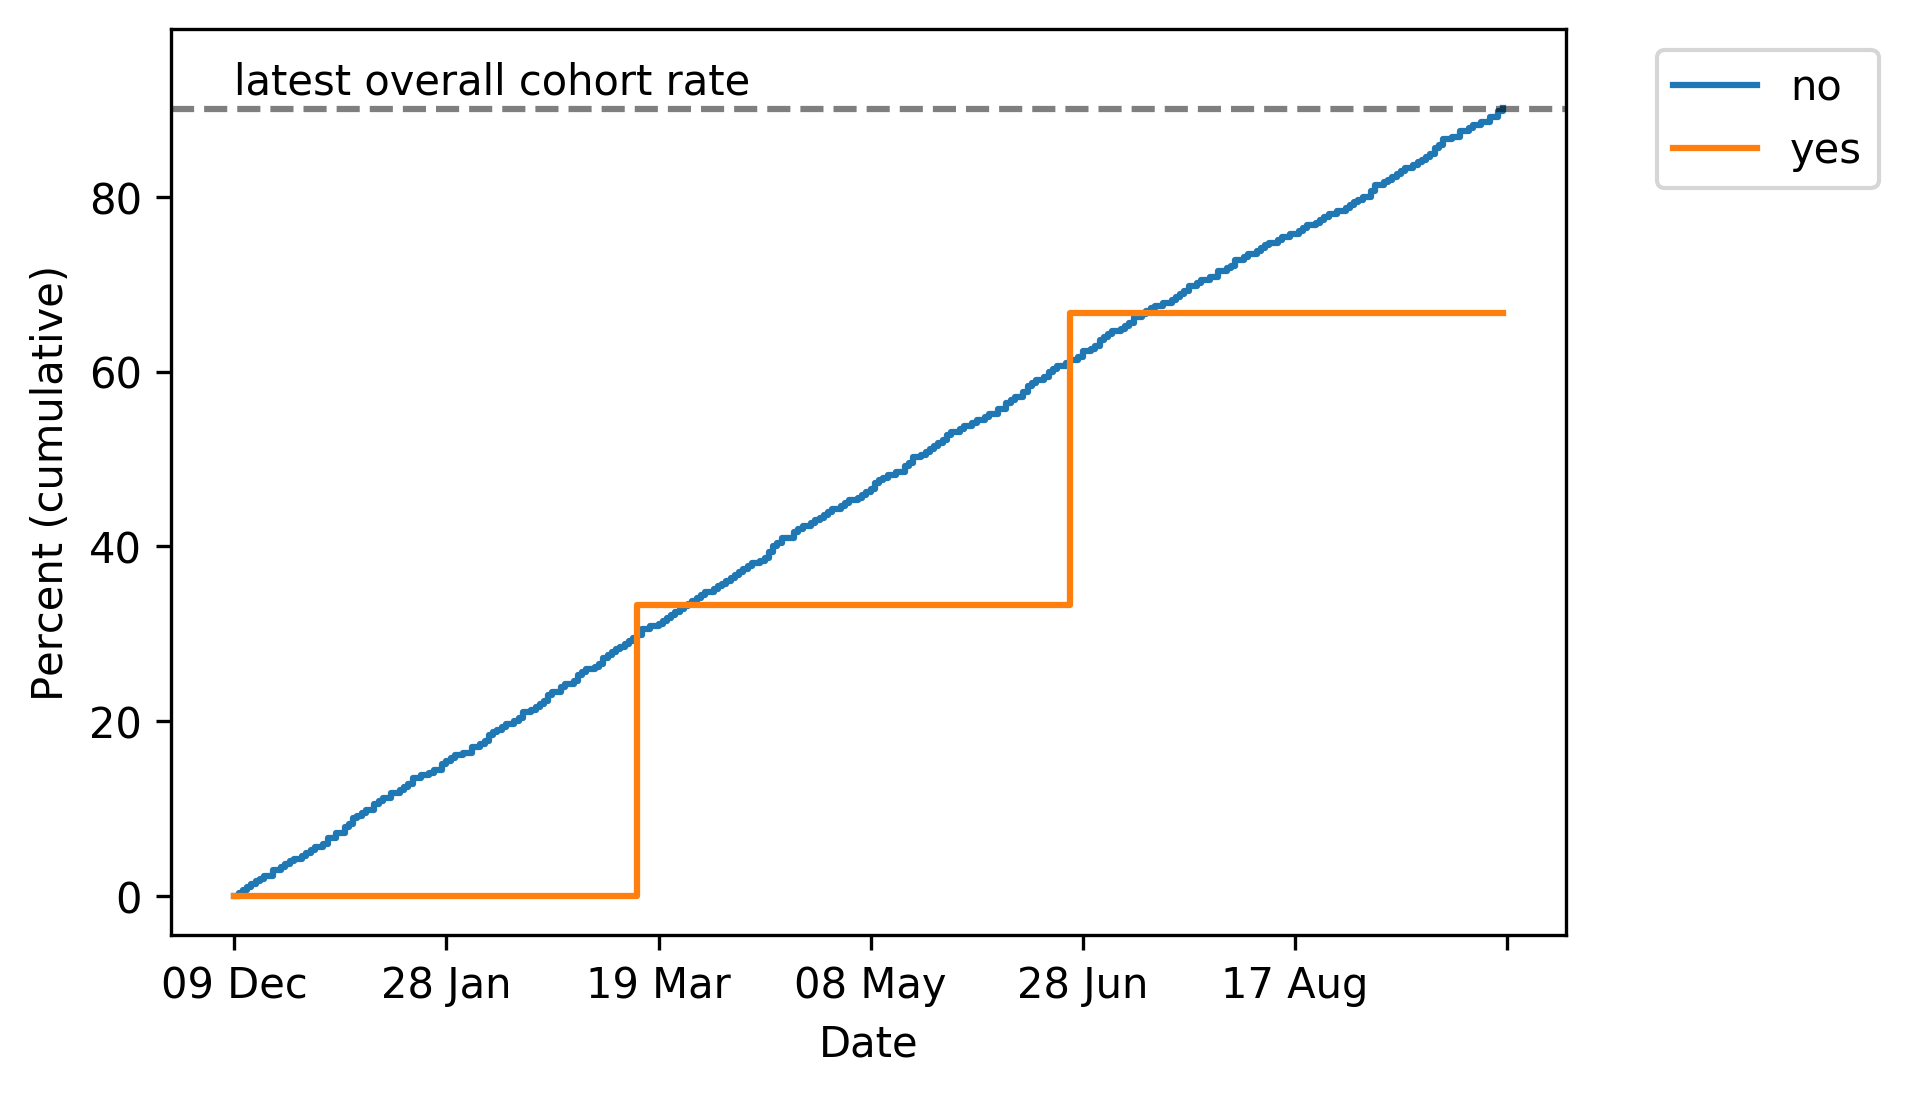

### COVID vaccinations among 80+ population
 ### by Age band

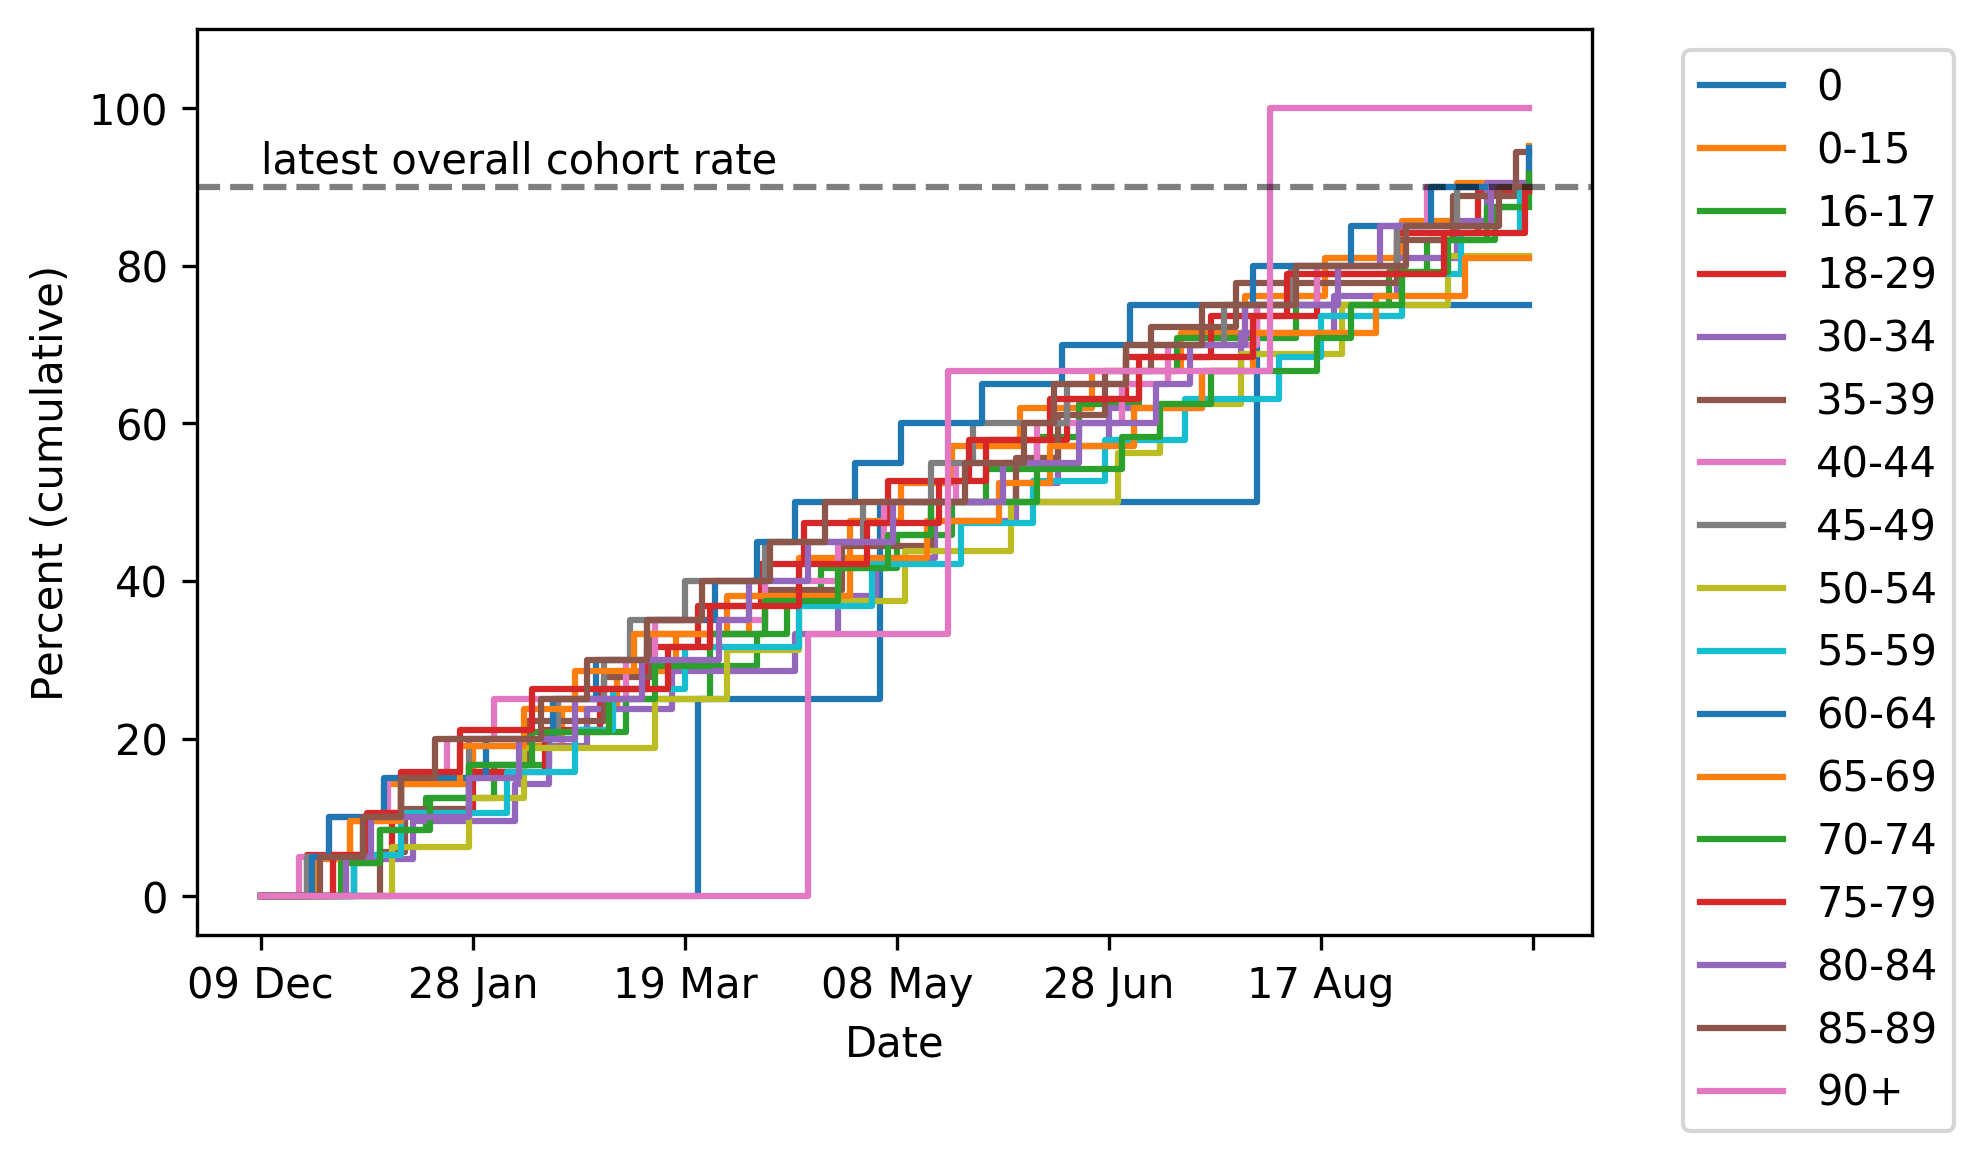

In [4]:
chartlist = find_and_sort_filenames(foldername="figures", file_extension=IMAGE_FORMAT.extension)
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item, IMAGE_FORMAT)

# 
## Trends in vaccination rates of **70-79** population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**
    

## 70-79 population

### COVID vaccinations among 70-79 population
 ### by Sex

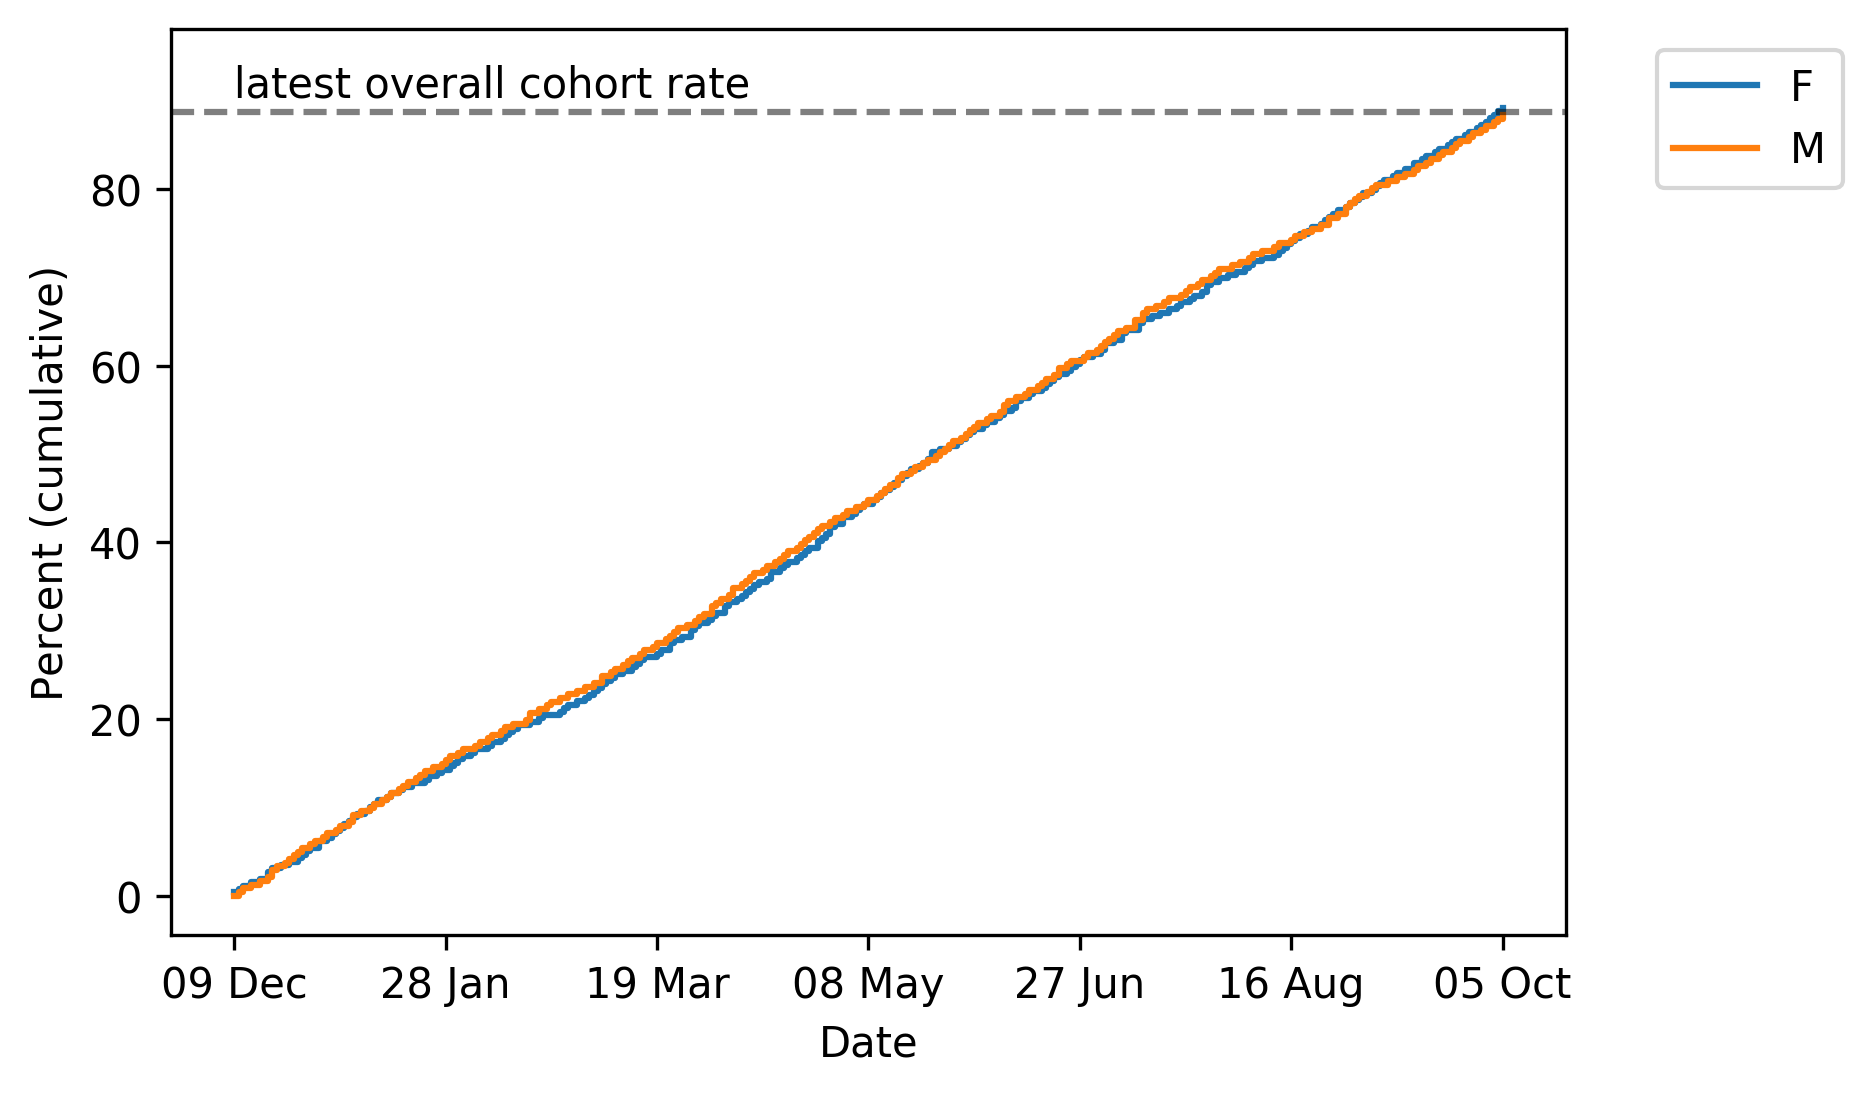

### COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

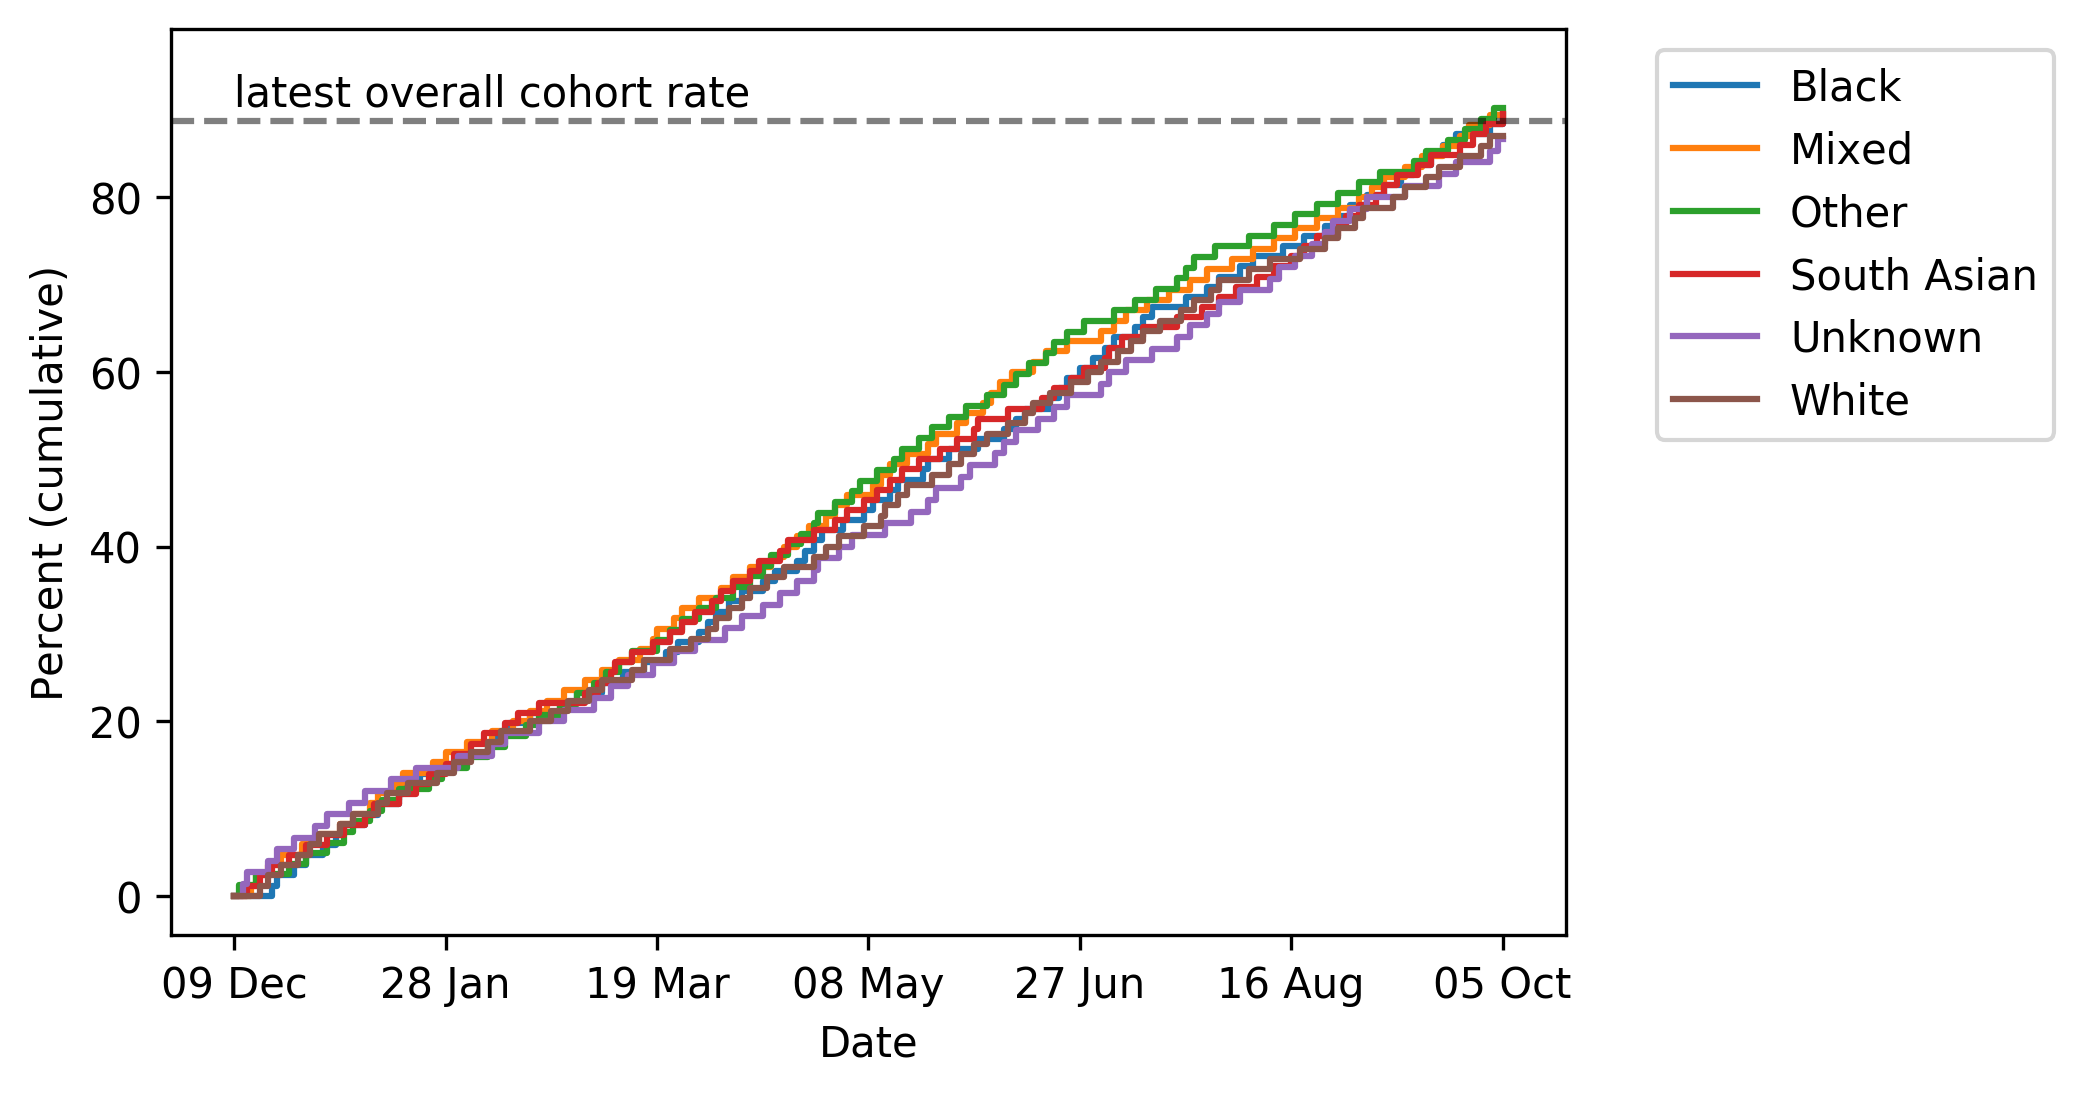

### COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

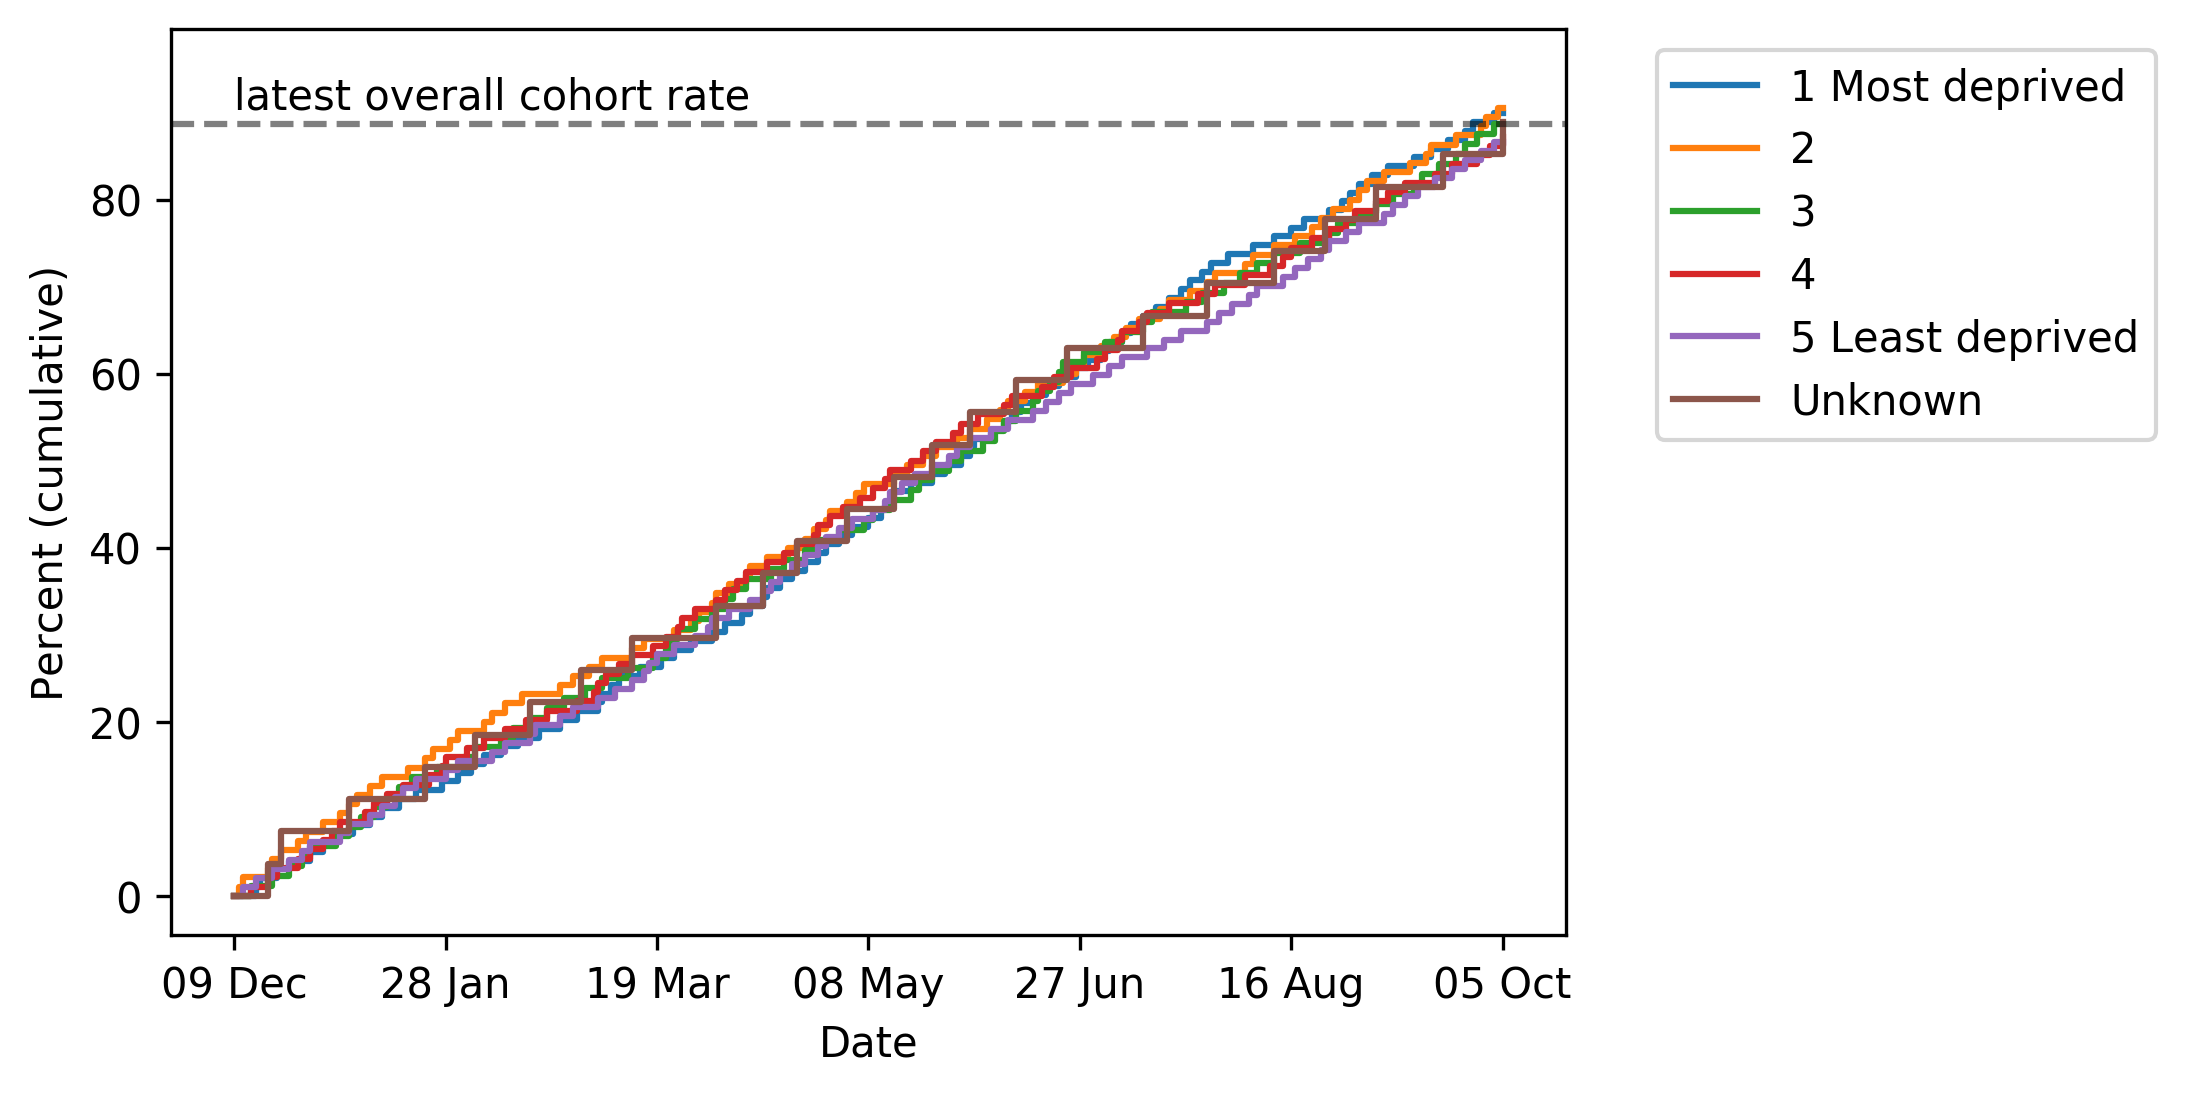

### COVID vaccinations among 70-79 population
 ### by BMI

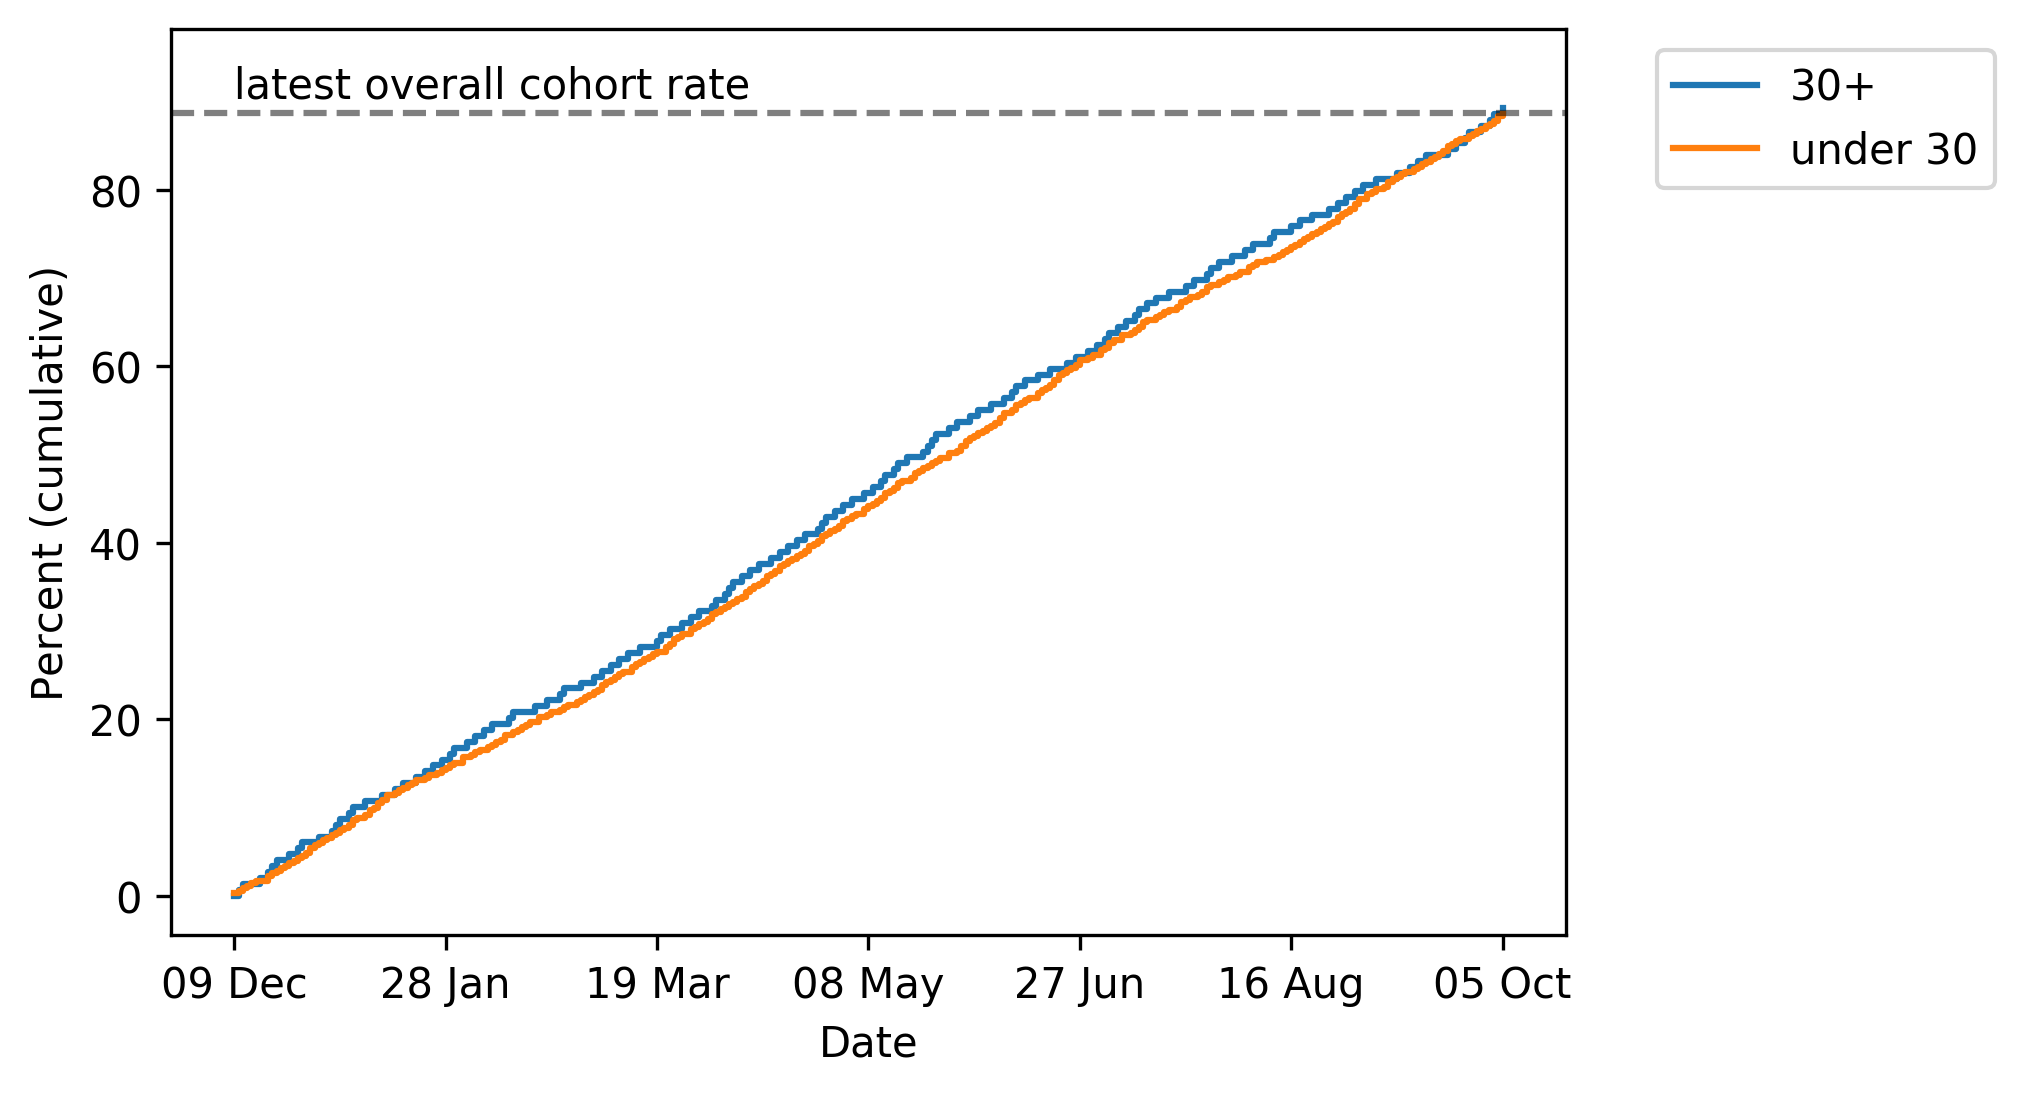

### COVID vaccinations among 70-79 population
 ### by Dialysis

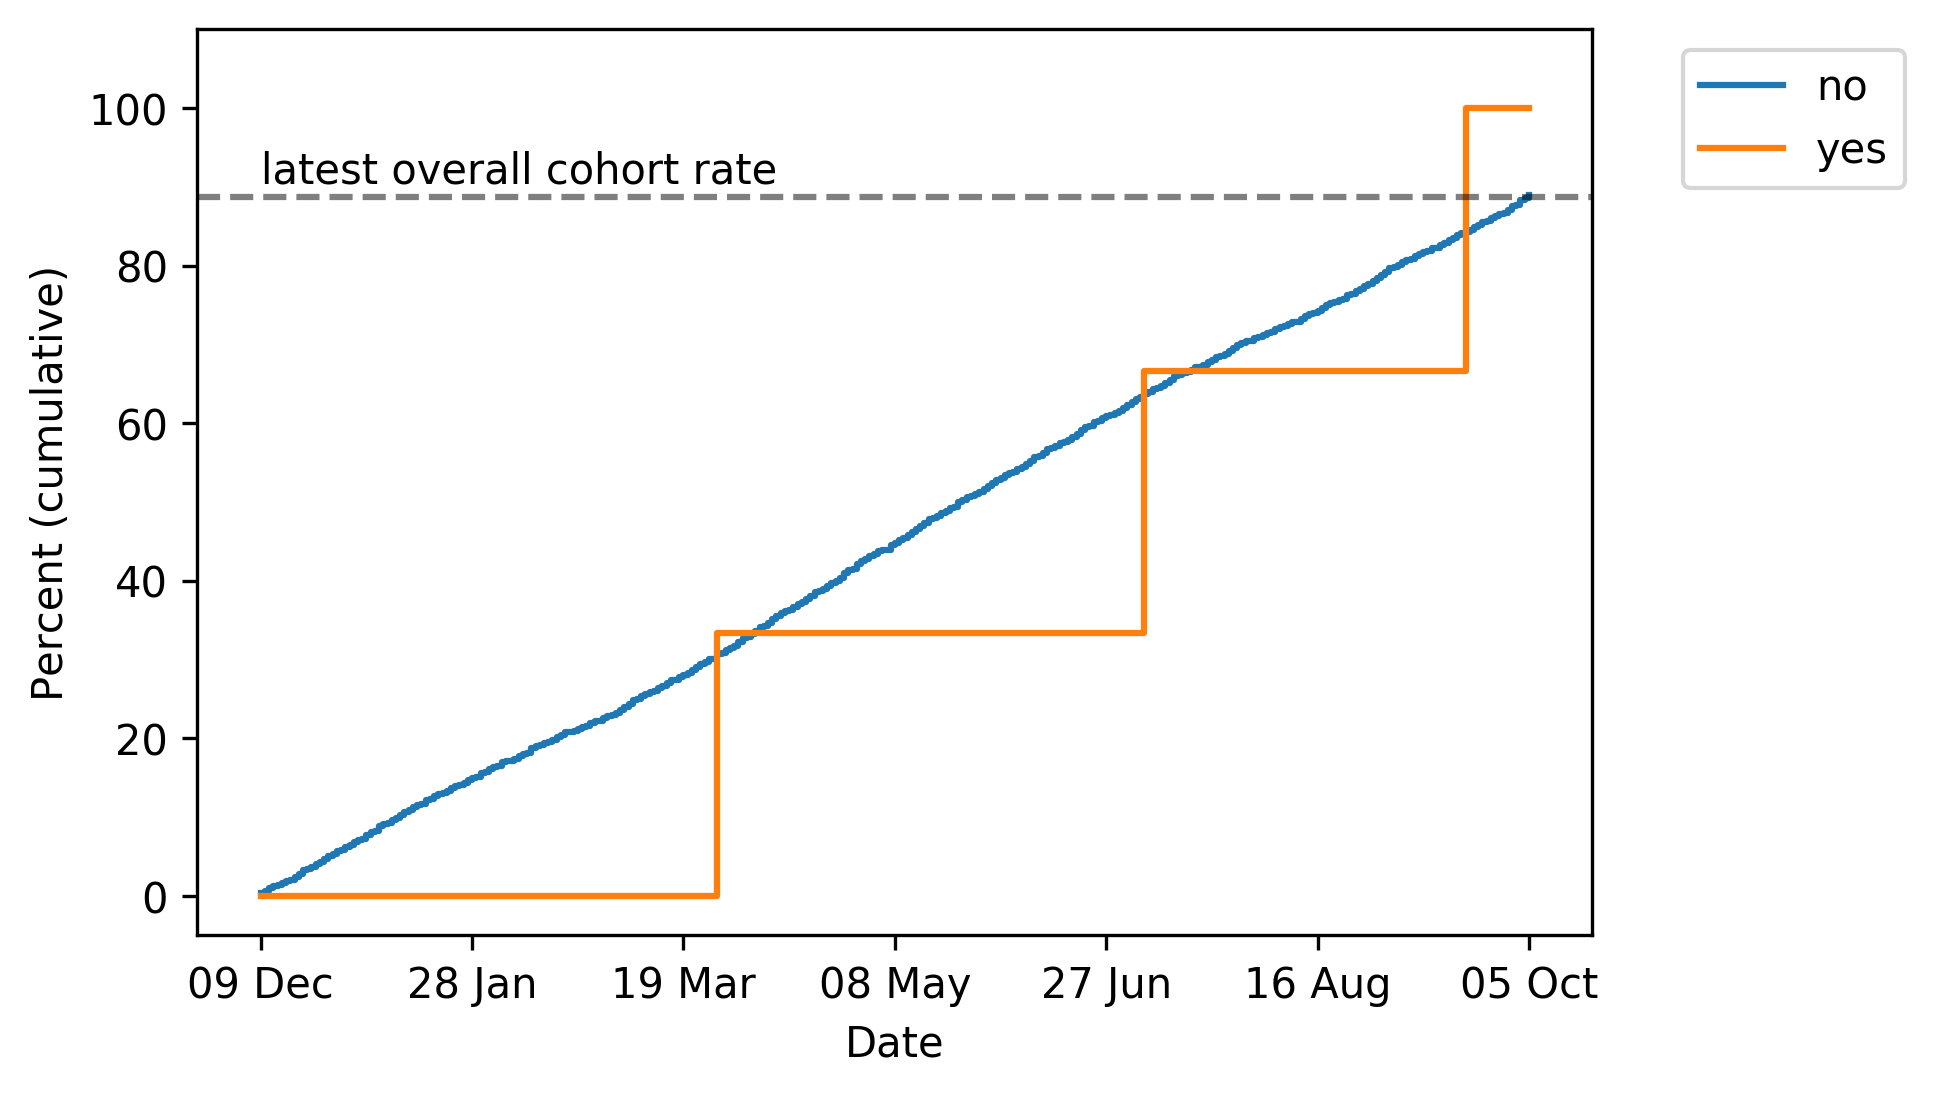

### COVID vaccinations among 70-79 population
 ### by Dementia

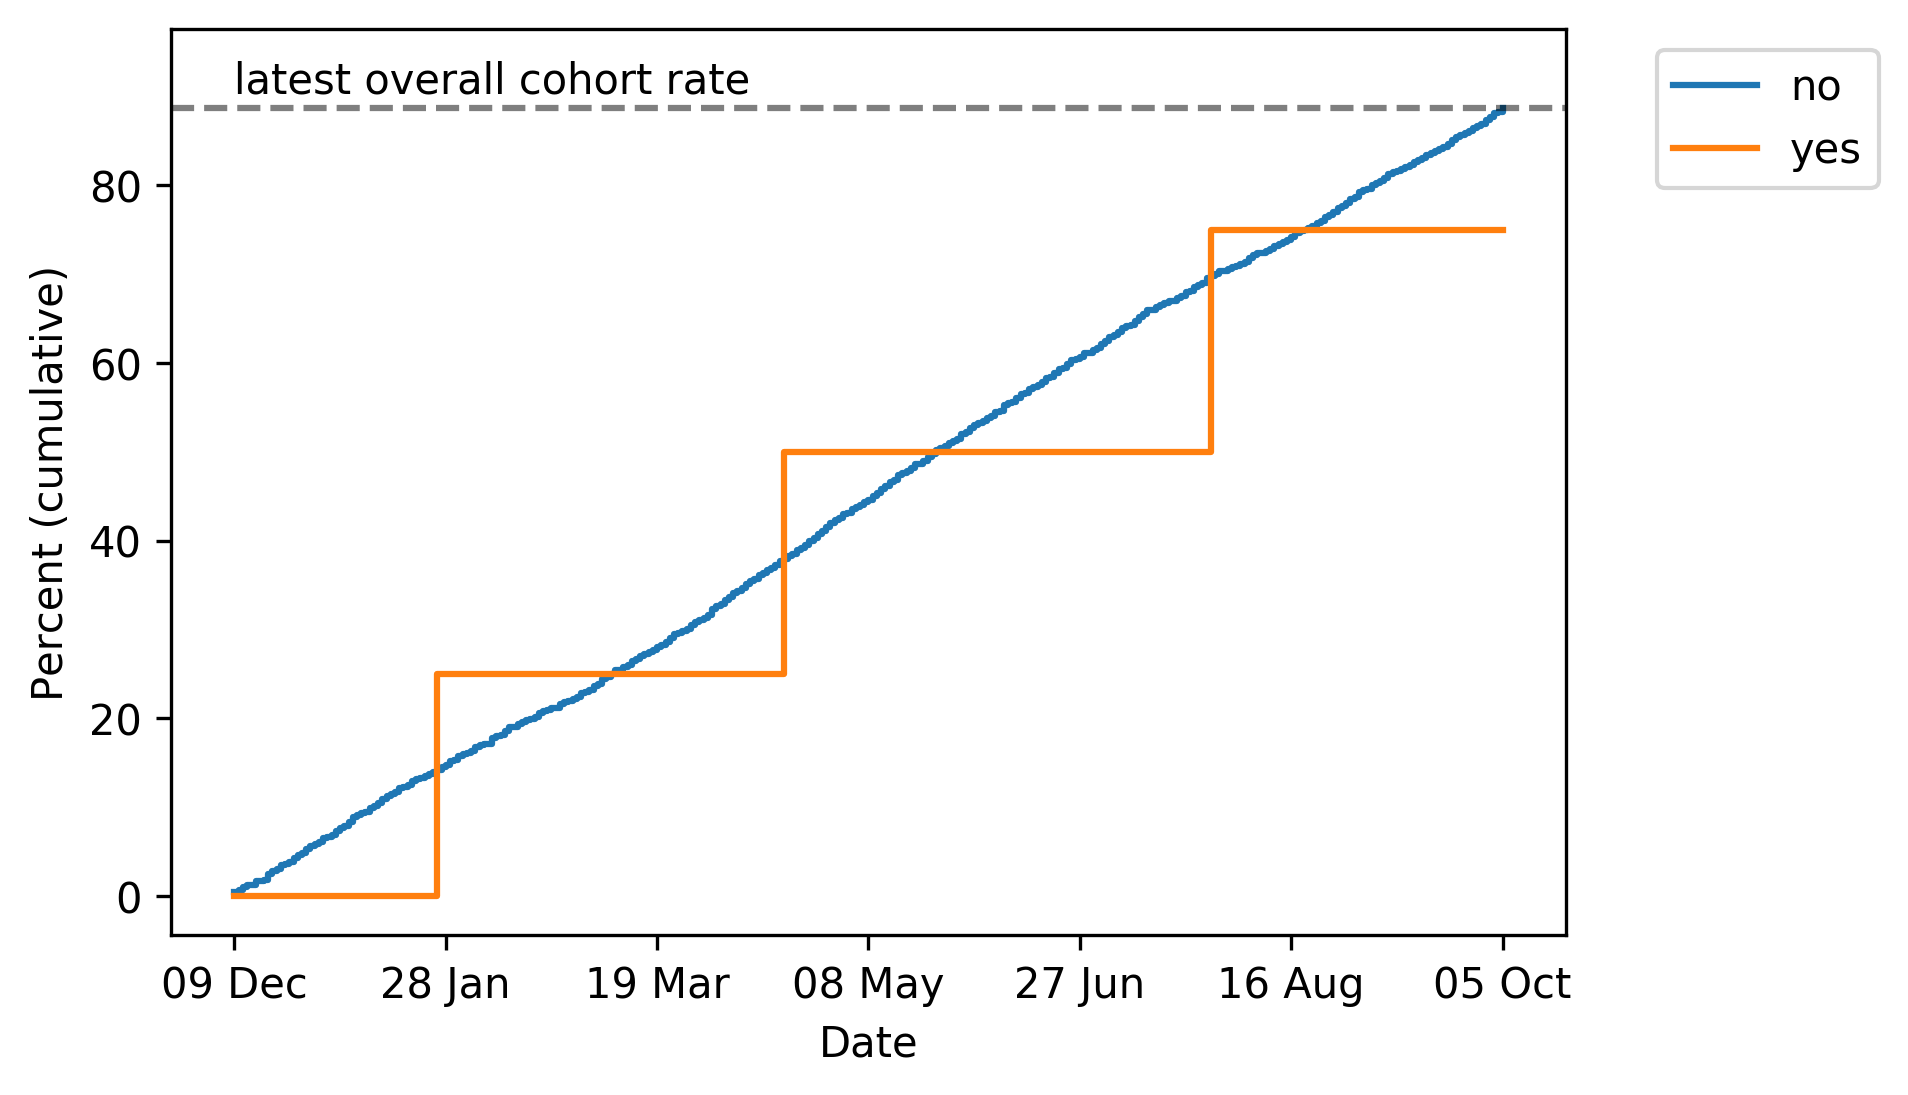

### COVID vaccinations among 70-79 population
 ### by Learning disability

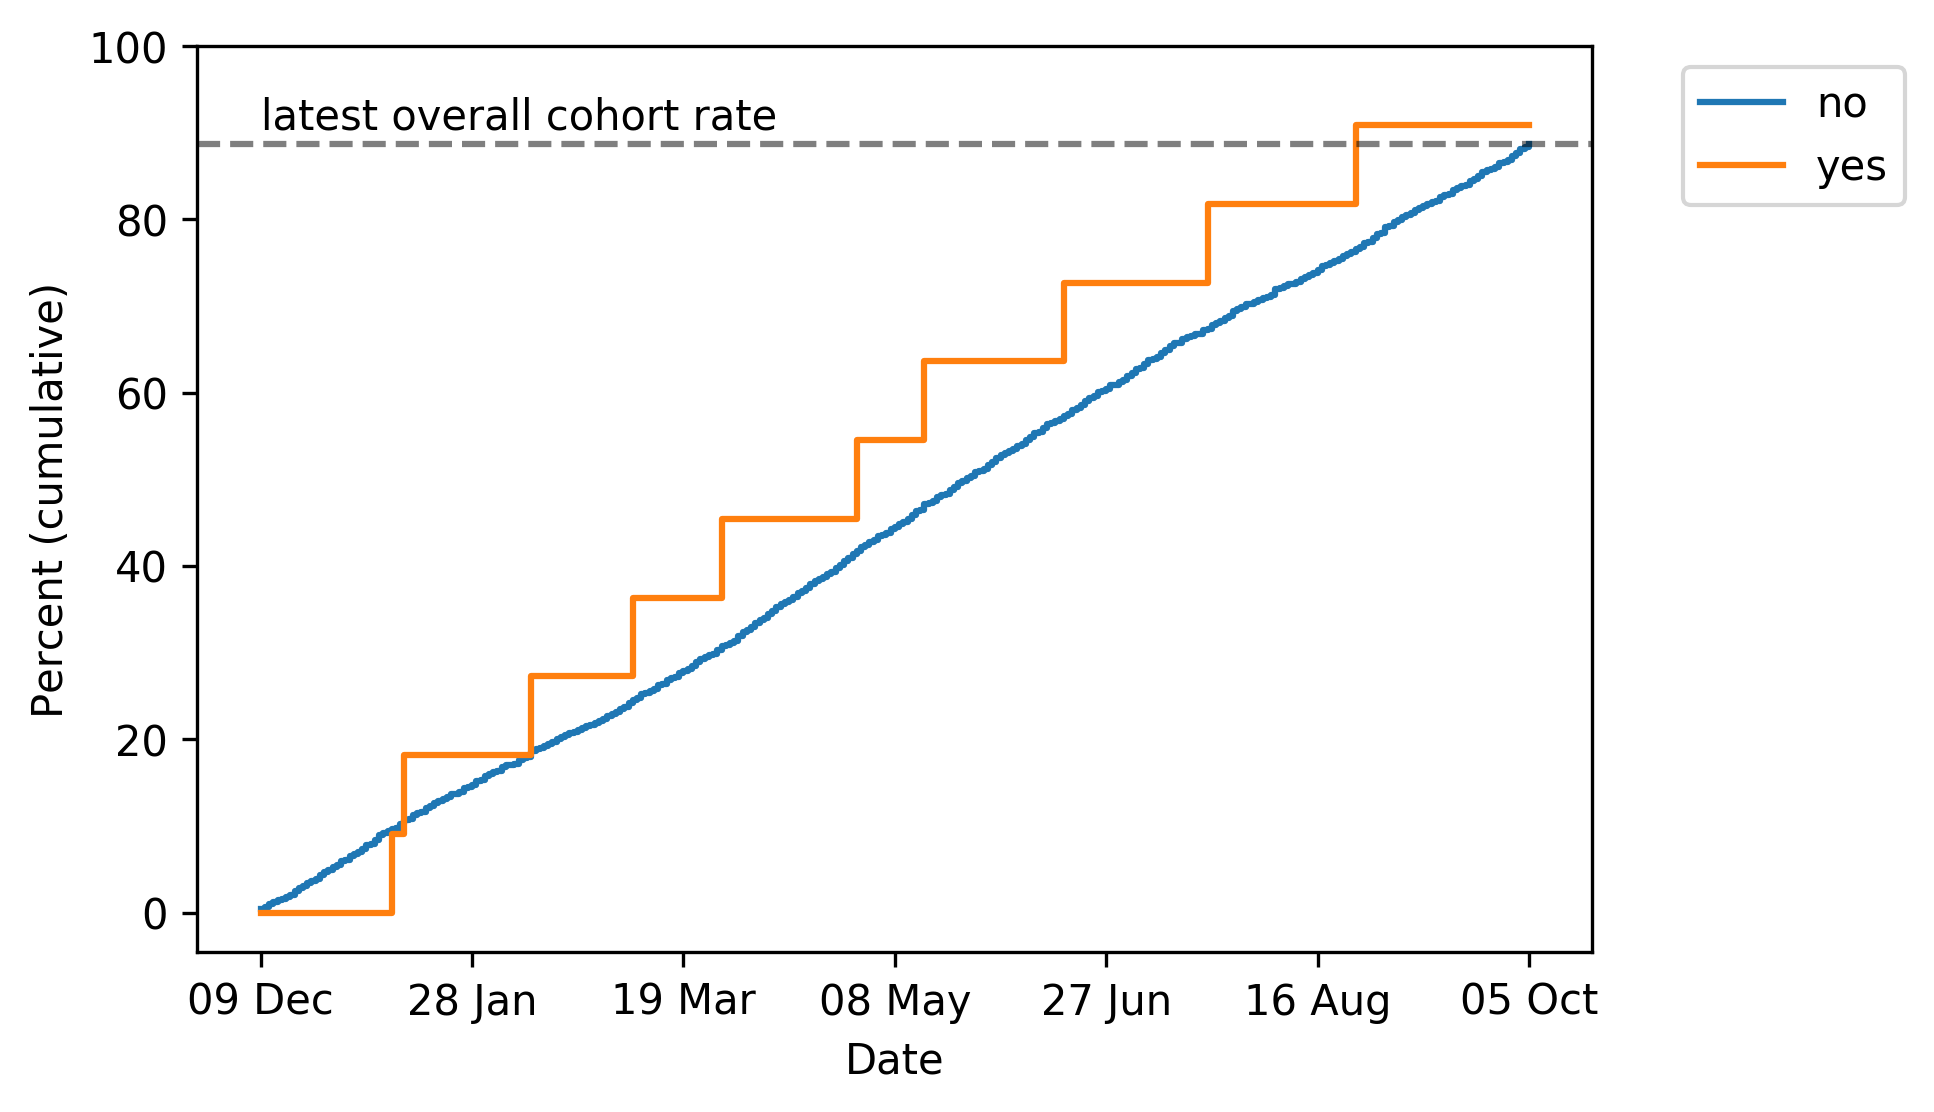

### COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

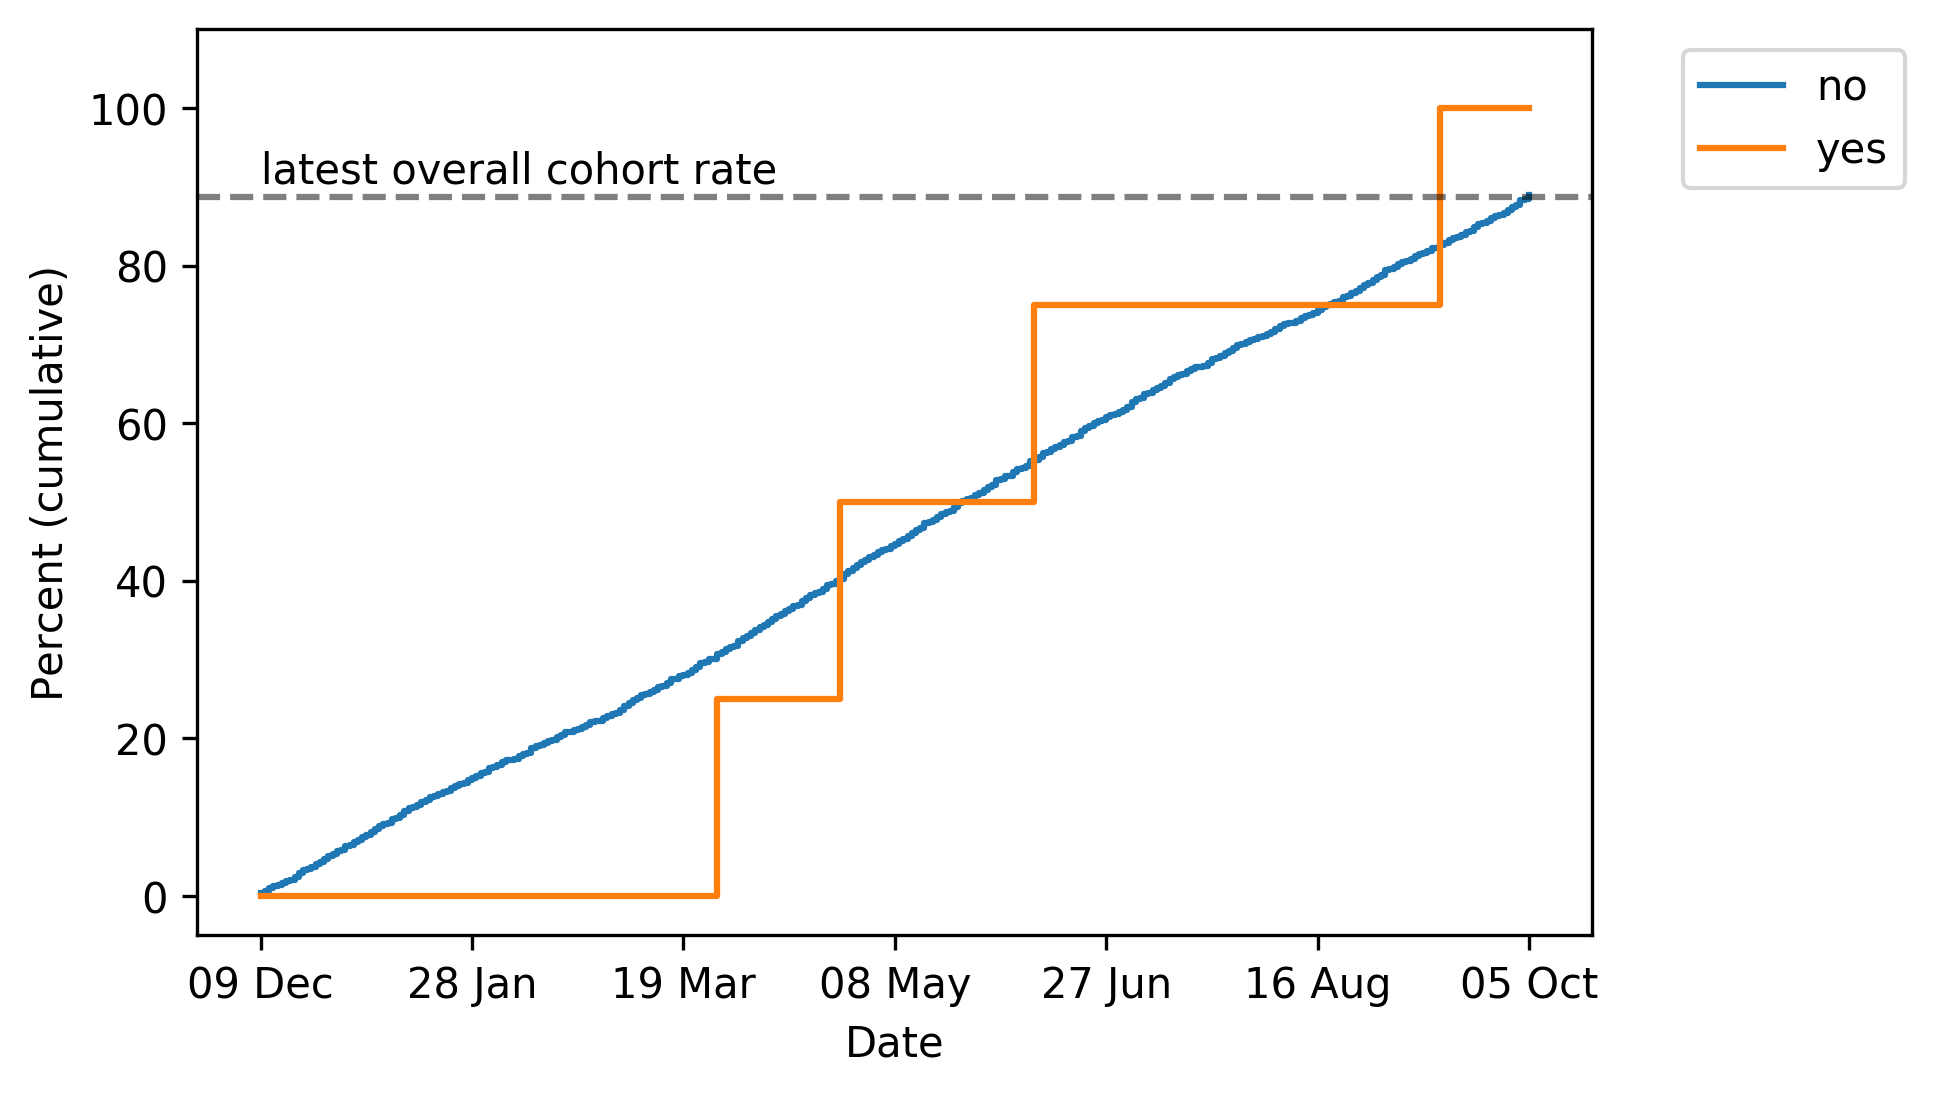

### COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

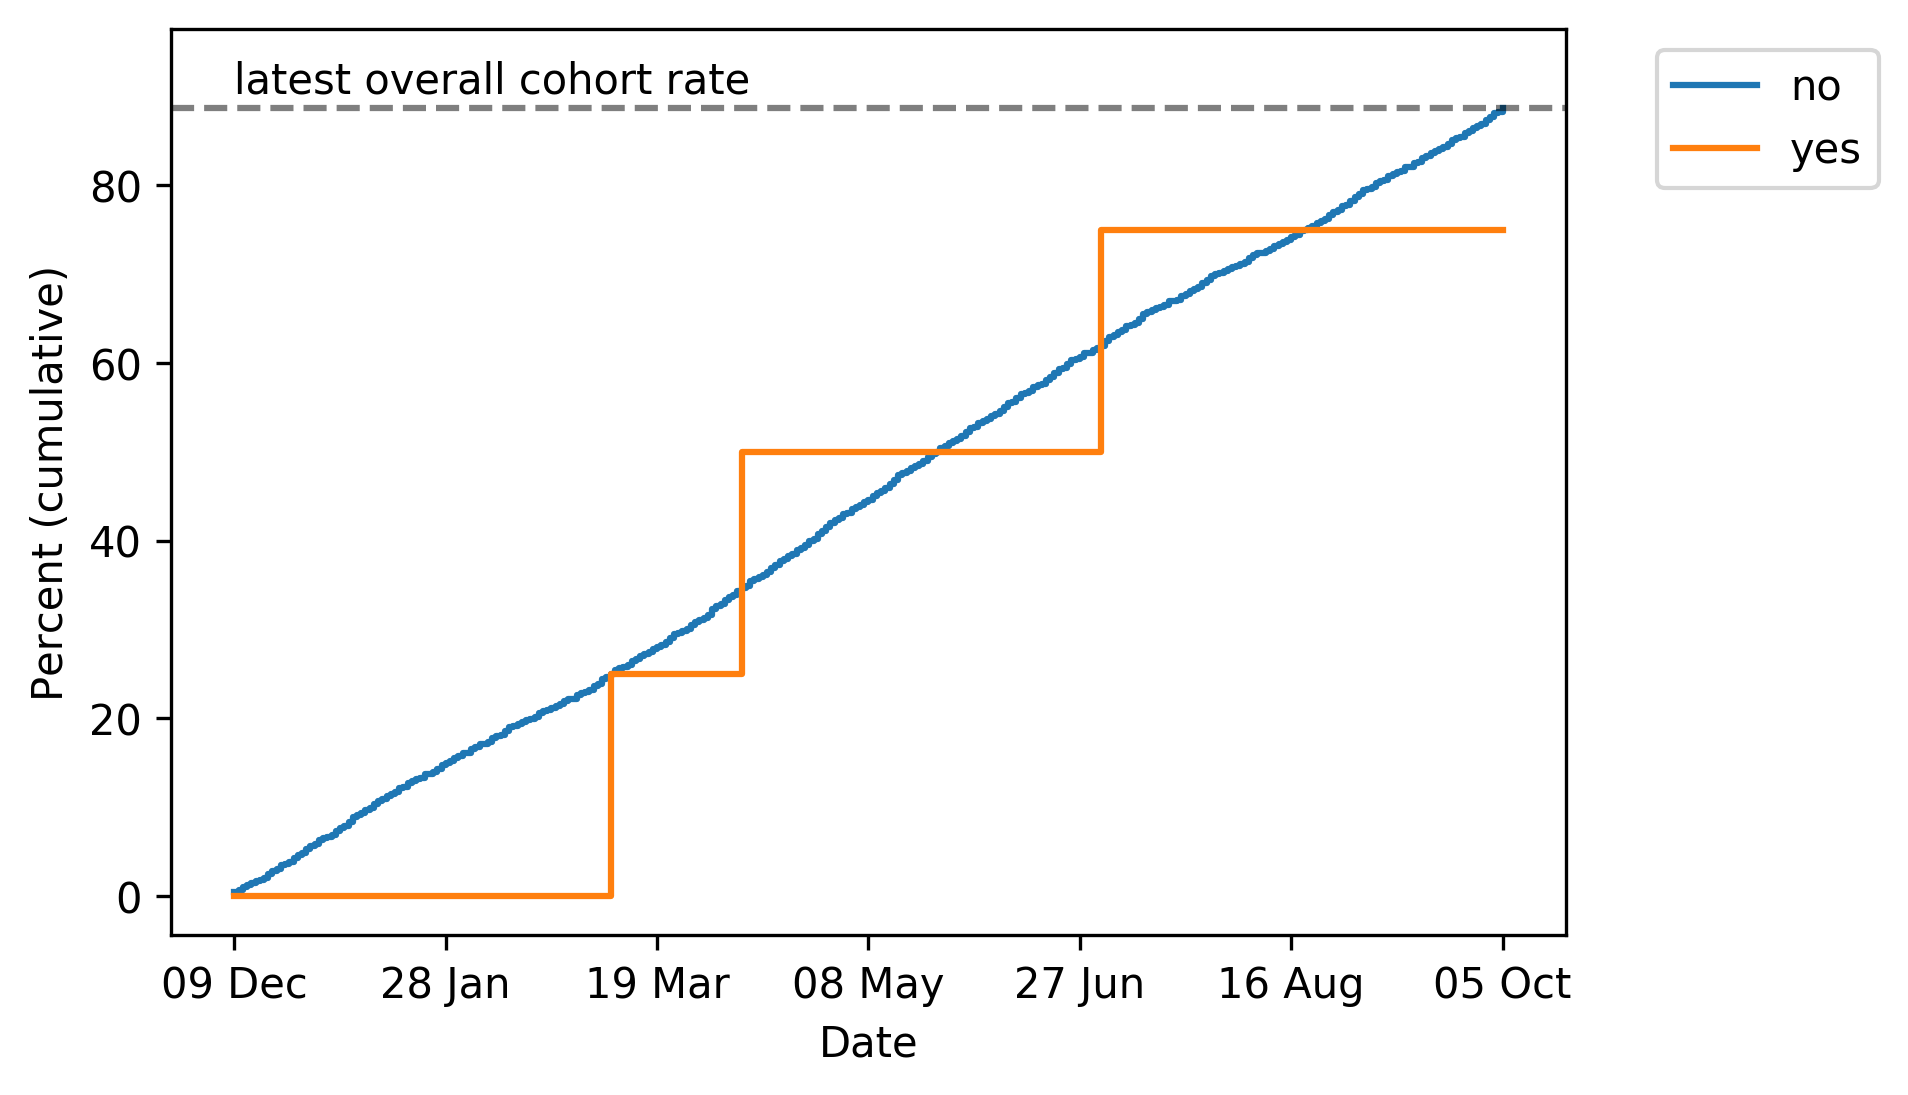

### COVID vaccinations among 70-79 population
 ### by Age band

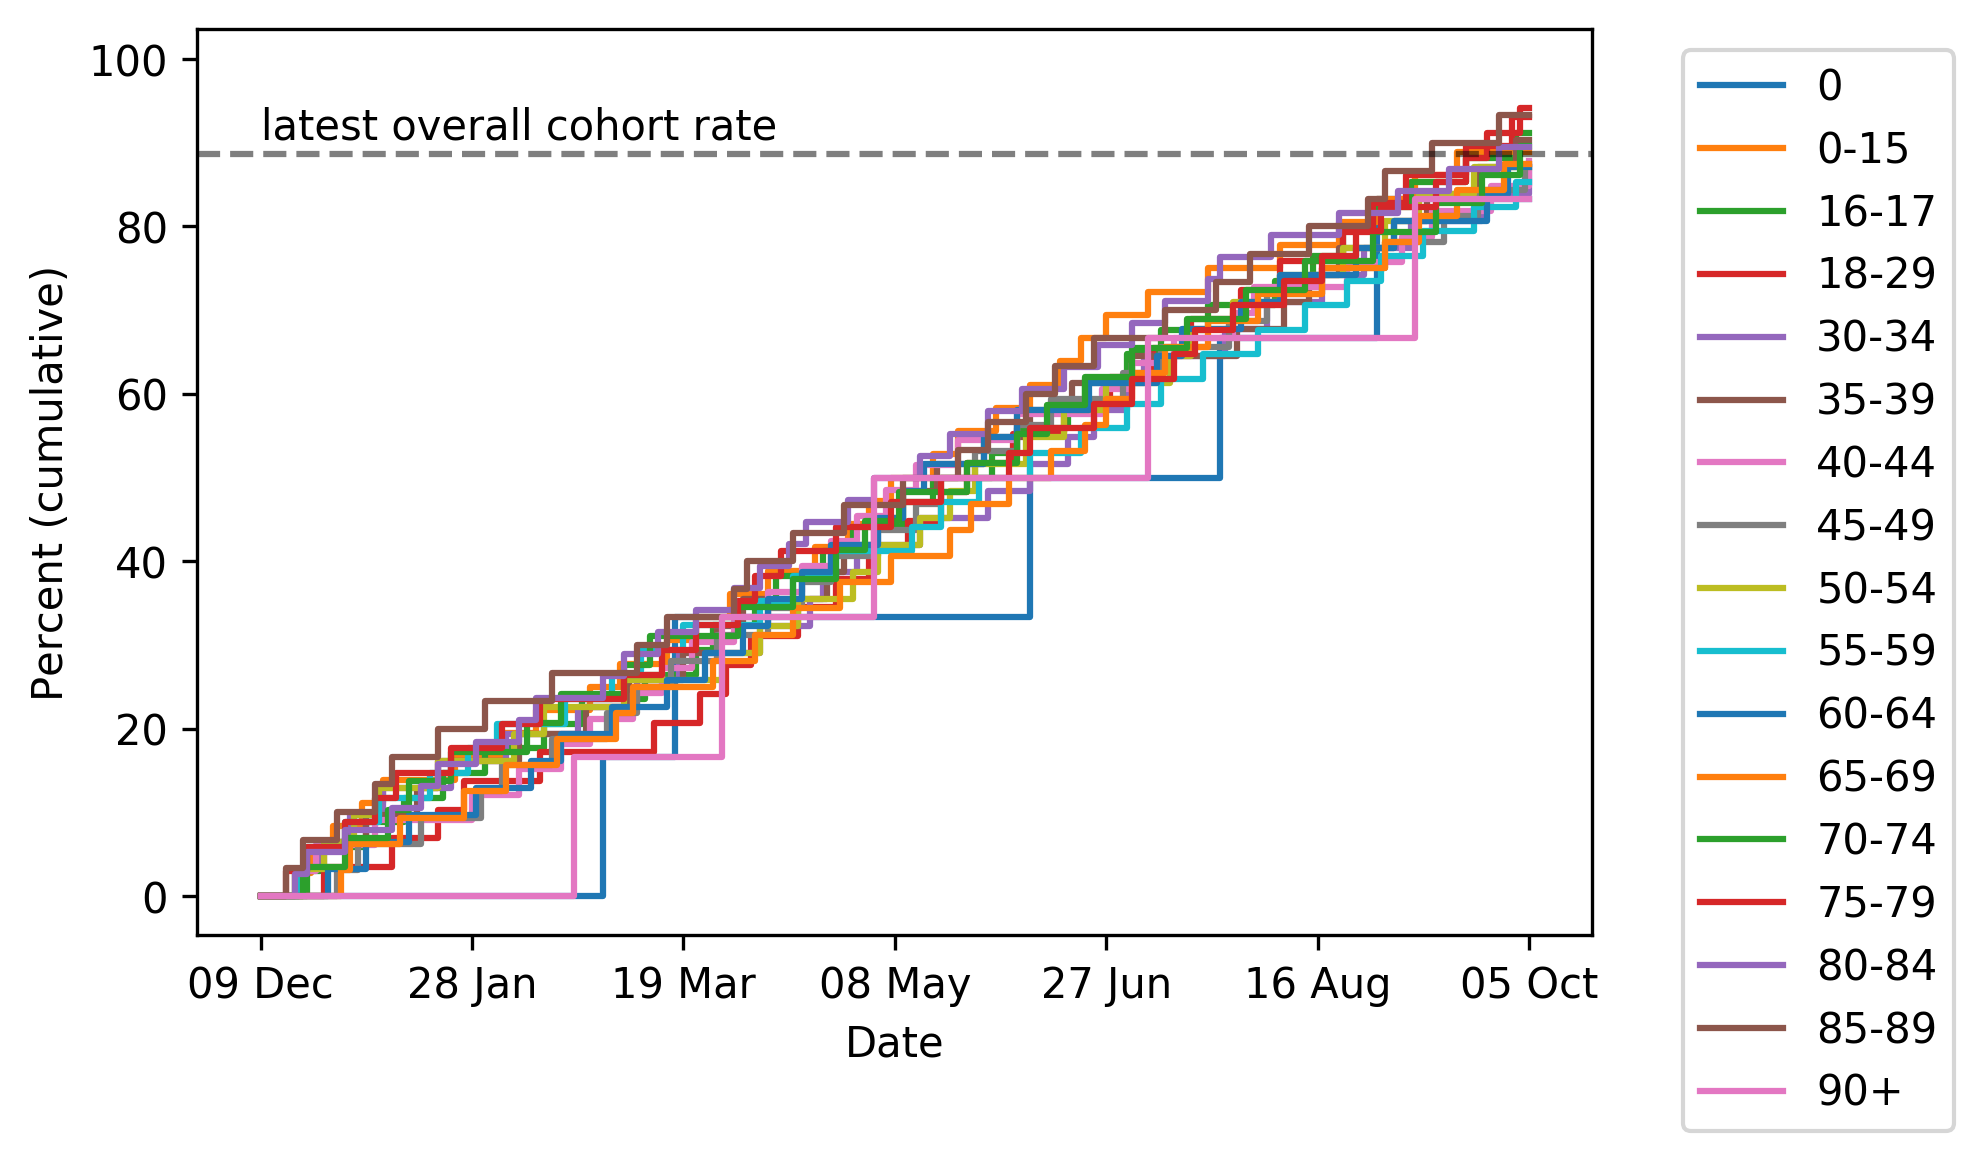

In [5]:
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of **shielding** population according to demographic/clinical features, cumulatively by day. <a name='charts_shield' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## Shielding population (aged 16-69)

### COVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

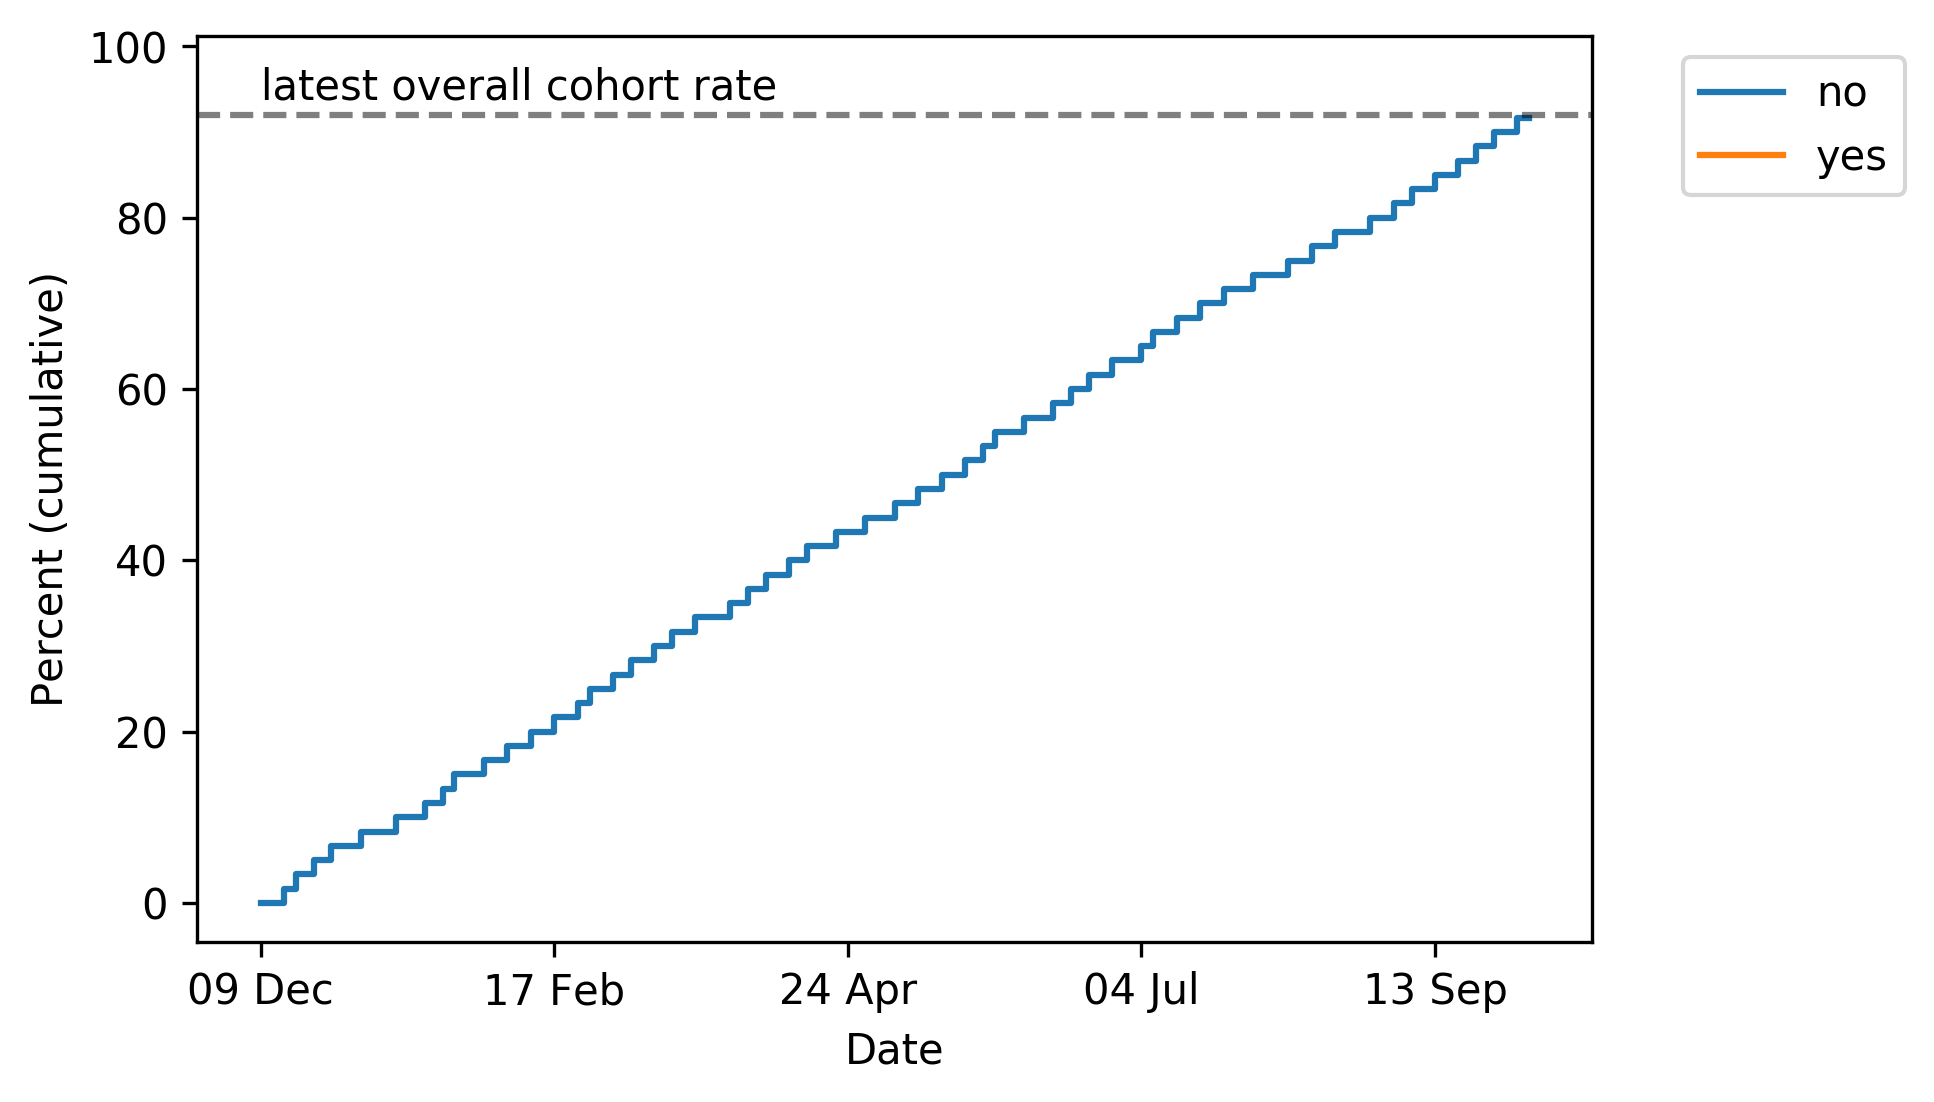

### COVID vaccinations among shielding (aged 16-69) population
 ### by Age band

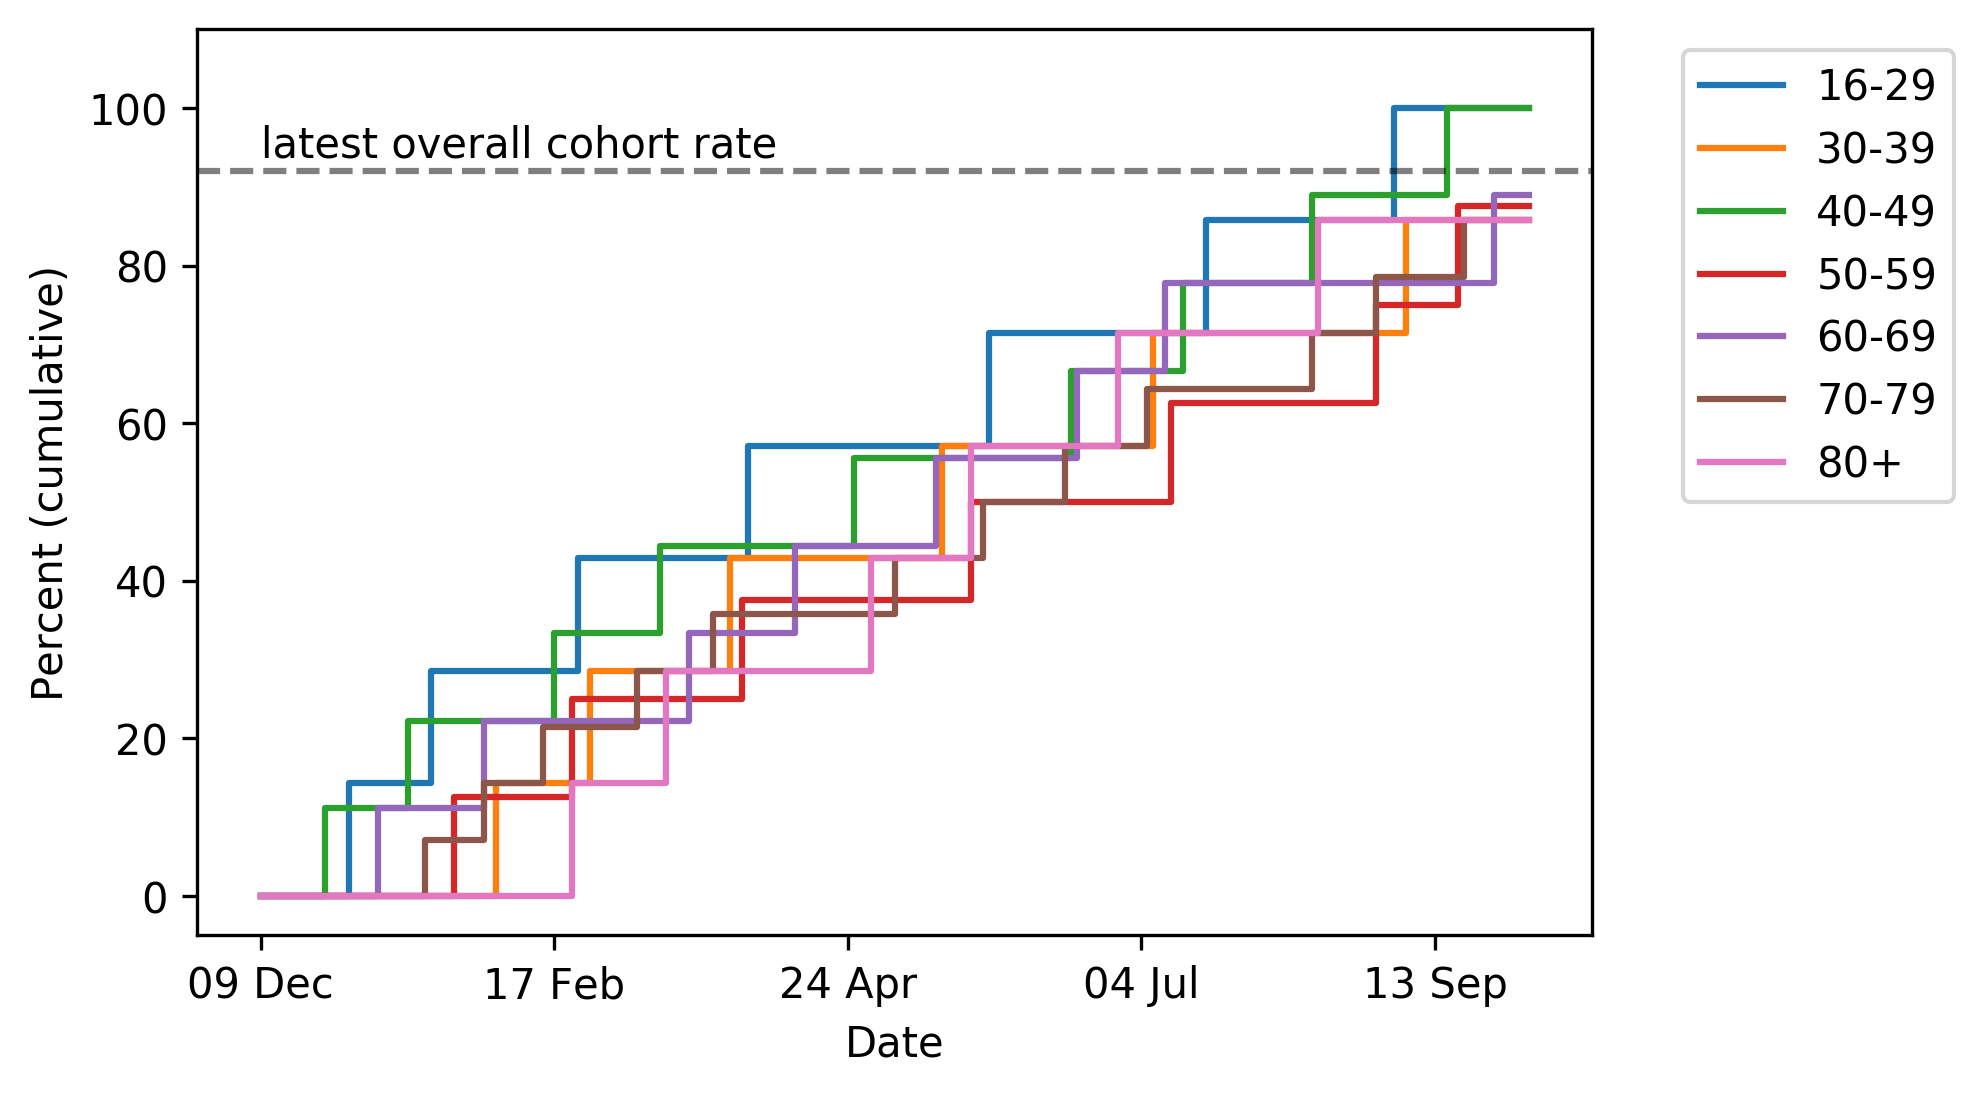

### COVID vaccinations among shielding (aged 16-69) population
 ### by Sex

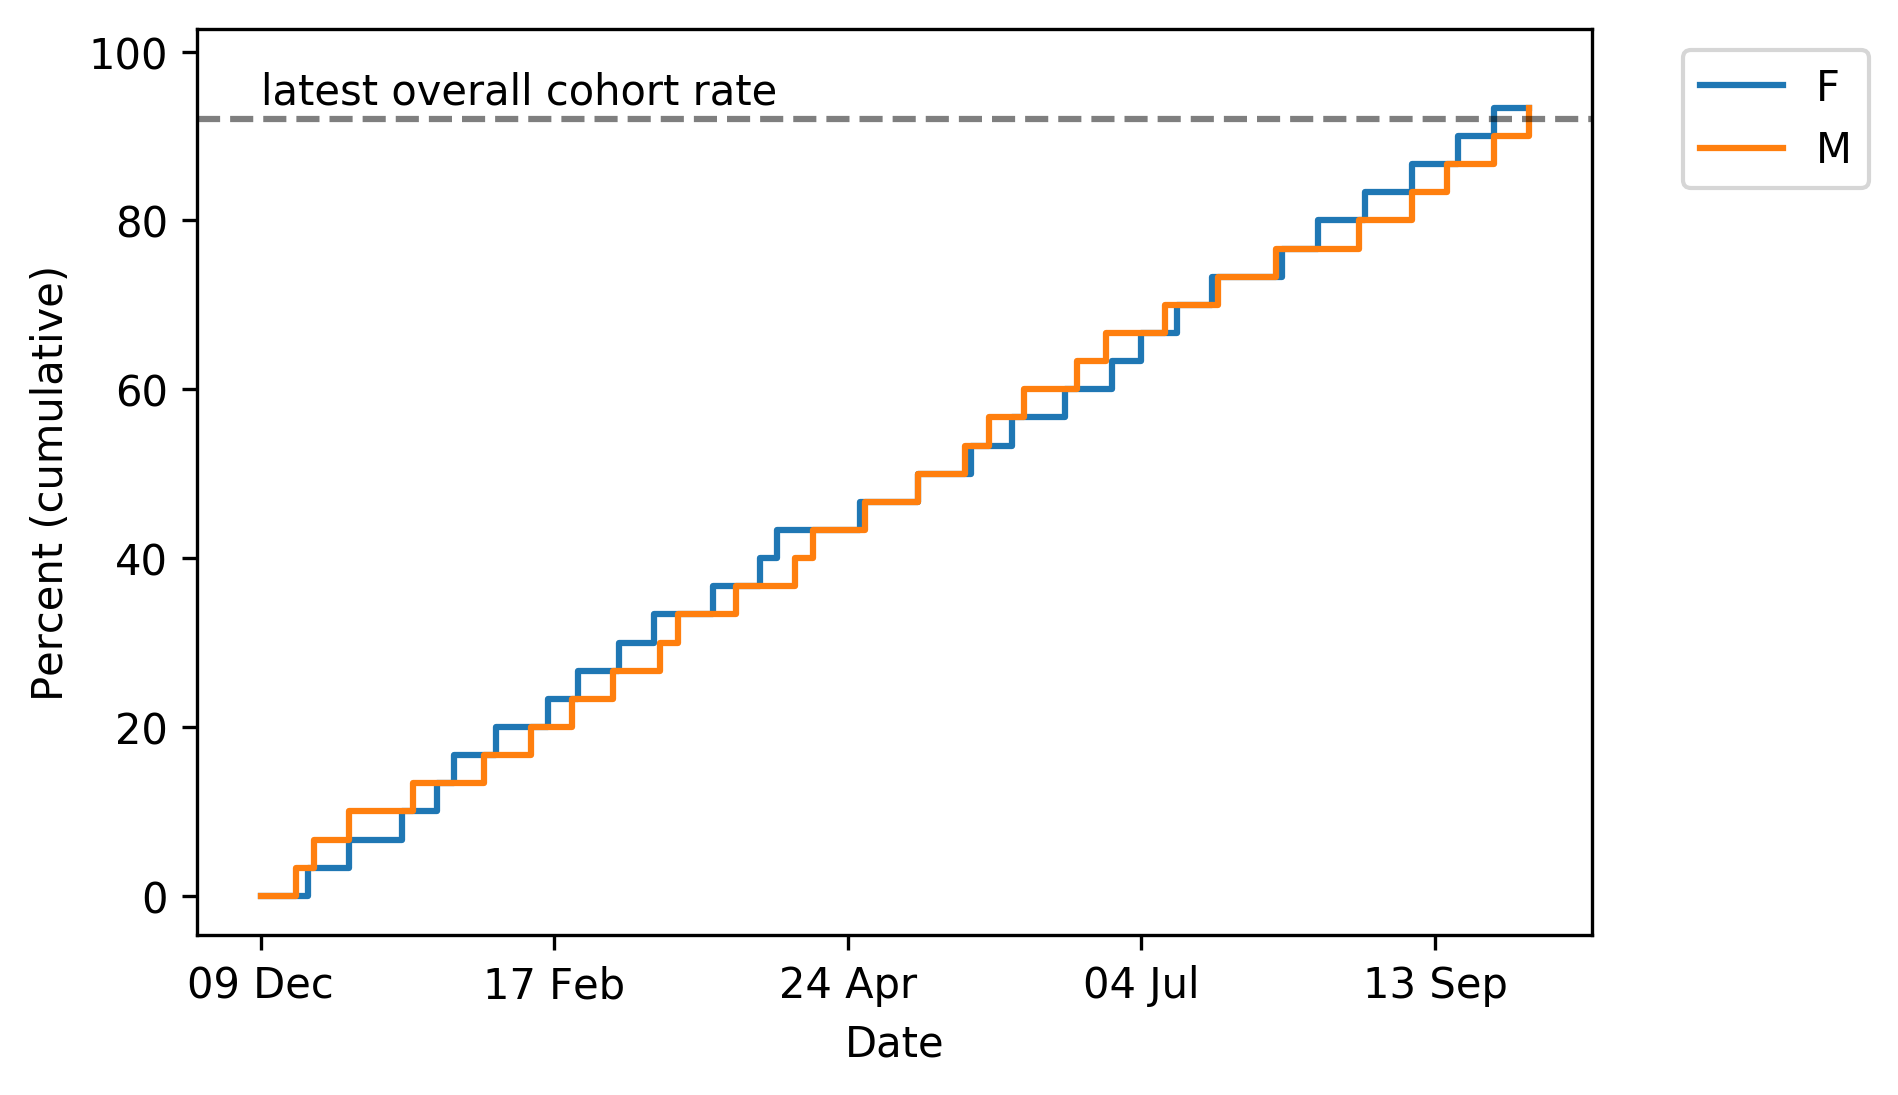

### COVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

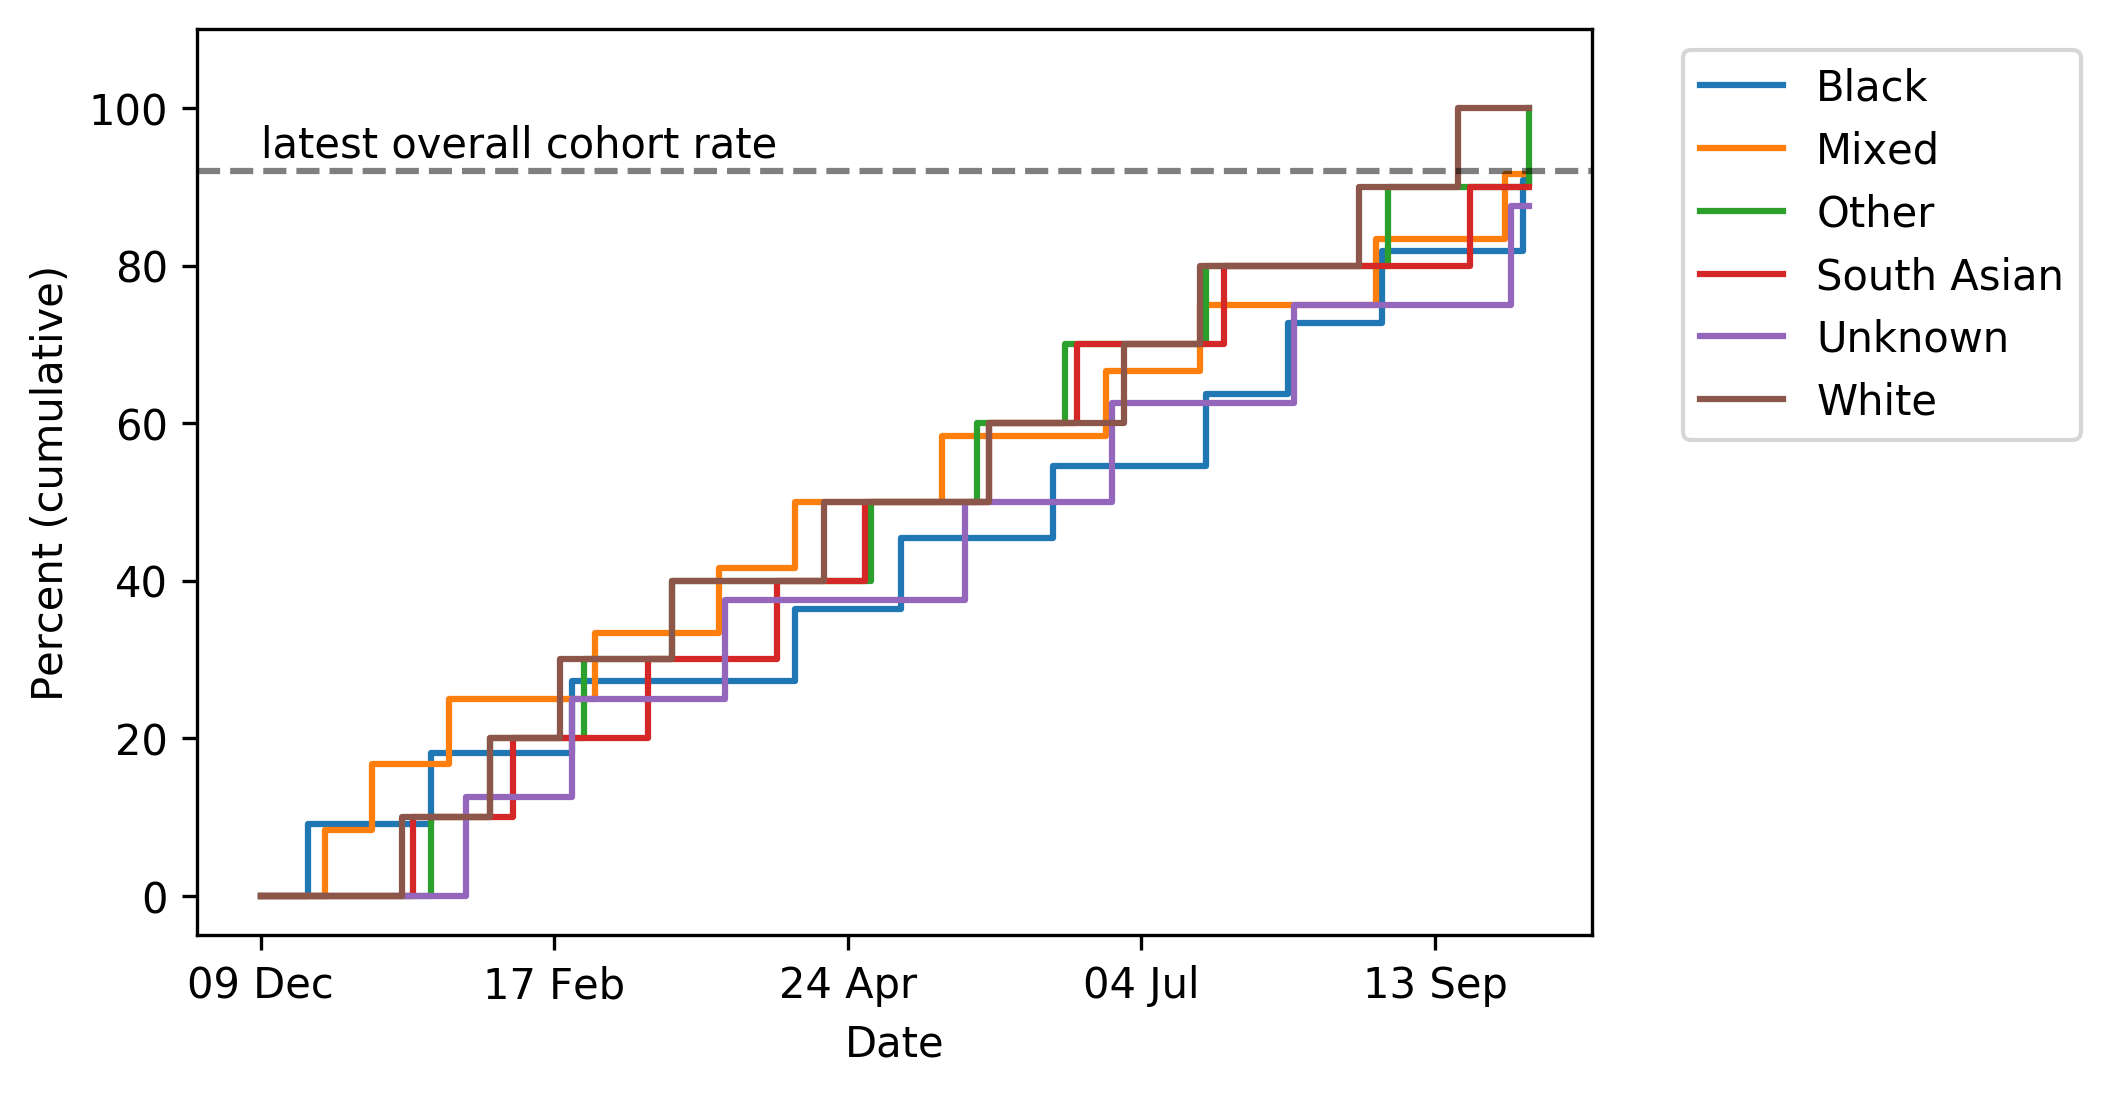

### COVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

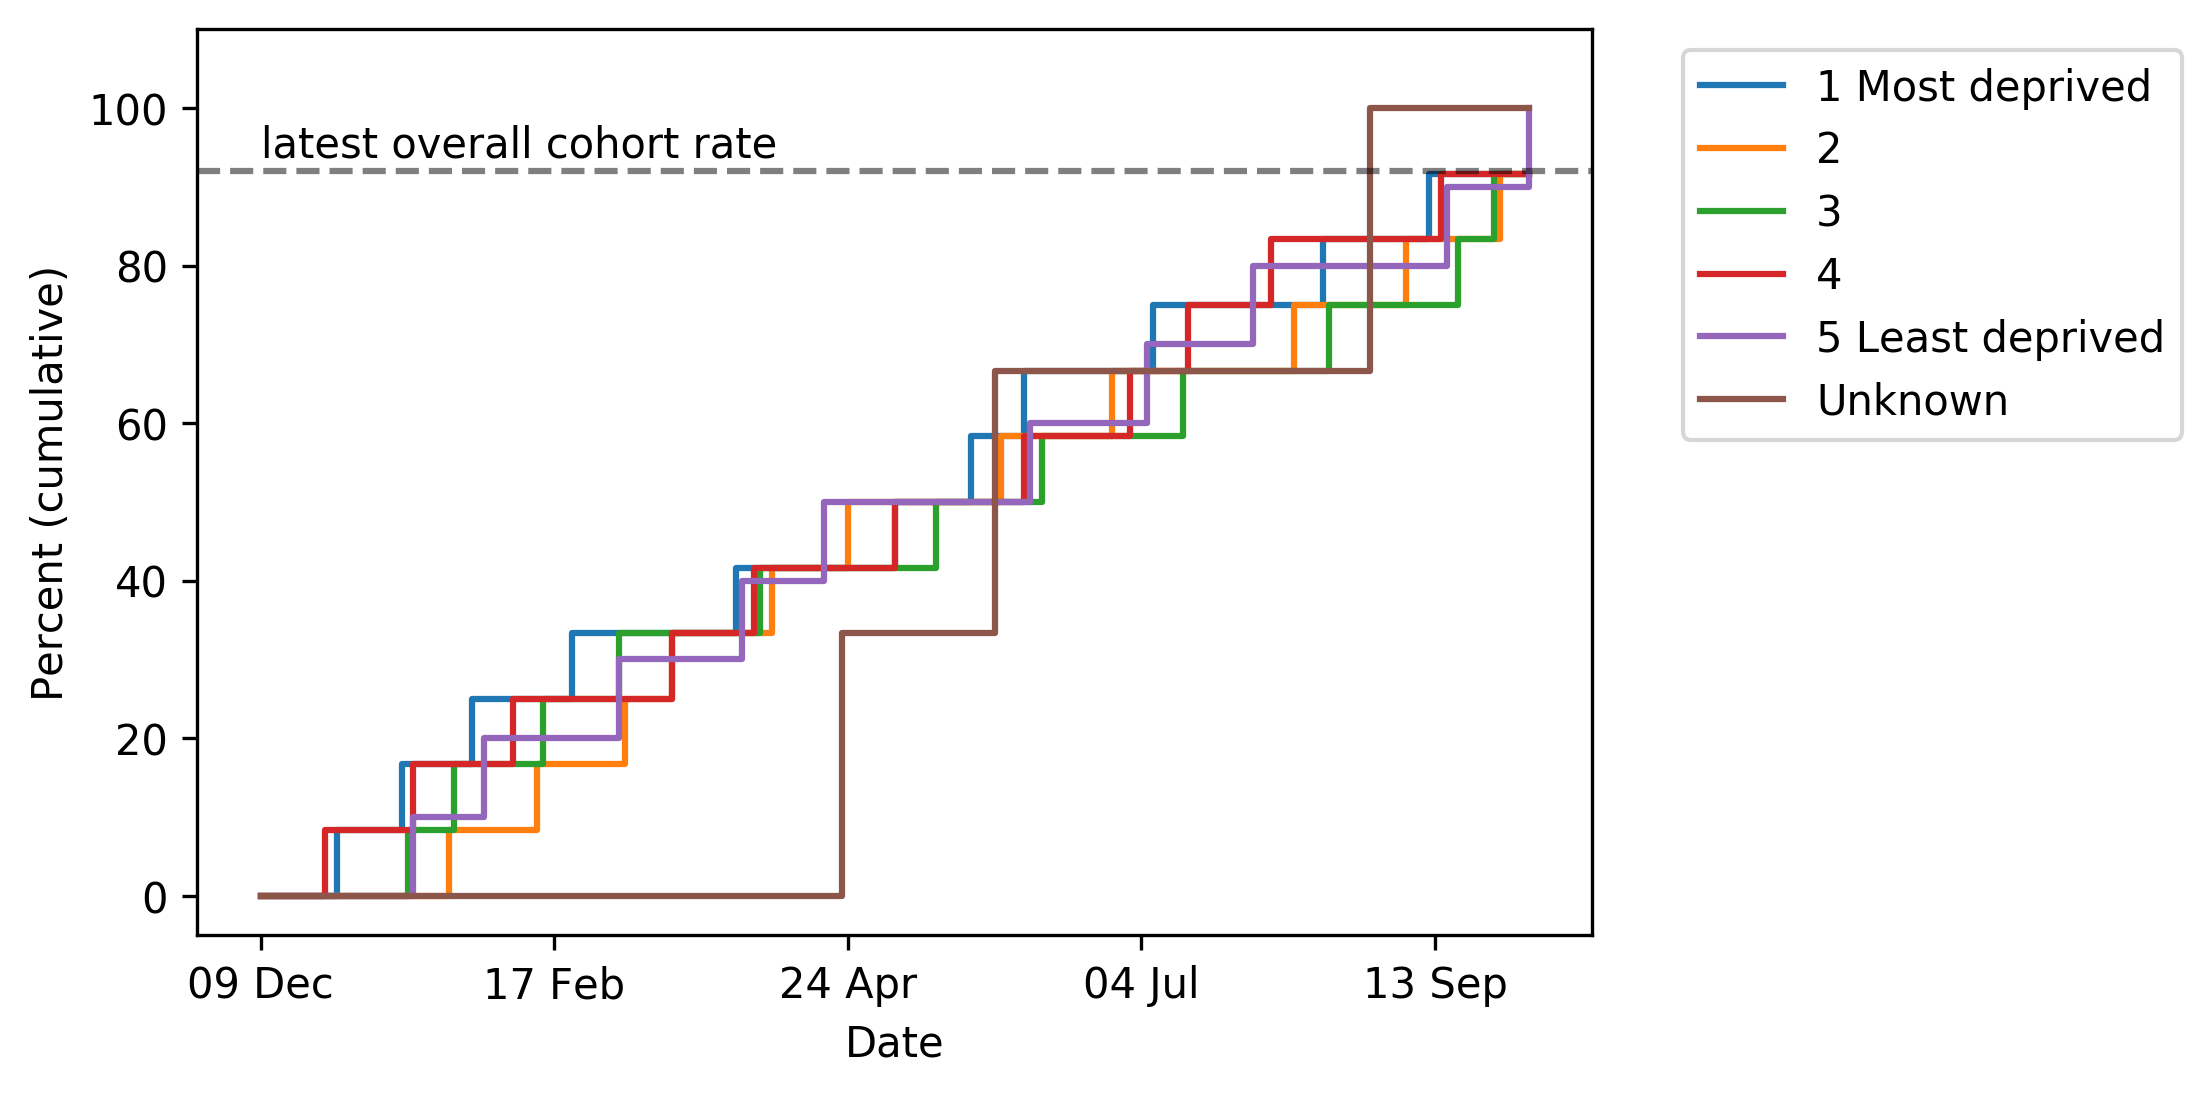

### COVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

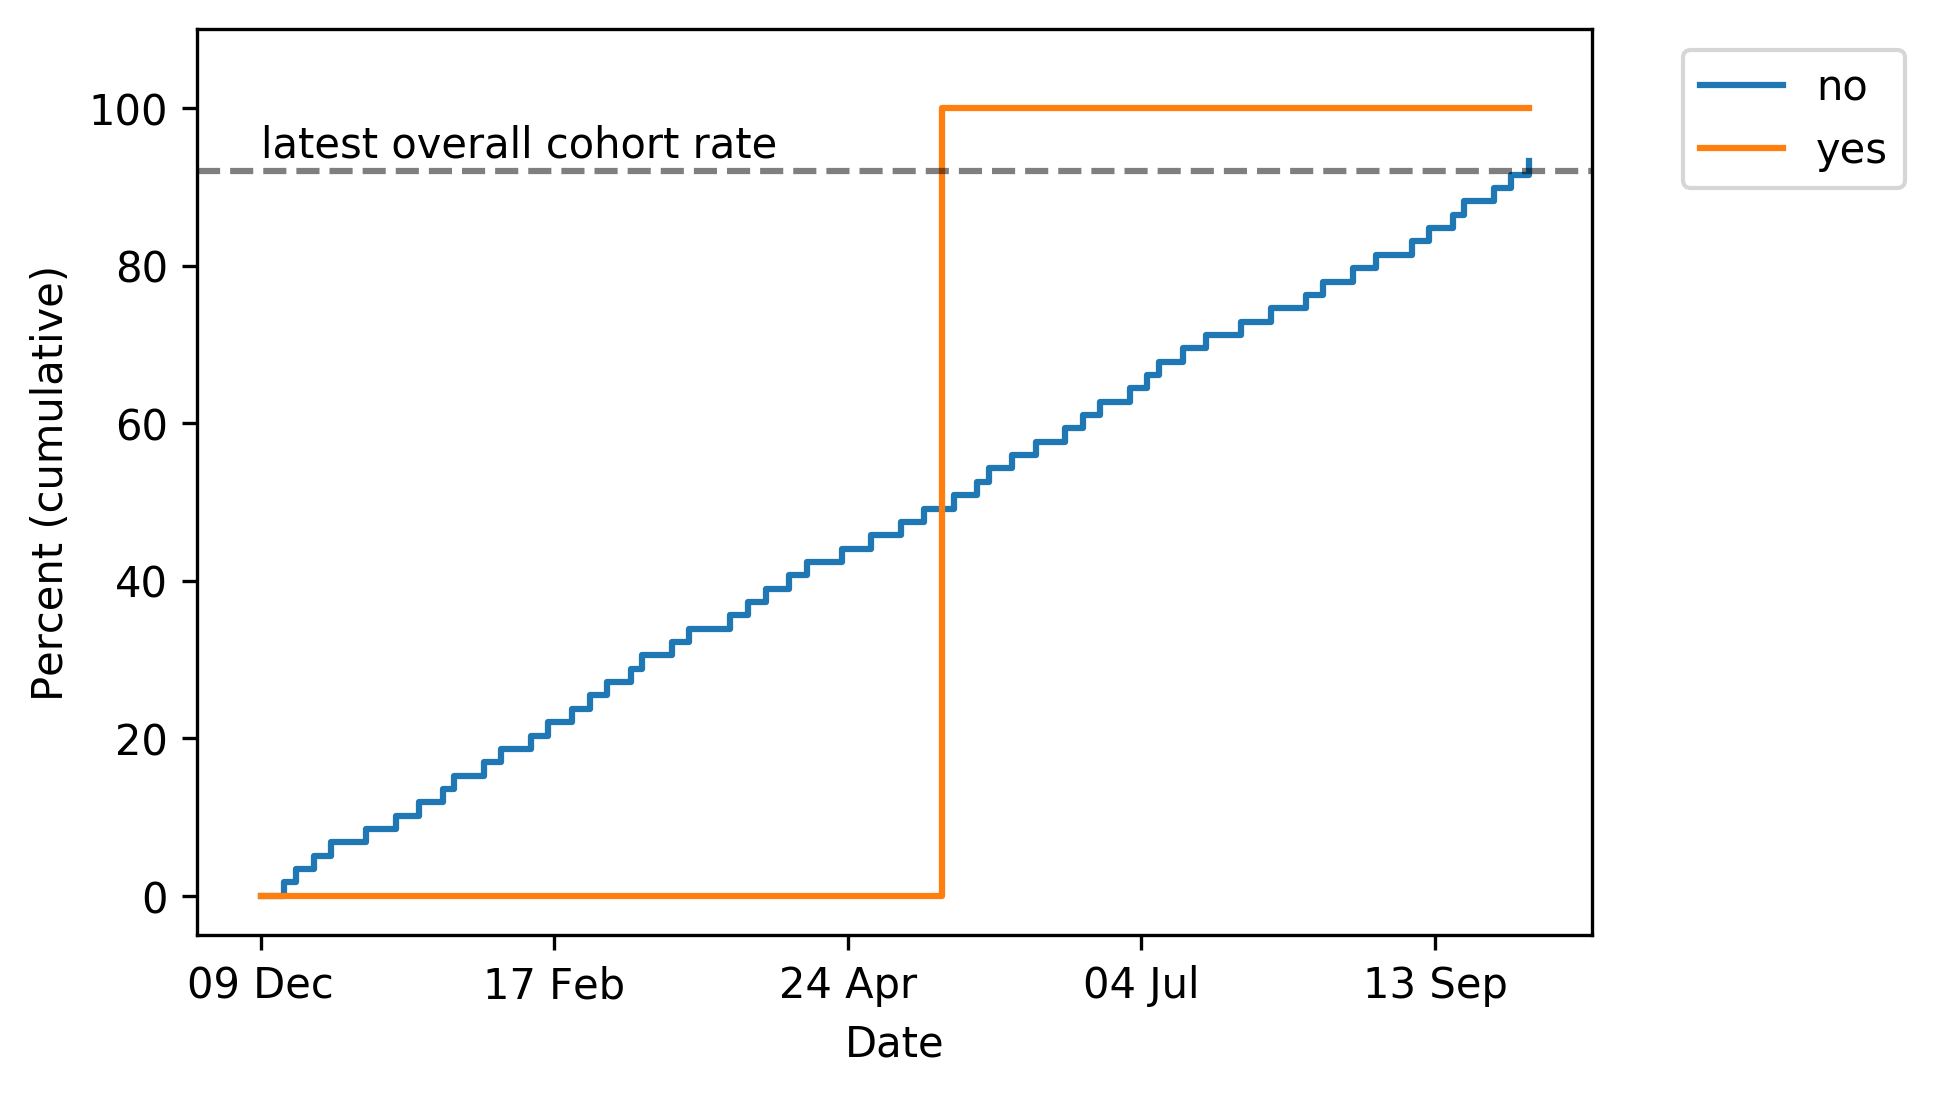

In [6]:
display(Markdown("## Shielding population (aged 16-69)"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="shielding (aged 16-69)", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 65-69 population according to demographic/clinical features, cumulatively by day. <a name='charts65' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 65-69 population

### COVID vaccinations among 65-69 population
 ### by Sex

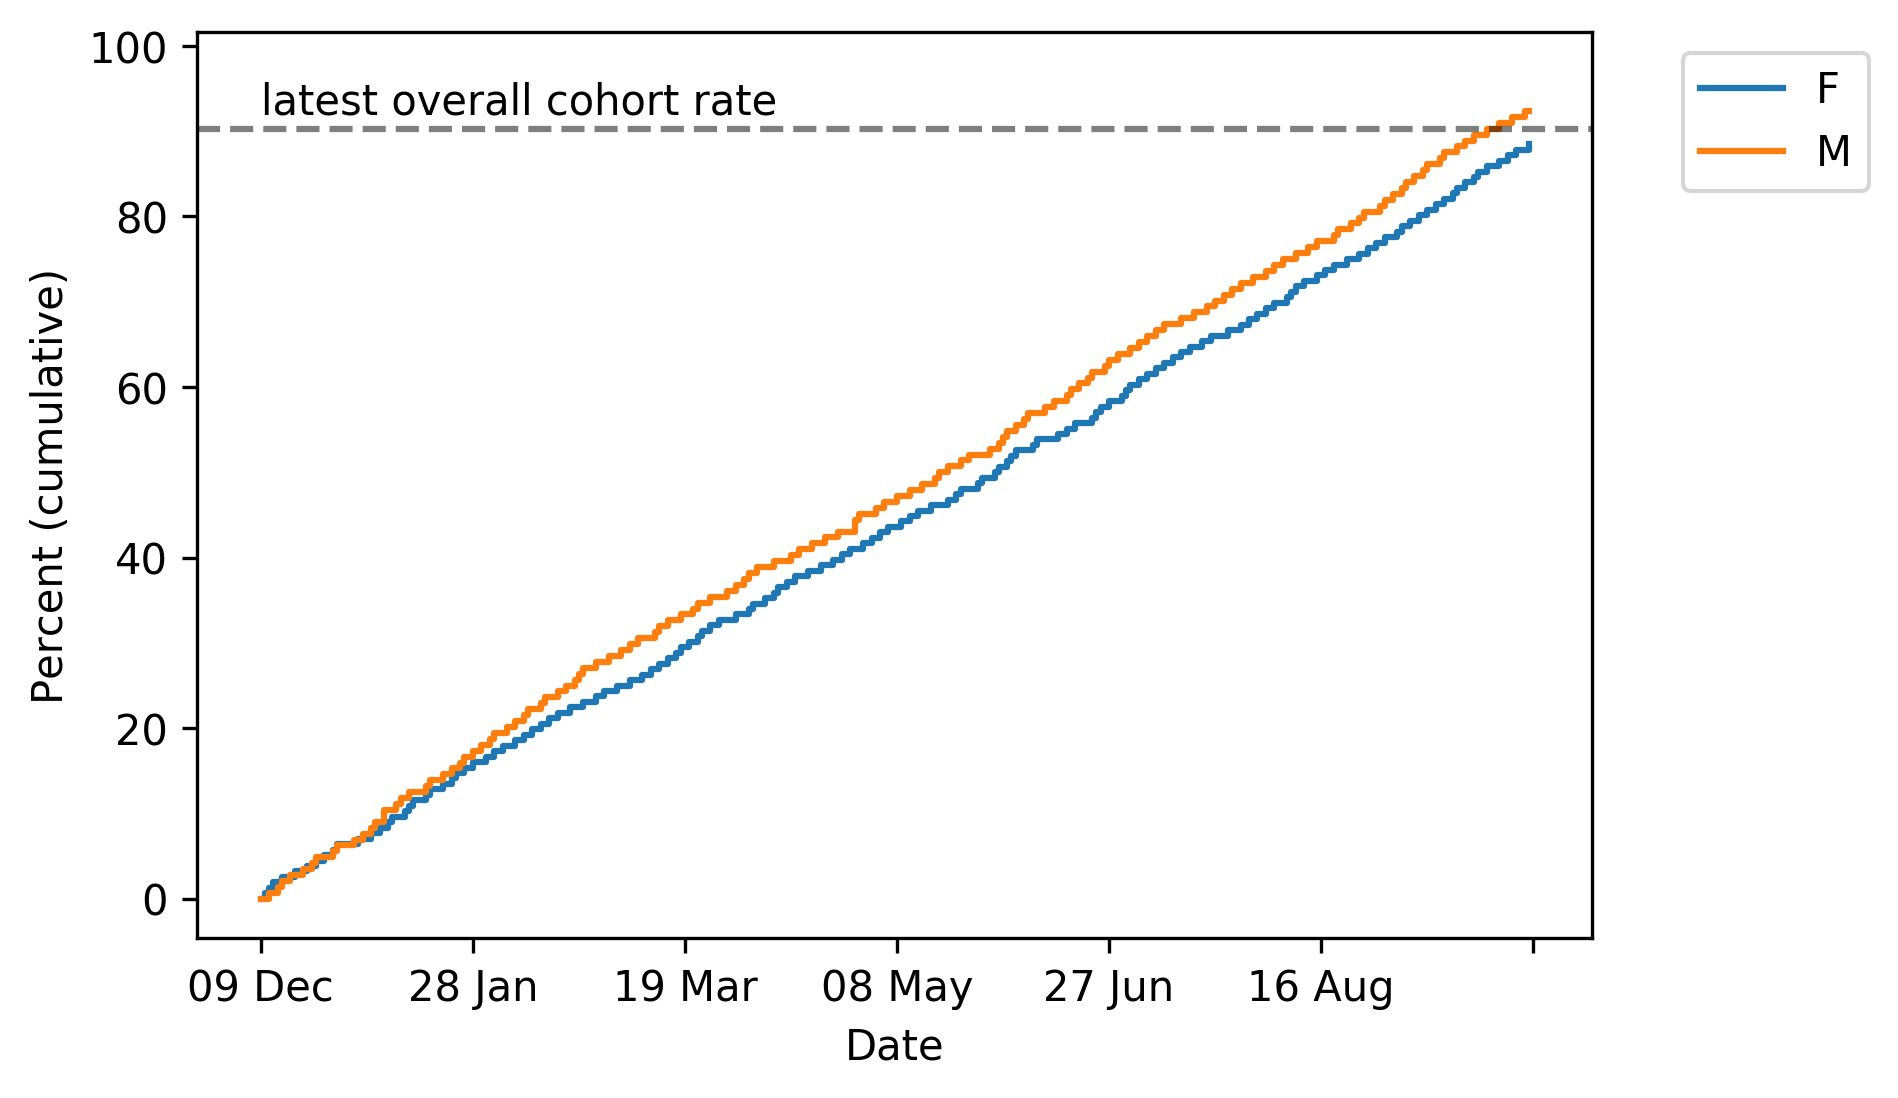

### COVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

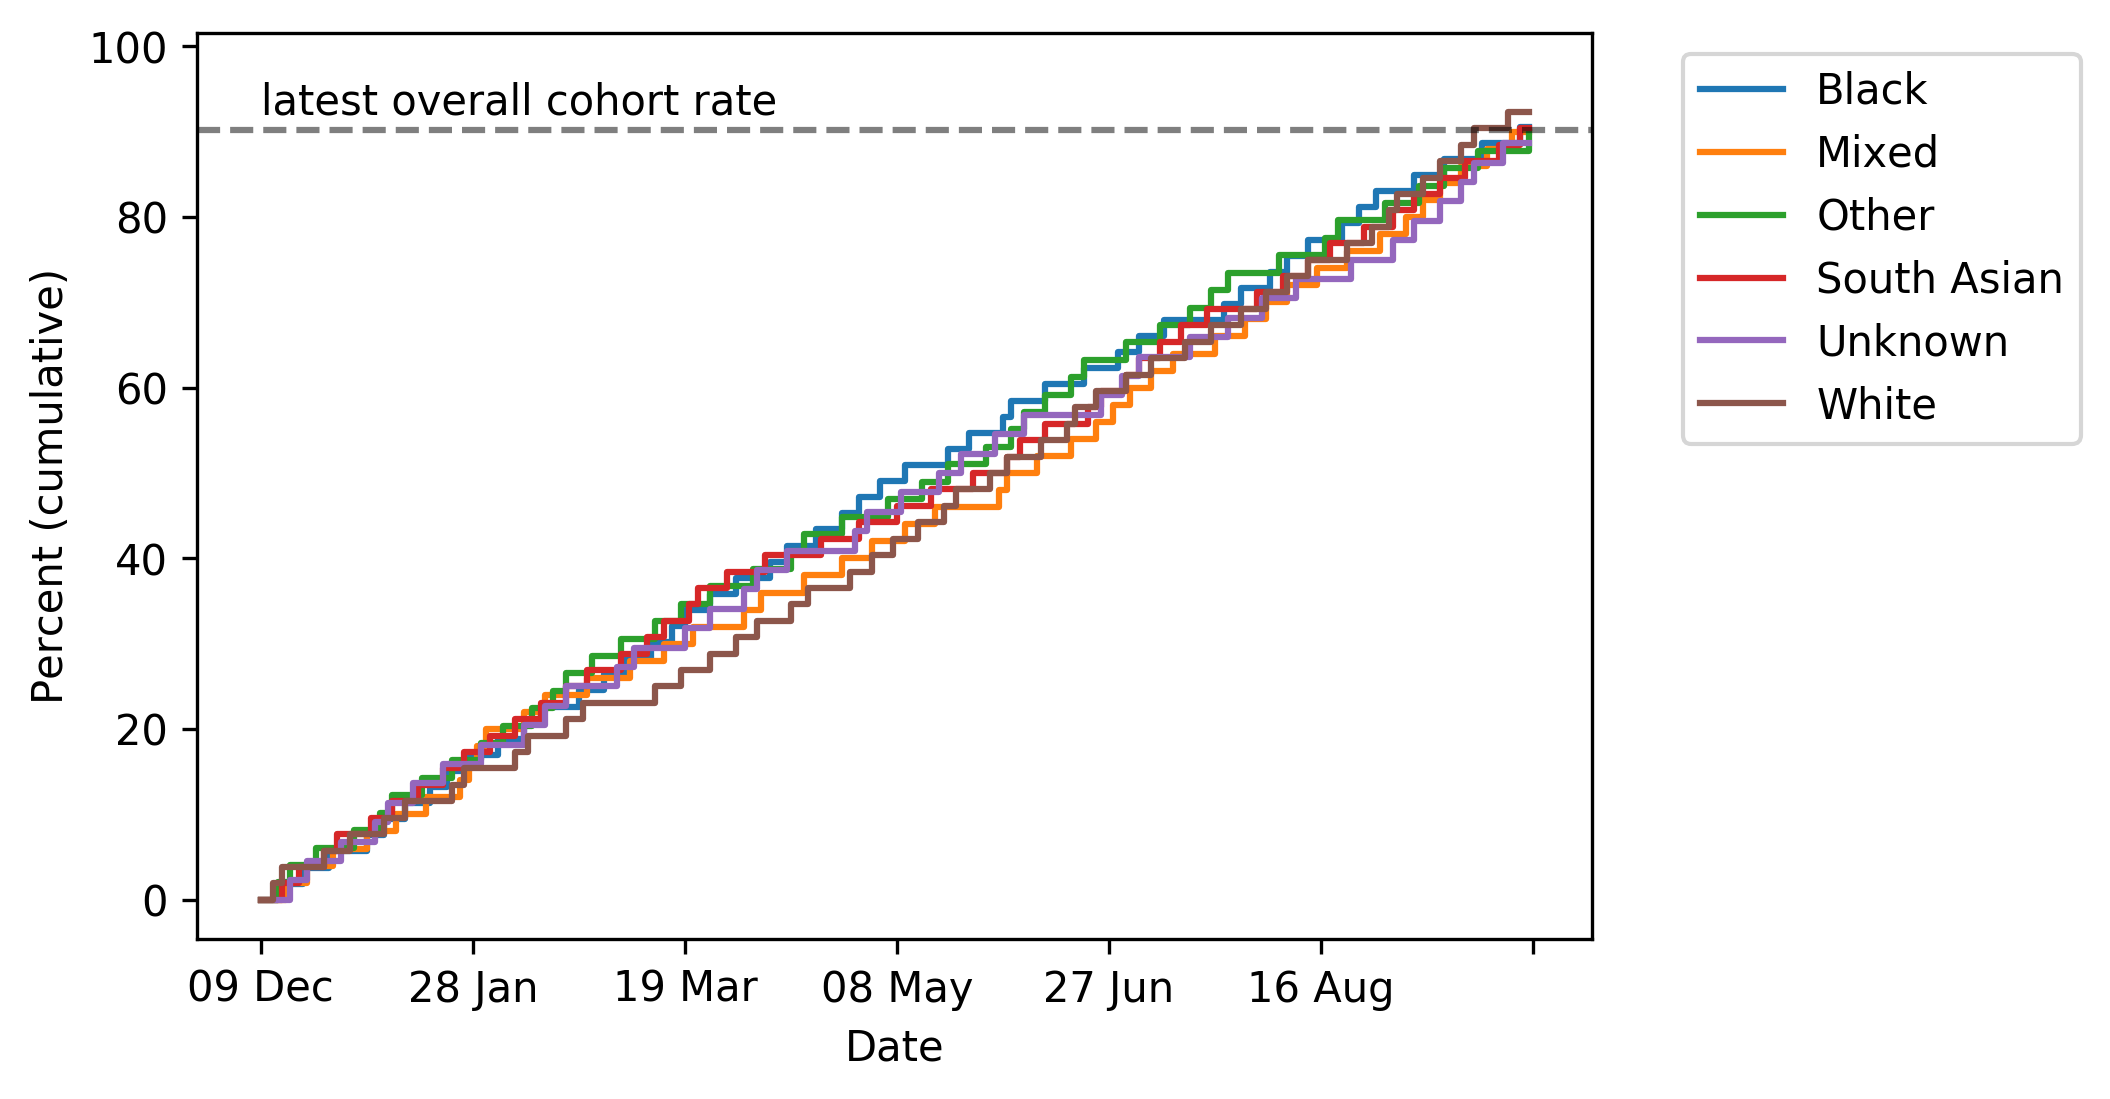

### COVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

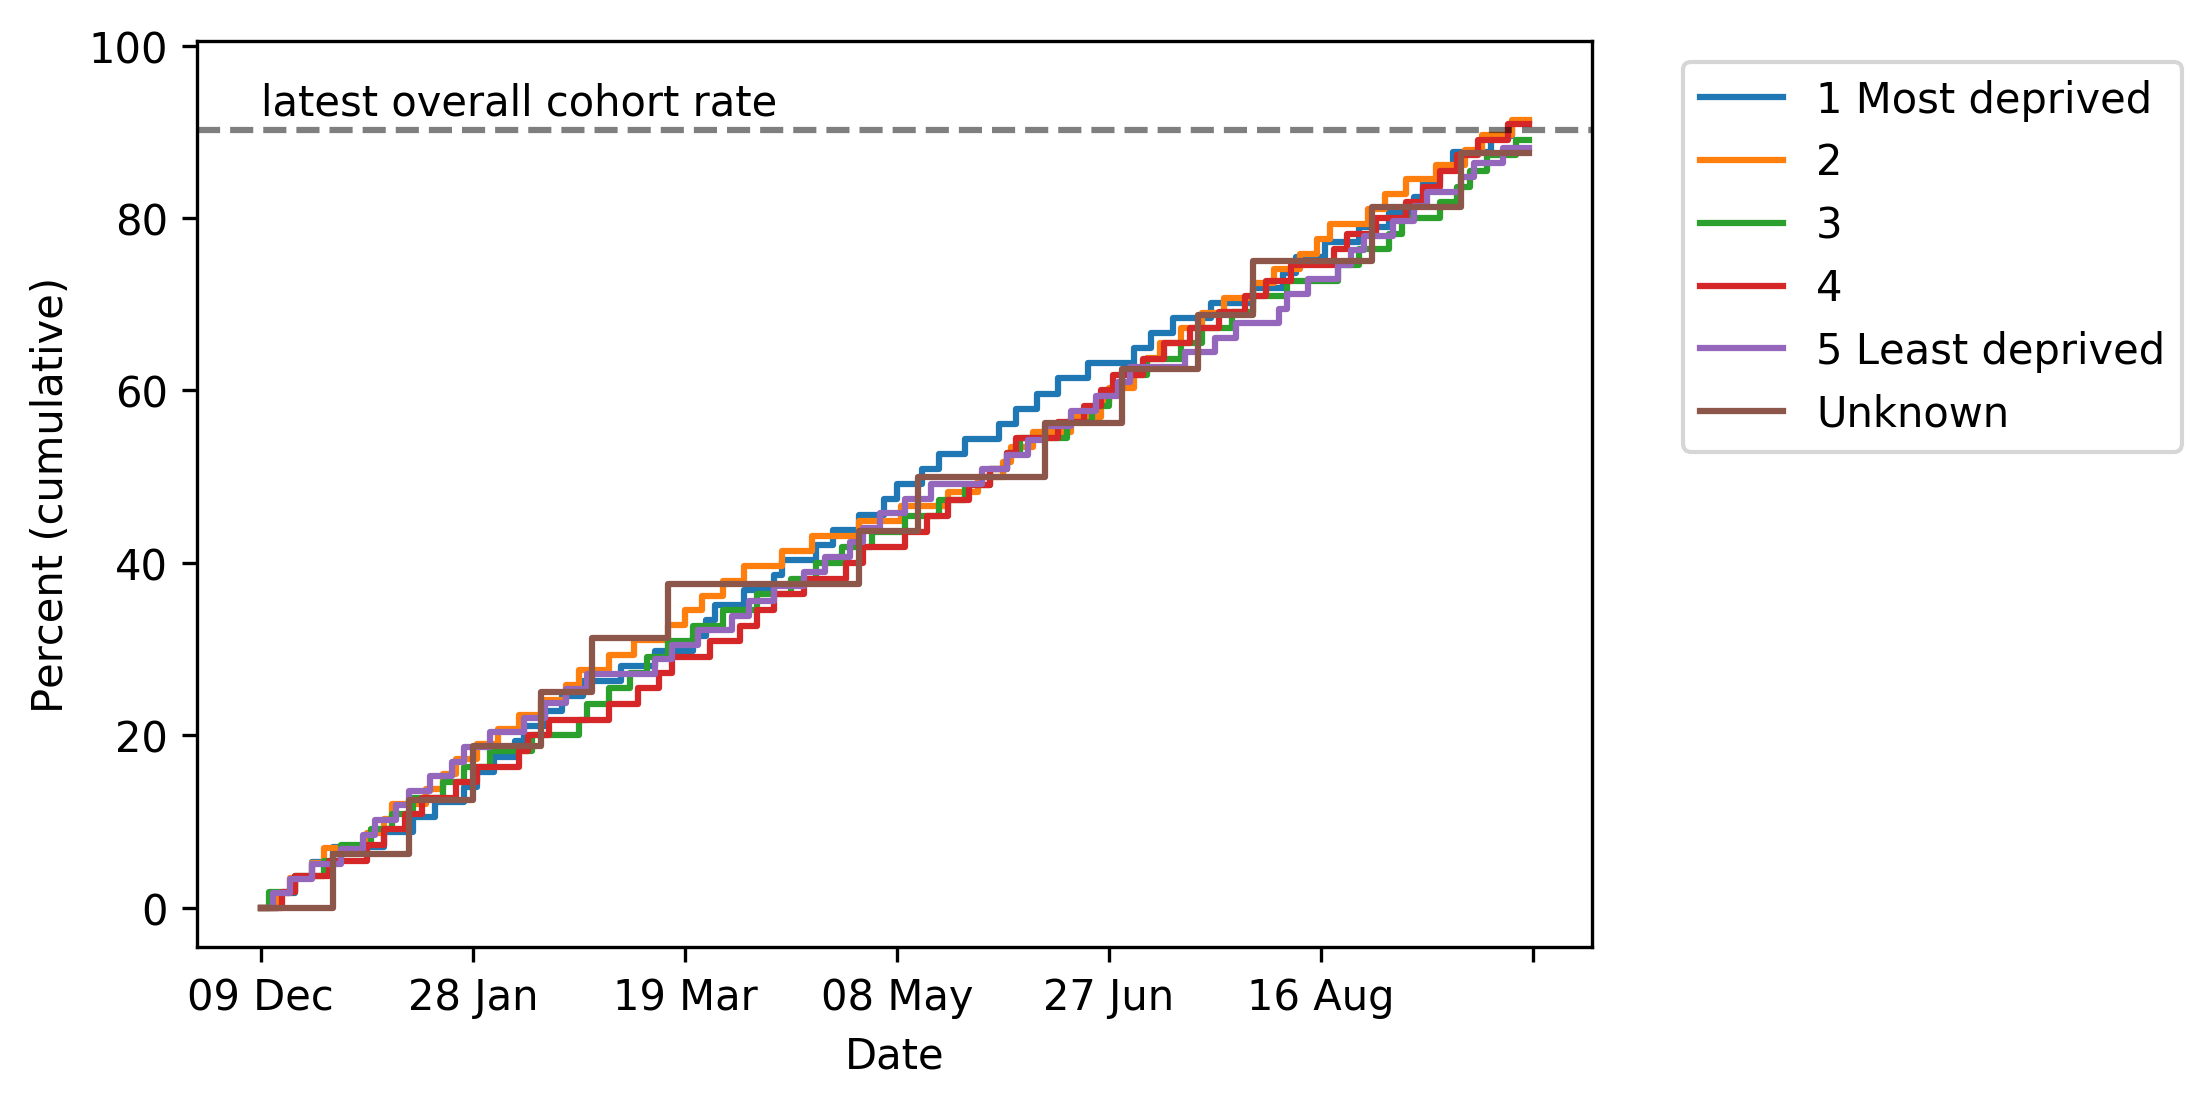

### COVID vaccinations among 65-69 population
 ### by BMI

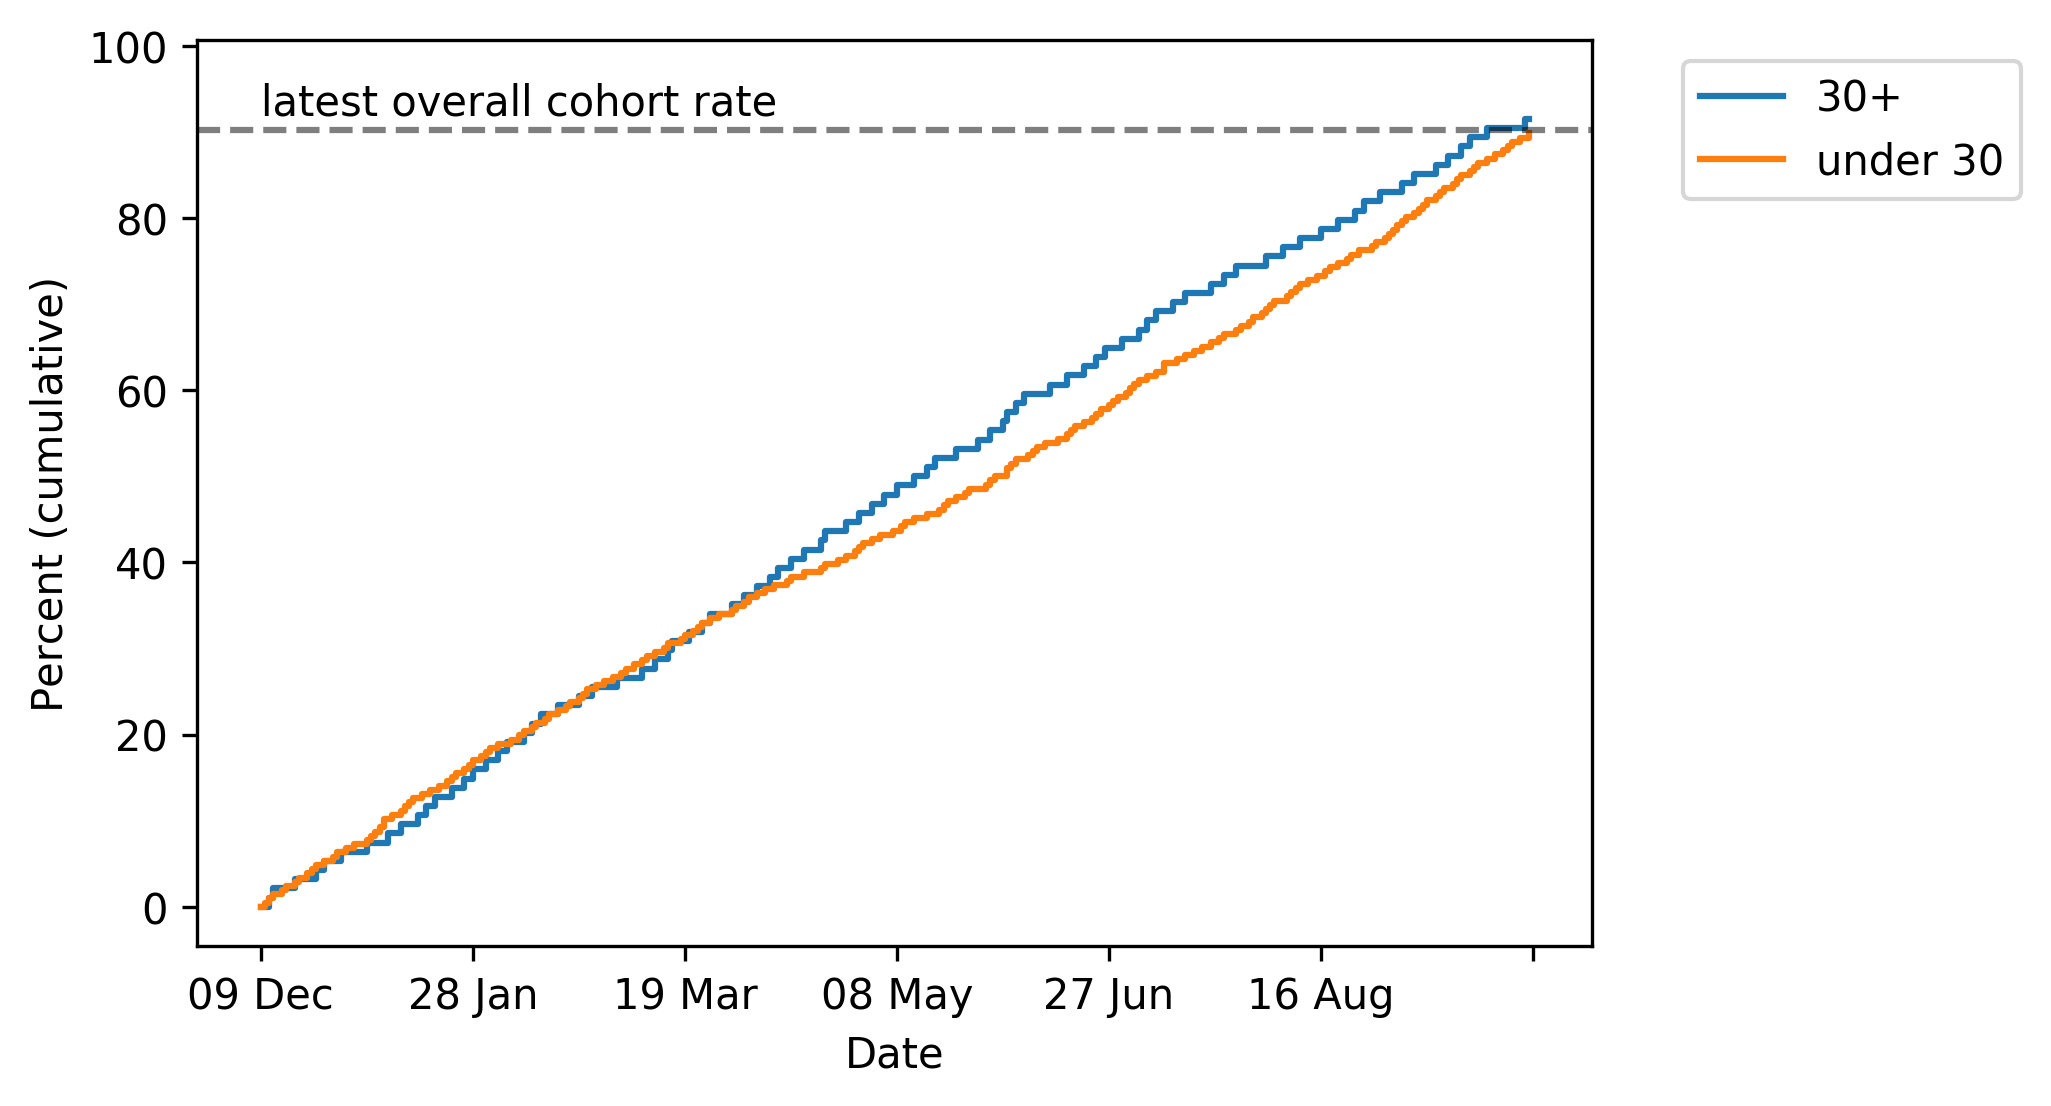

### COVID vaccinations among 65-69 population
 ### by Dementia

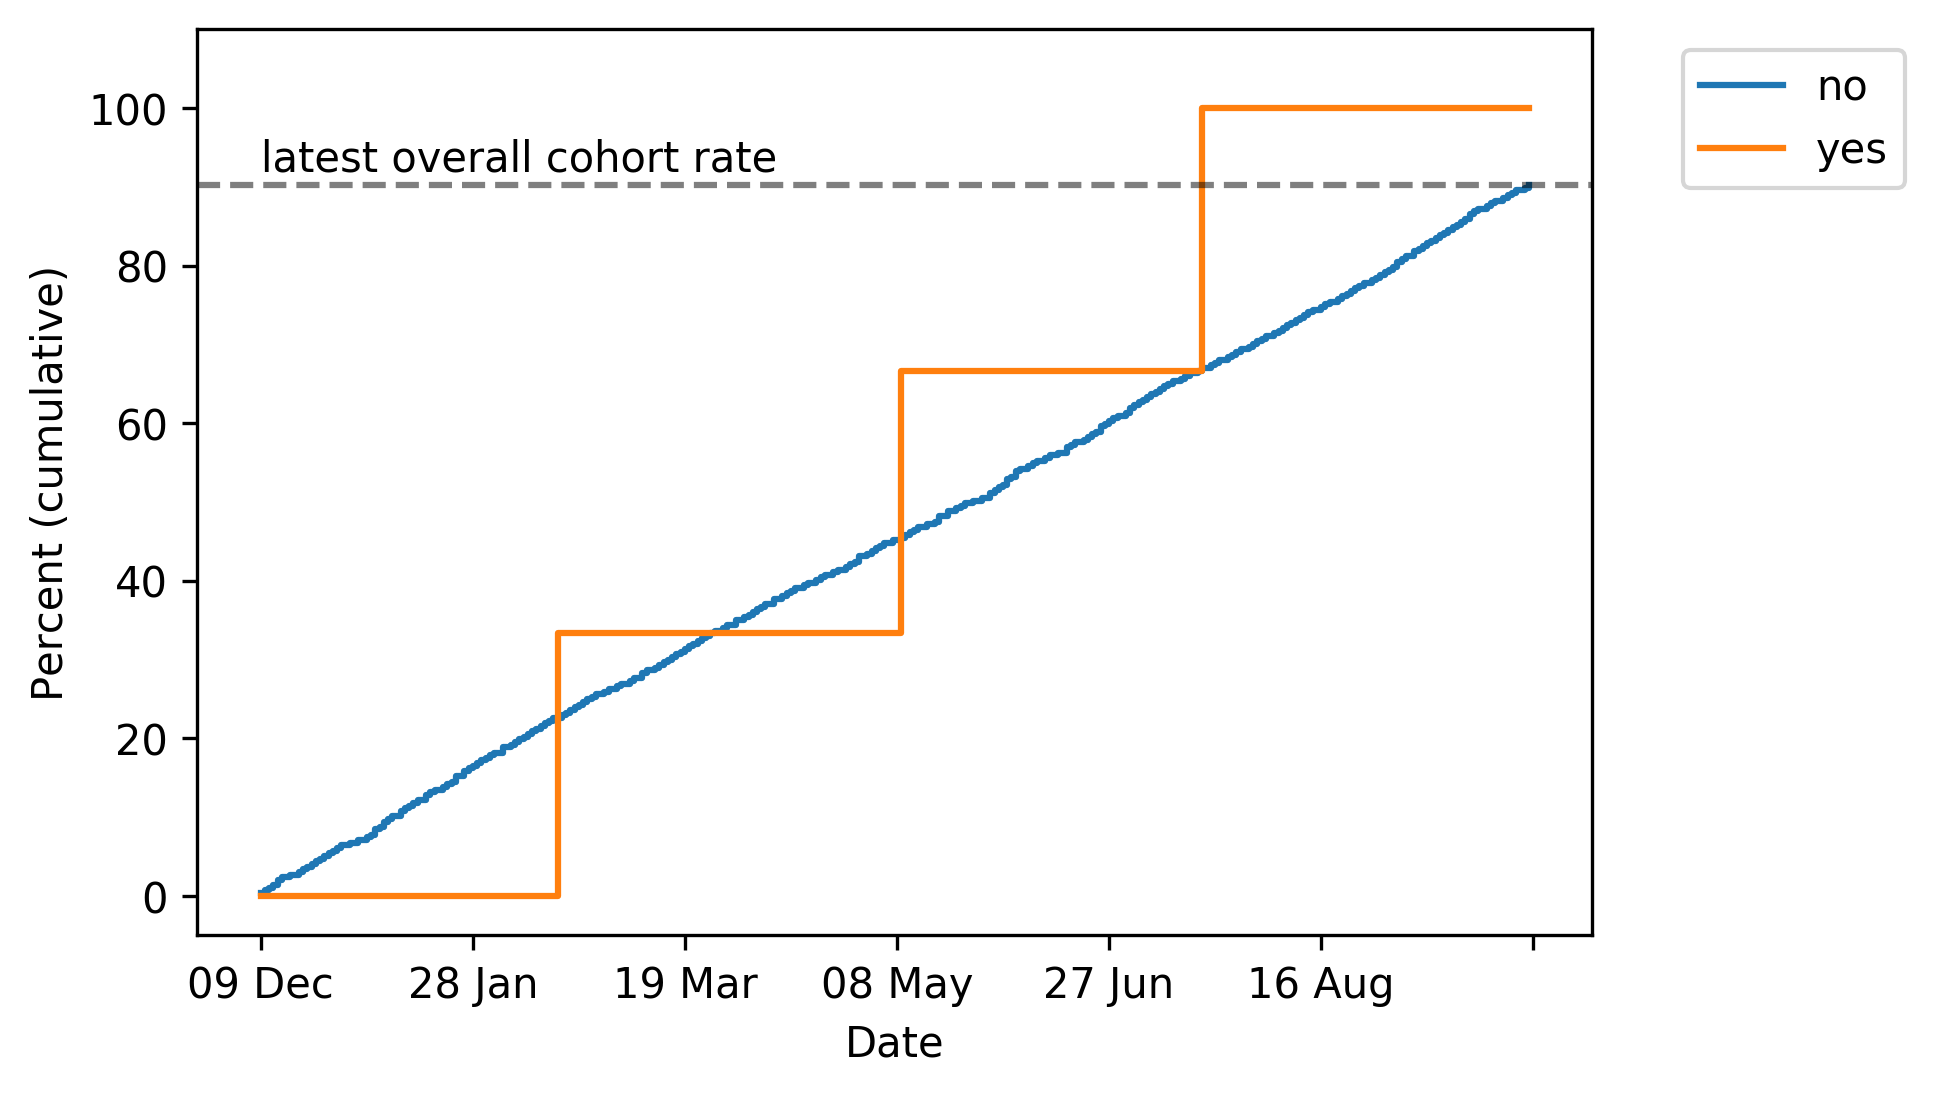

### COVID vaccinations among 65-69 population
 ### by Learning disability

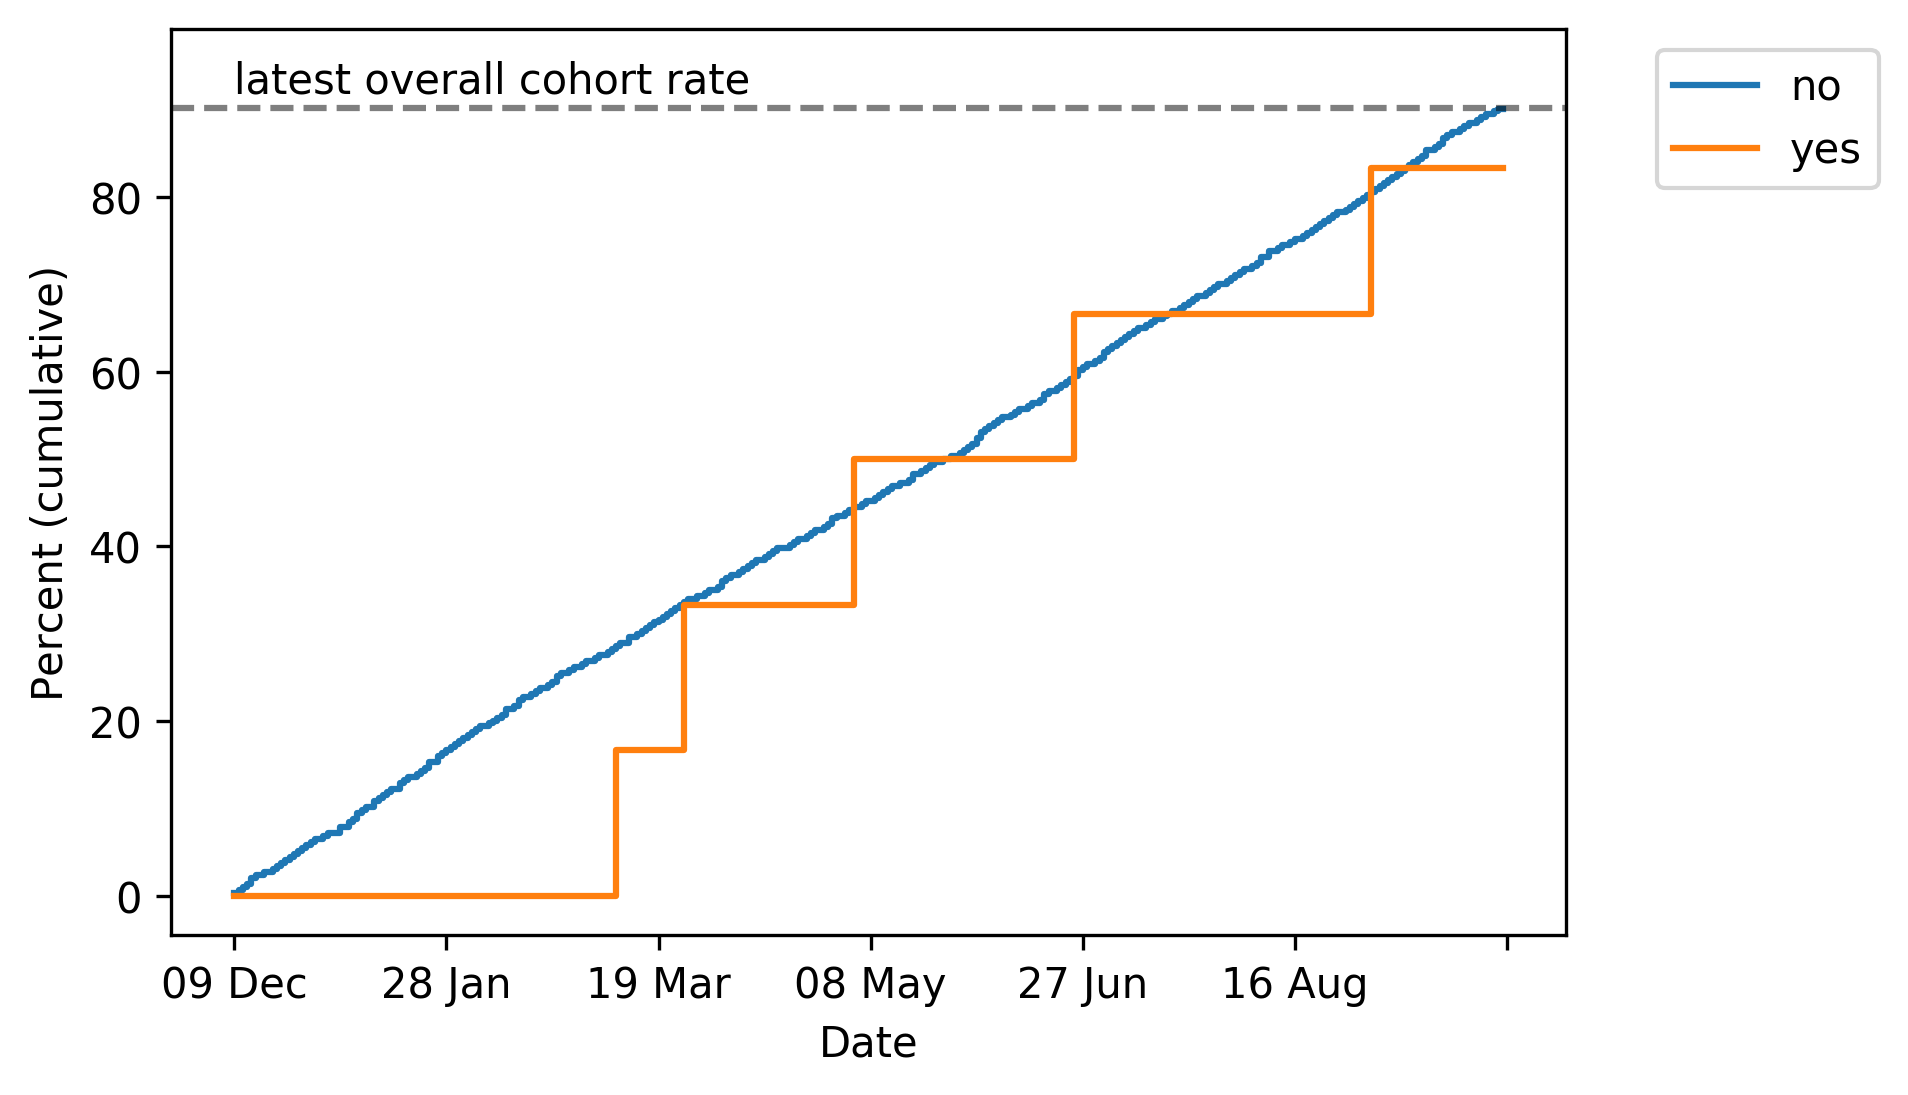

### COVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

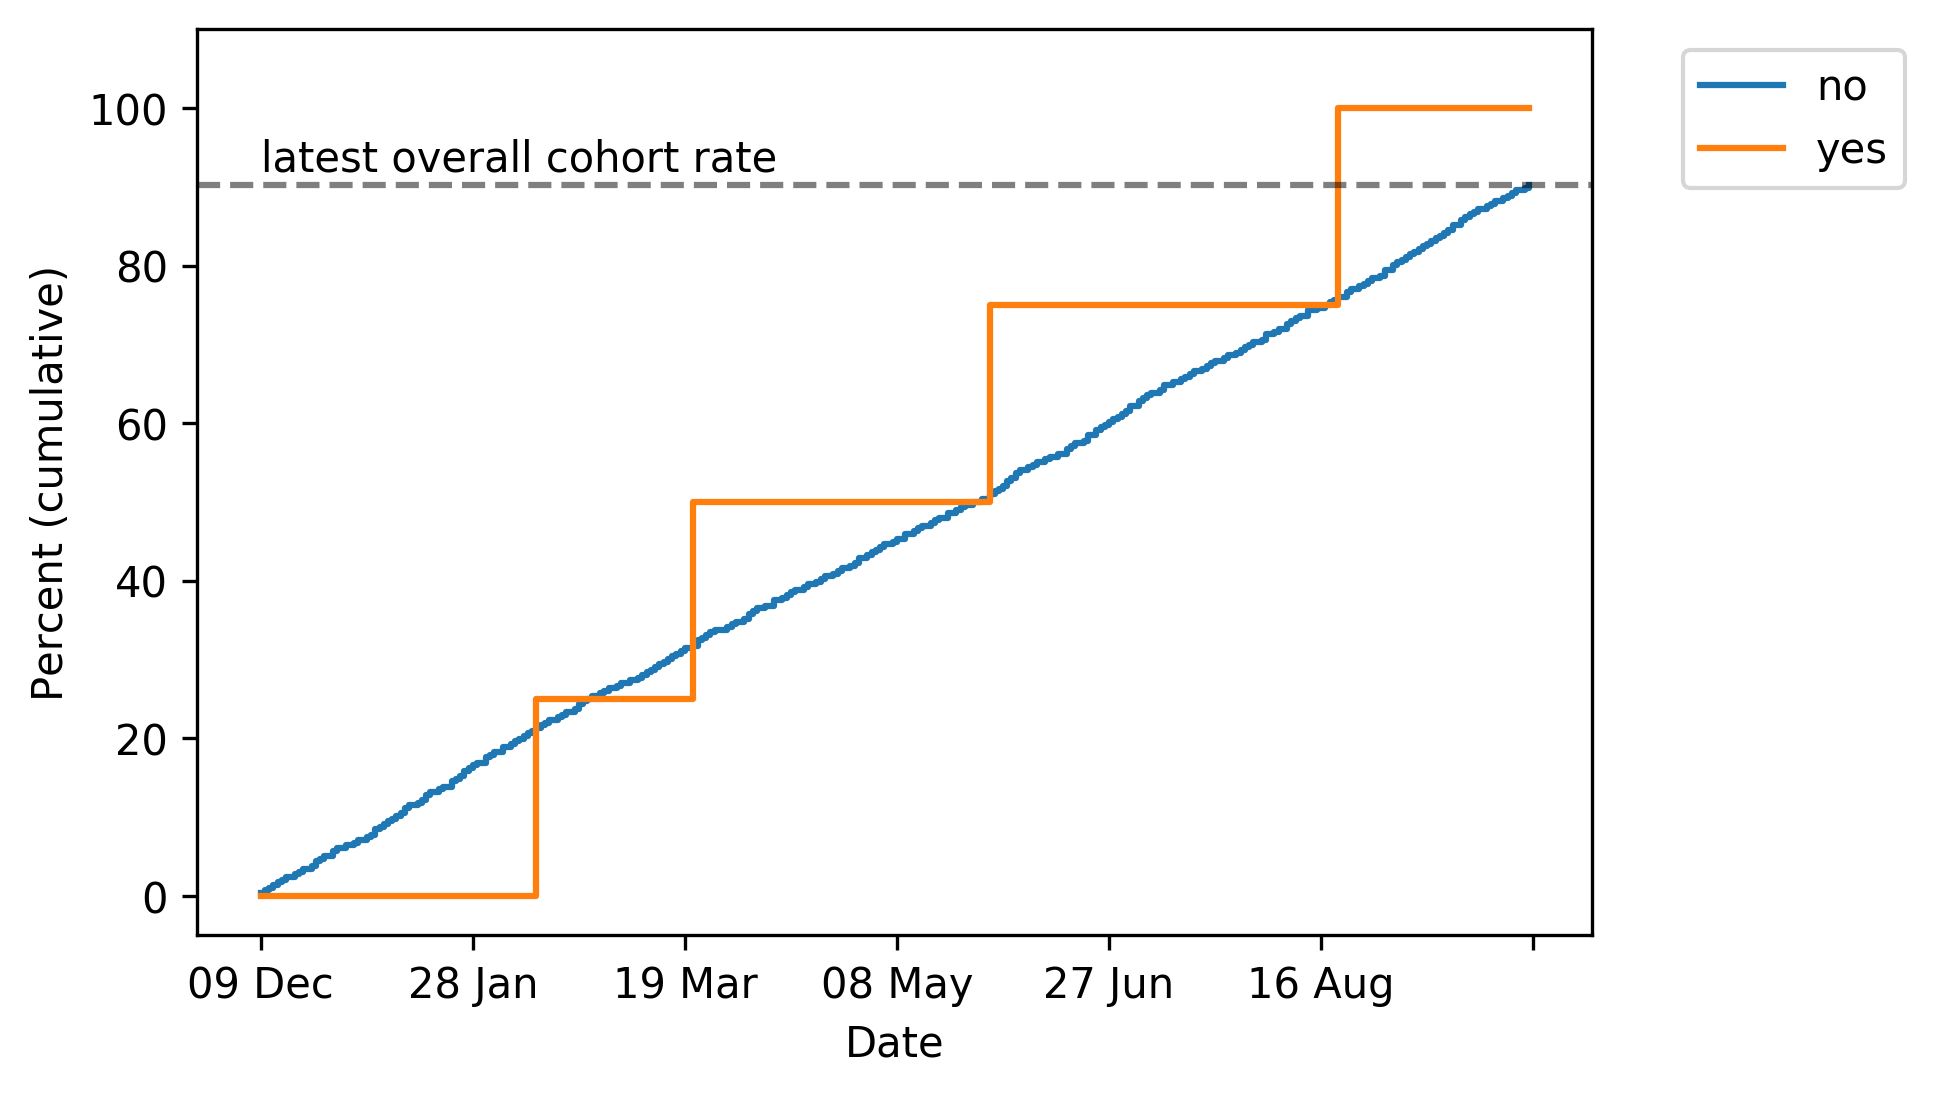

### COVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

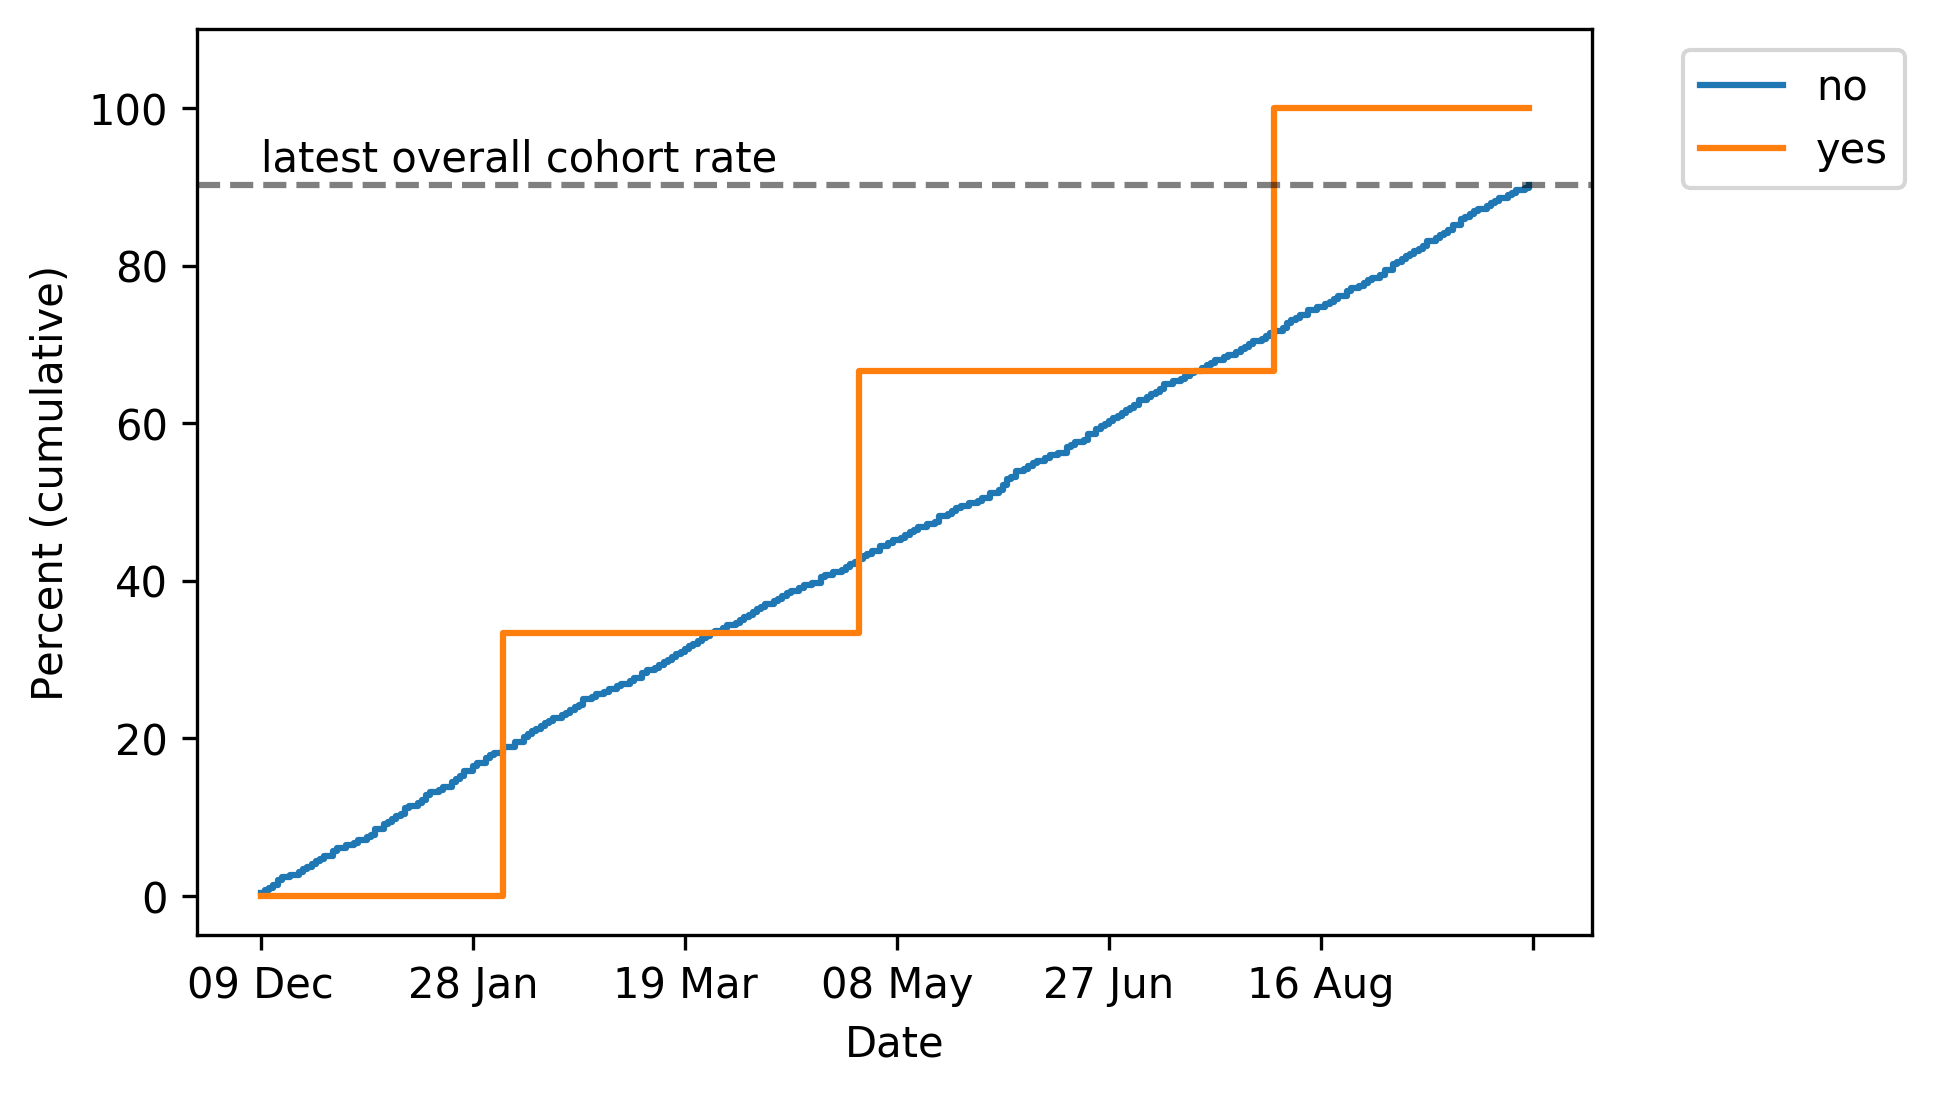

In [7]:
display(Markdown("## 65-69 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="65-69", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 60-64 population according to demographic/clinical features, cumulatively by day. <a name='charts60' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 60-64 population

### COVID vaccinations among 60-64 population
 ### by Sex

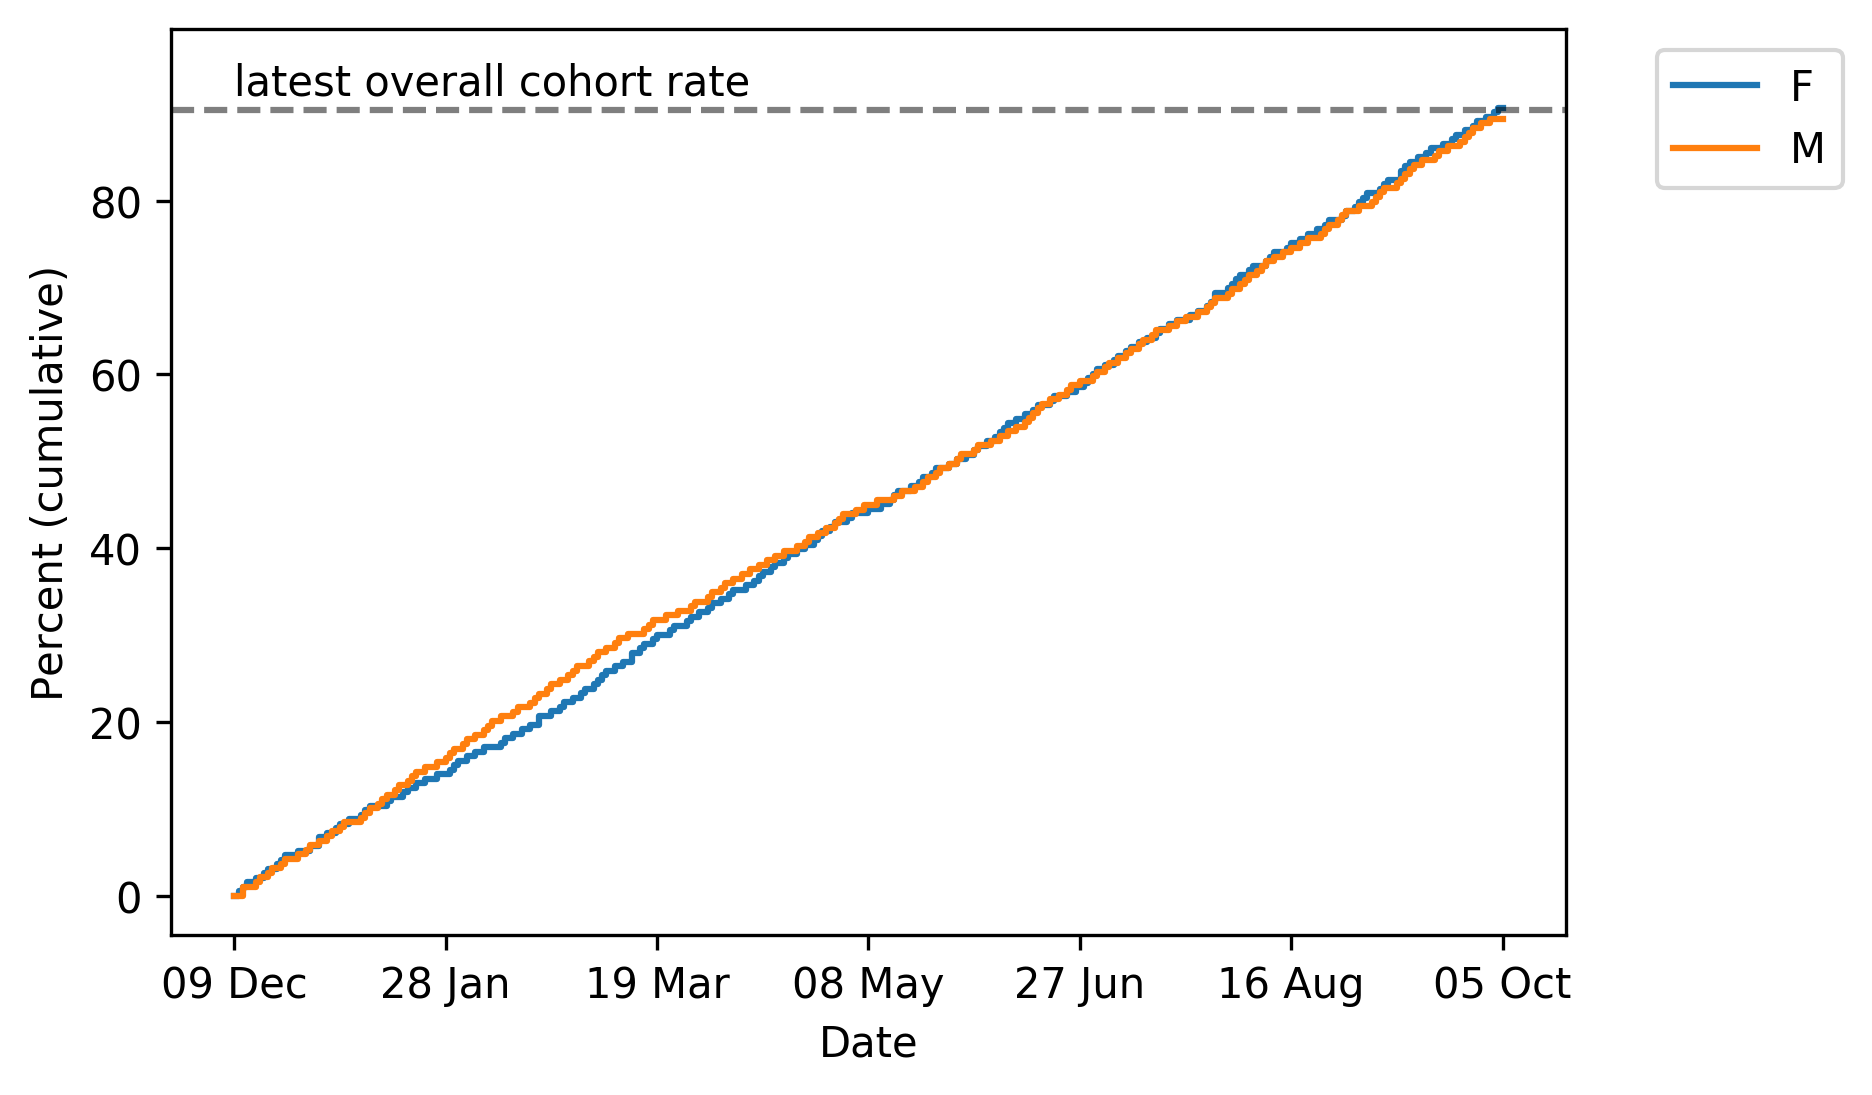

### COVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

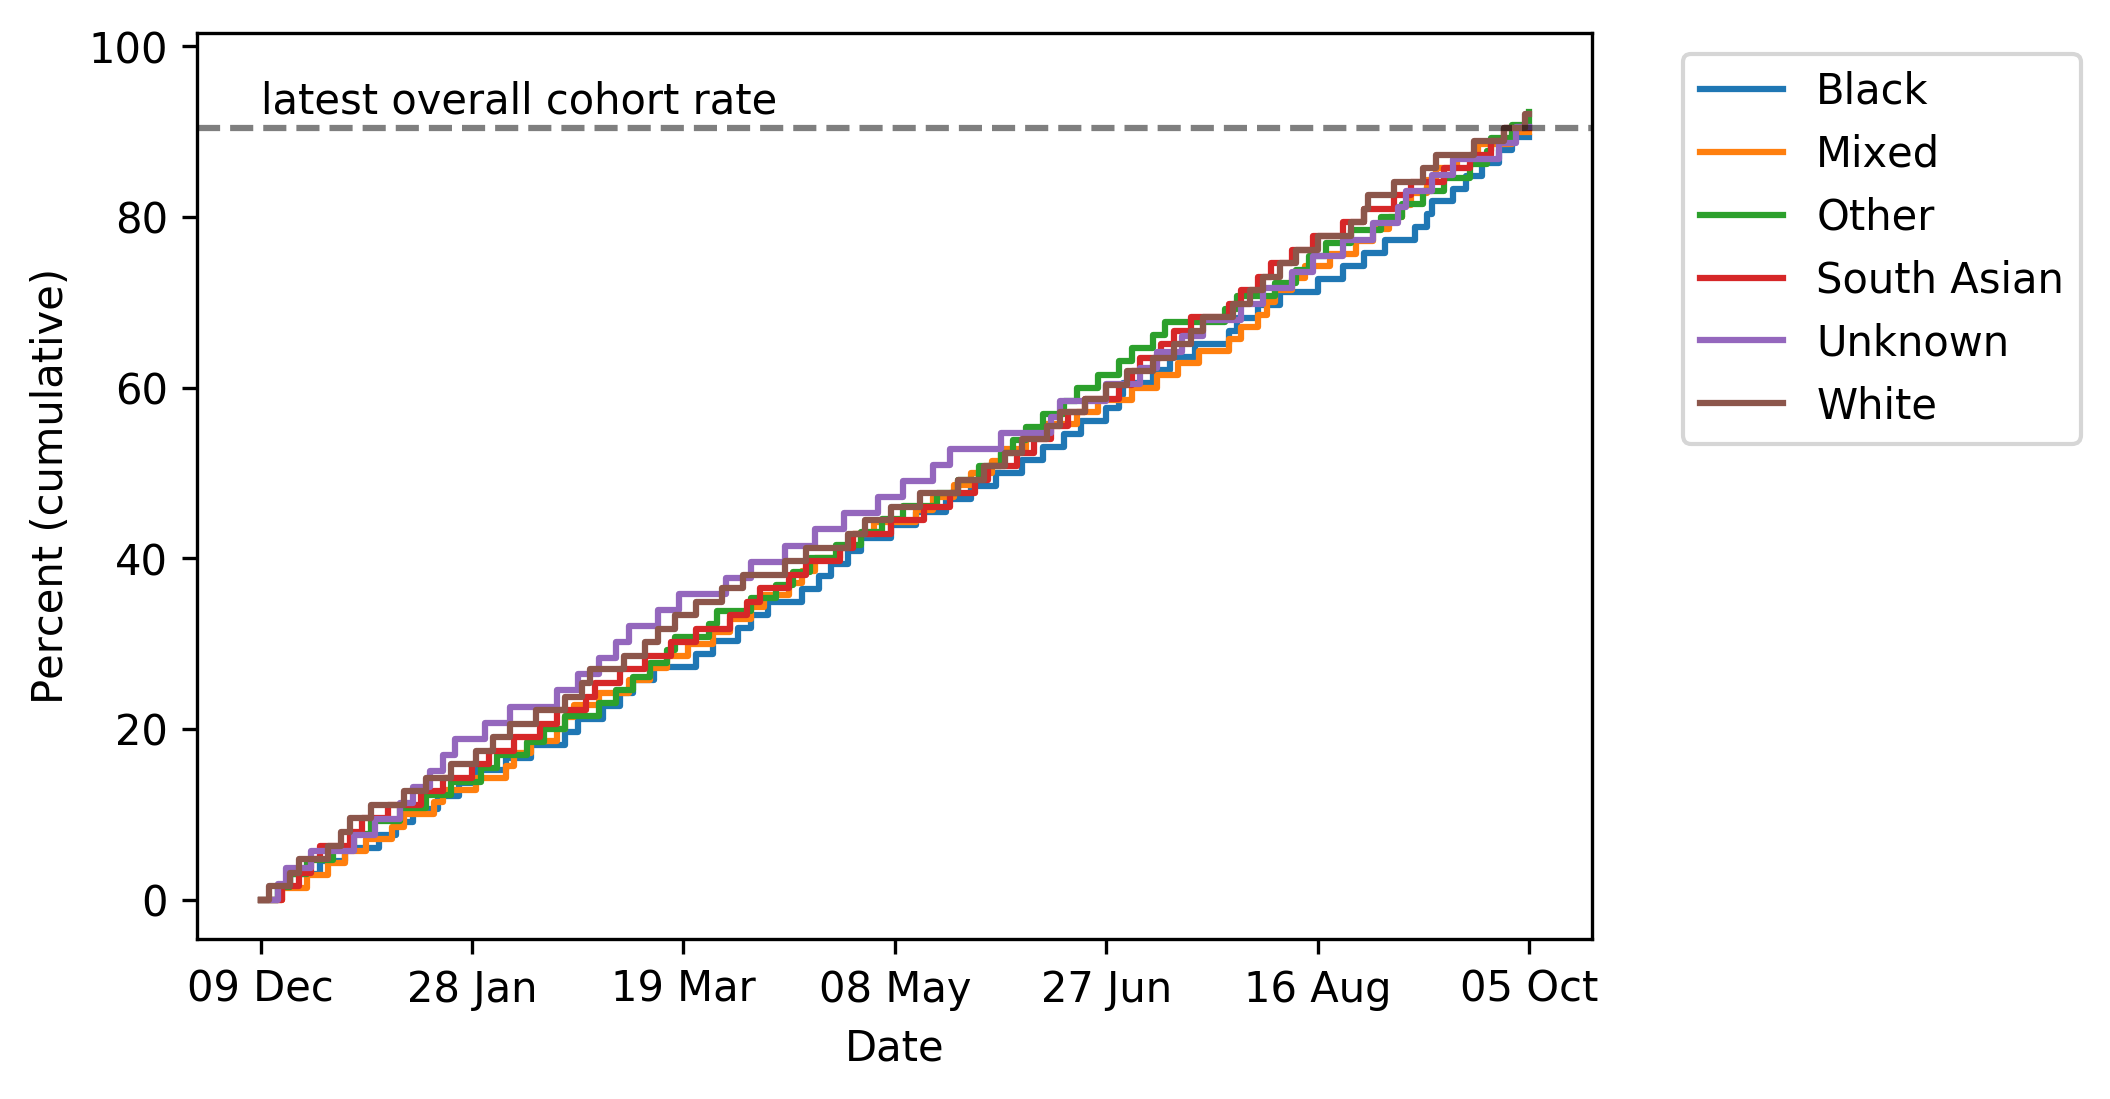

### COVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

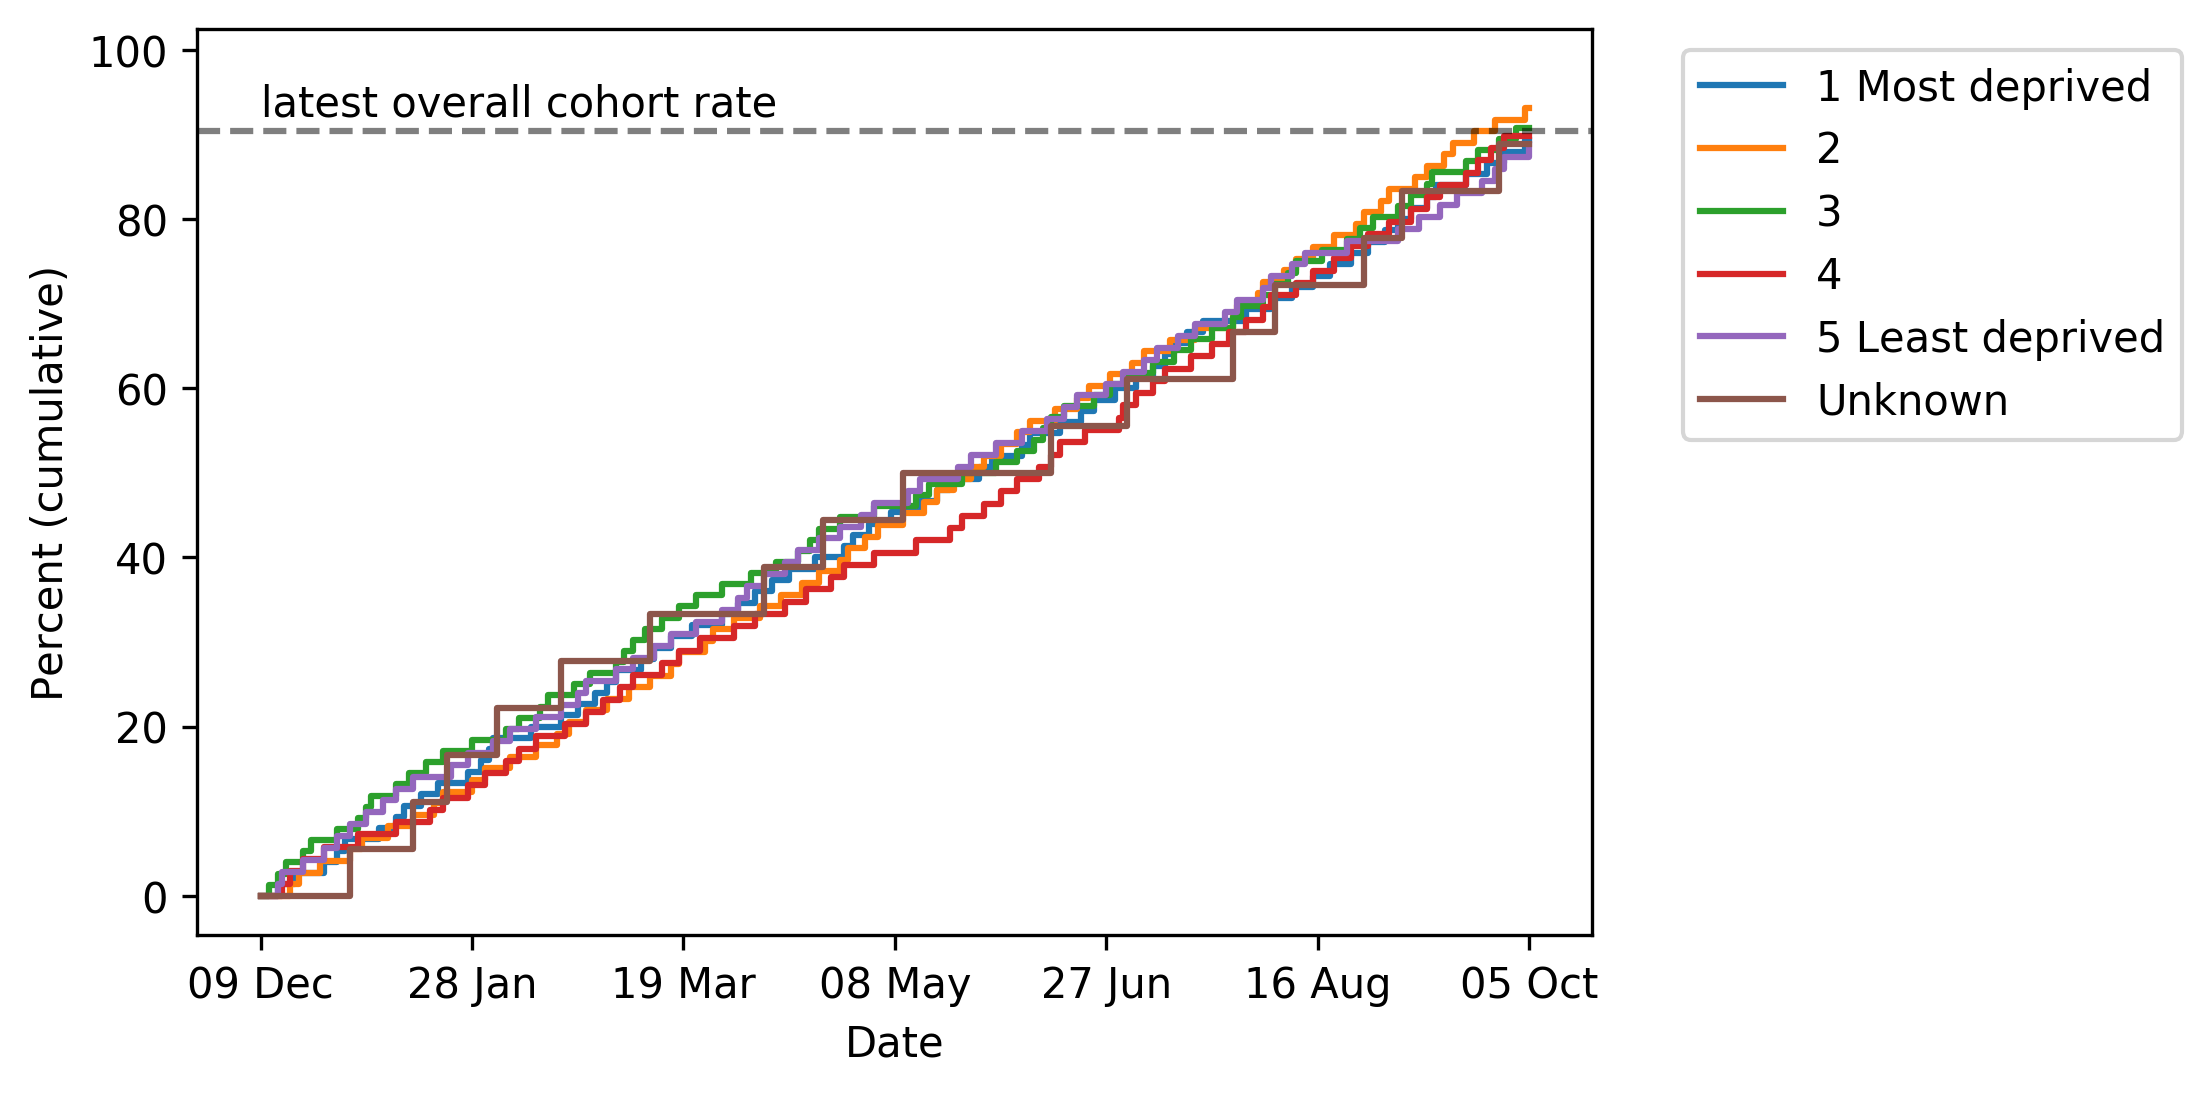

### COVID vaccinations among 60-64 population
 ### by BMI

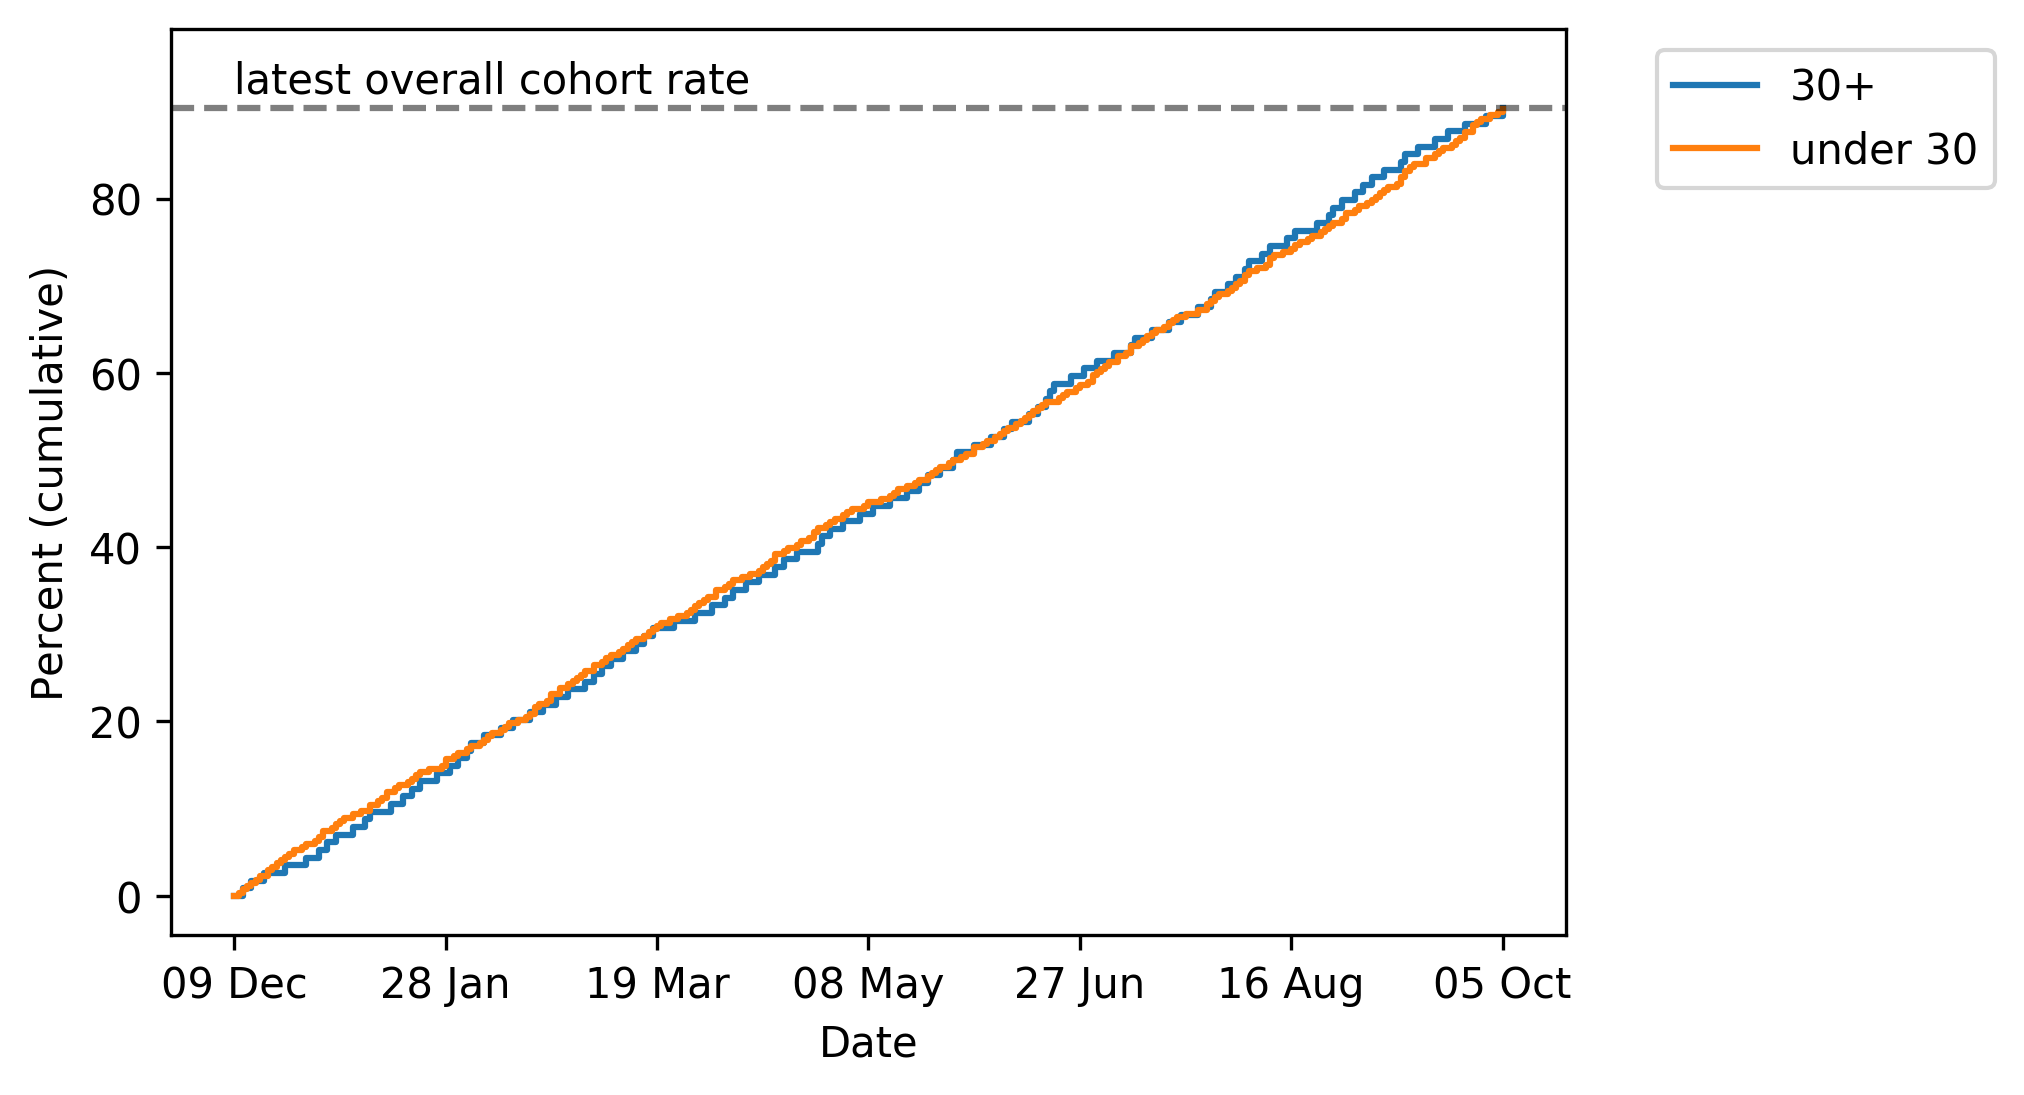

### COVID vaccinations among 60-64 population
 ### by Dementia

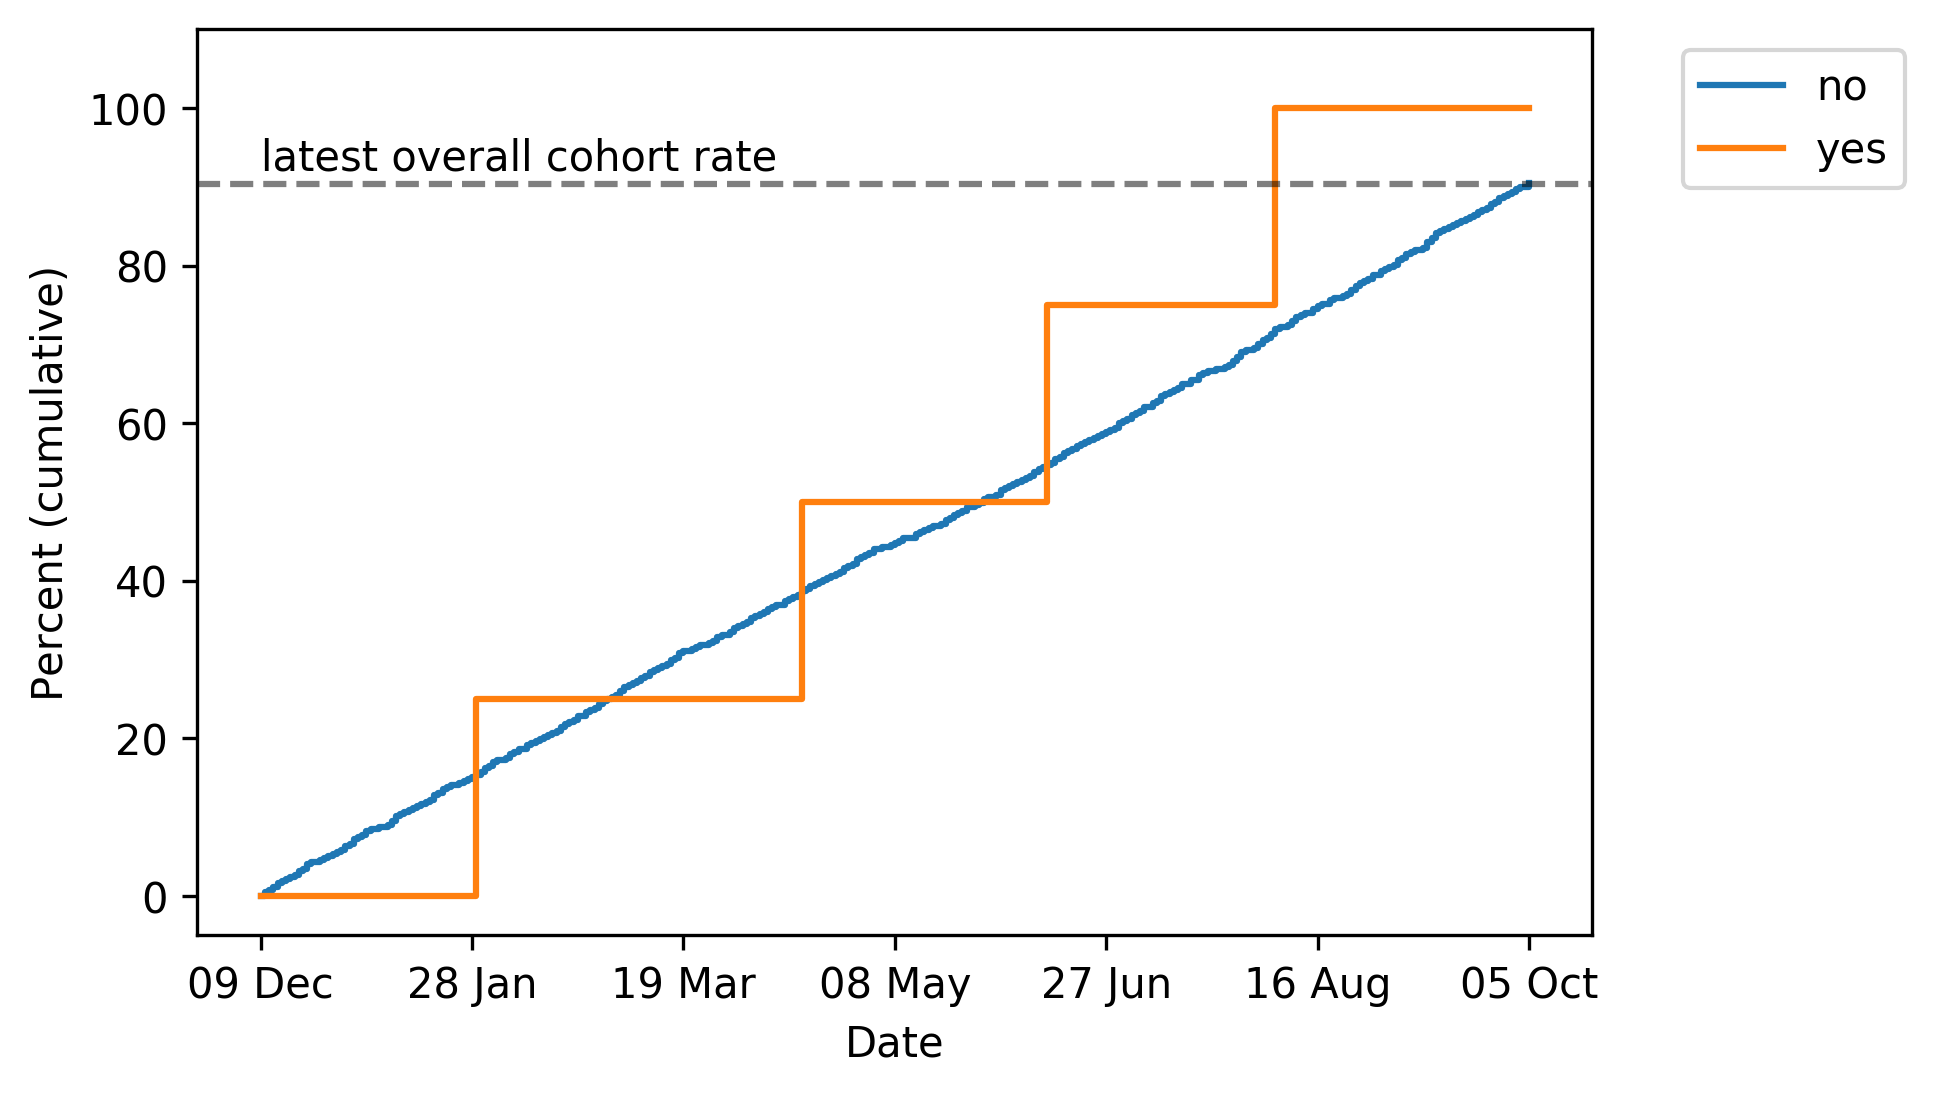

### COVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

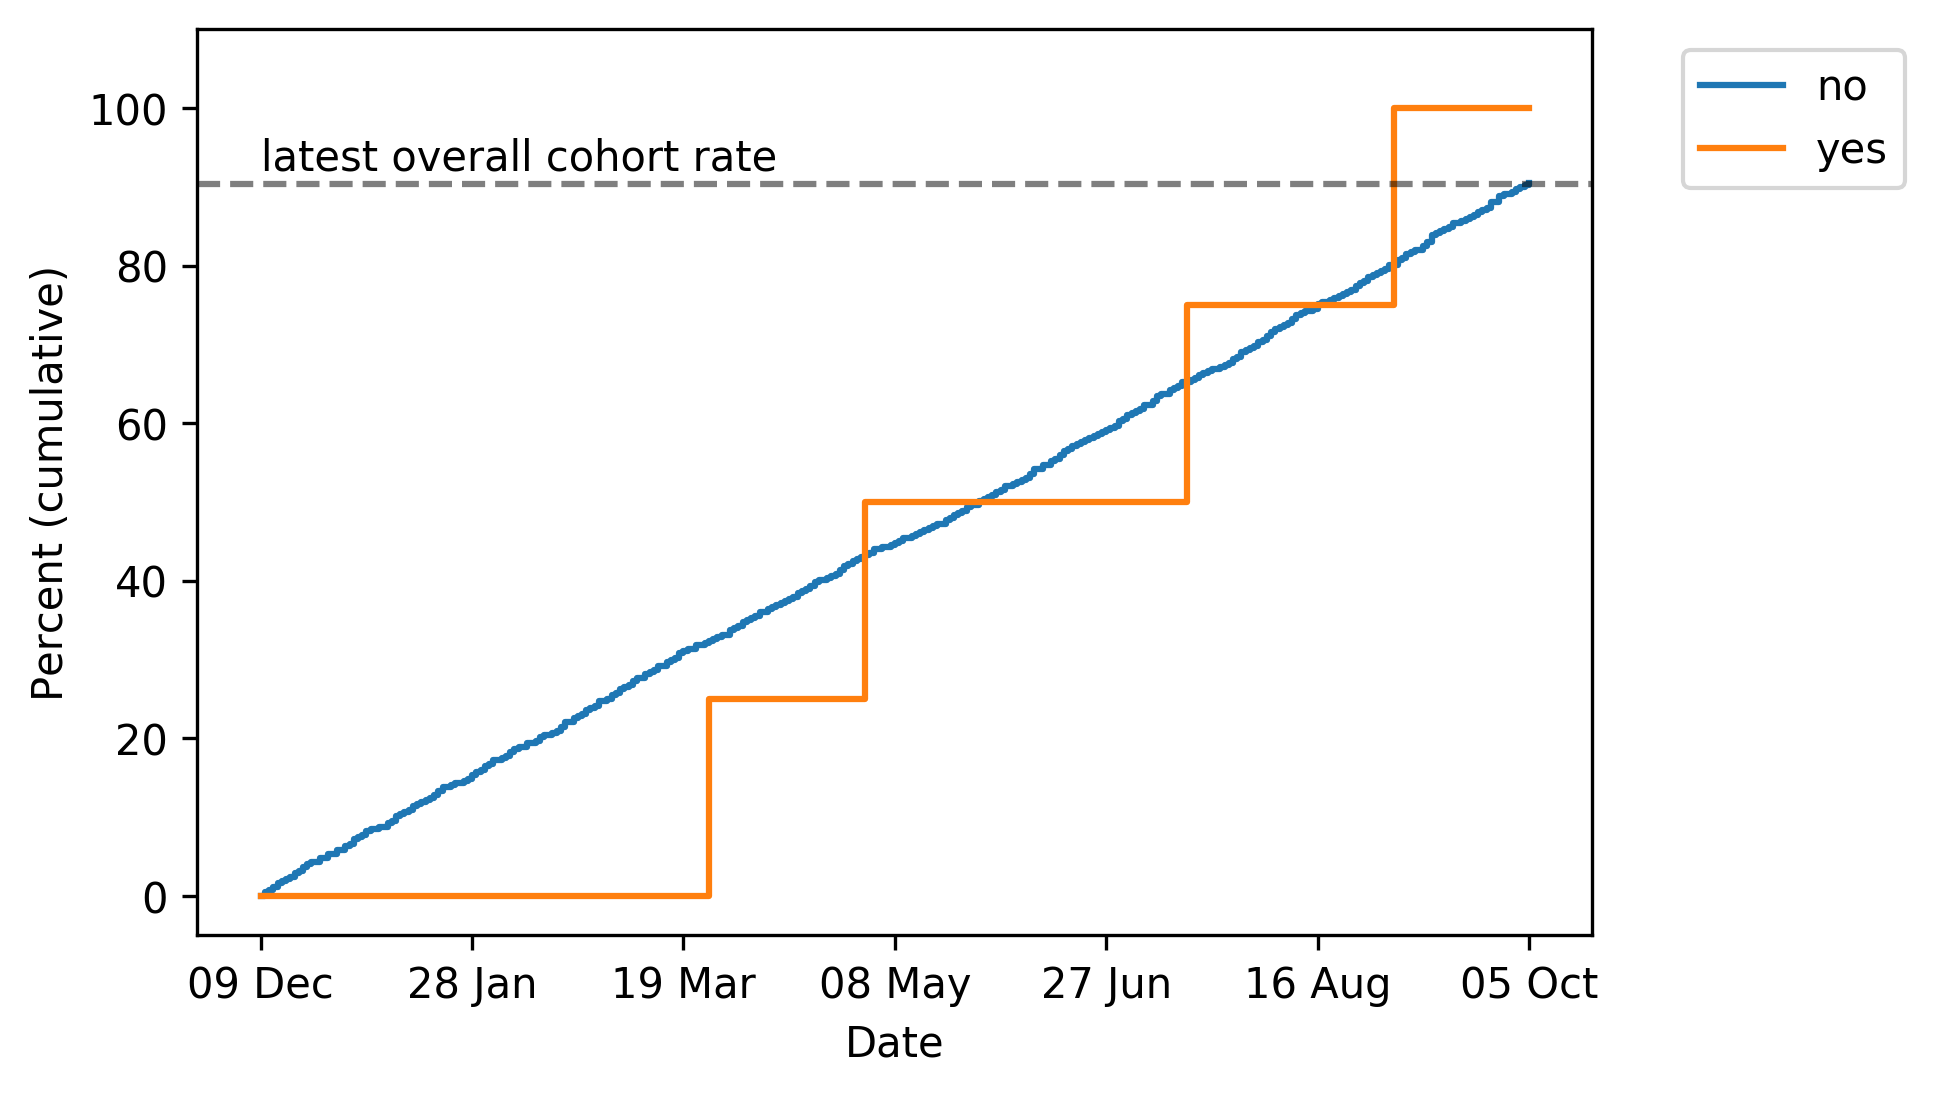

### COVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

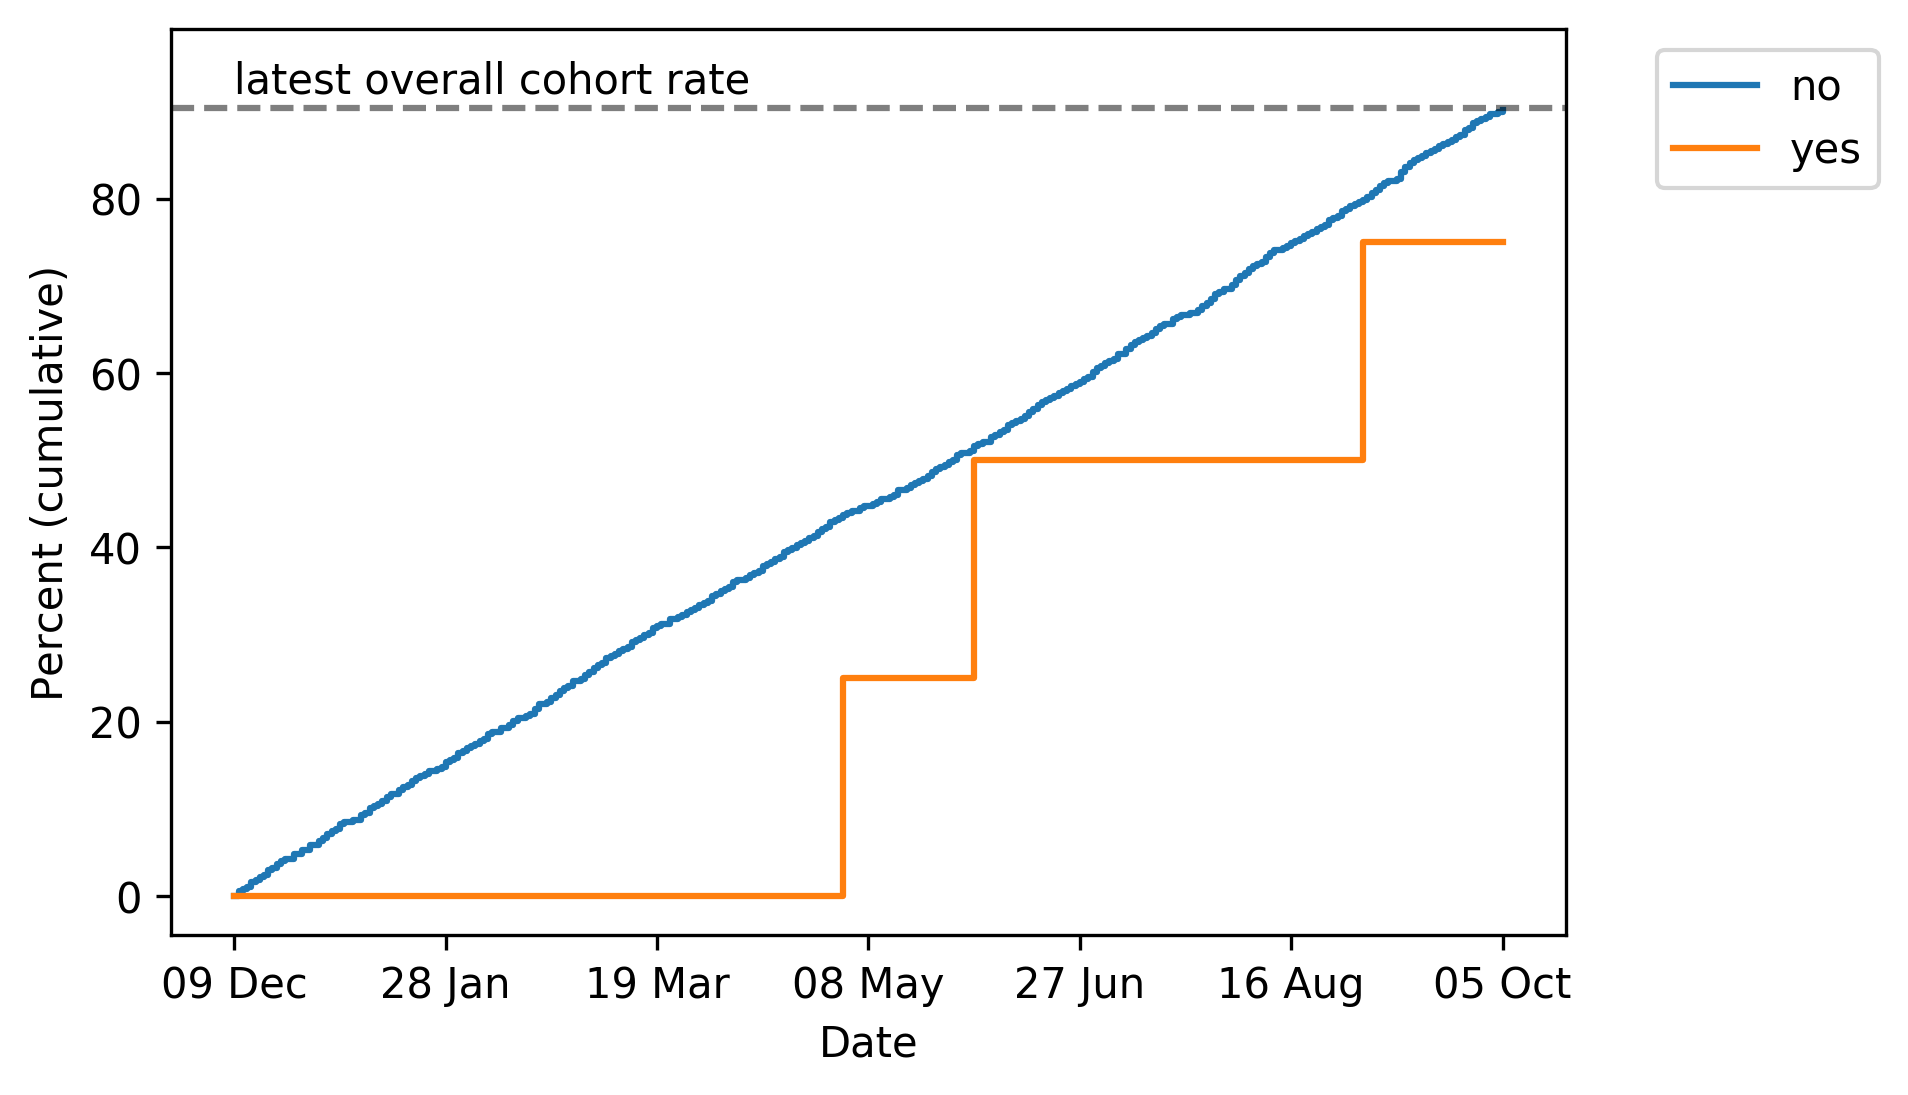

In [8]:
display(Markdown("## 60-64 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="60-64", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 55-59 population according to demographic/clinical features, cumulatively by day. <a name='charts55' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 55-59 population

### COVID vaccinations among 55-59 population
 ### by Sex

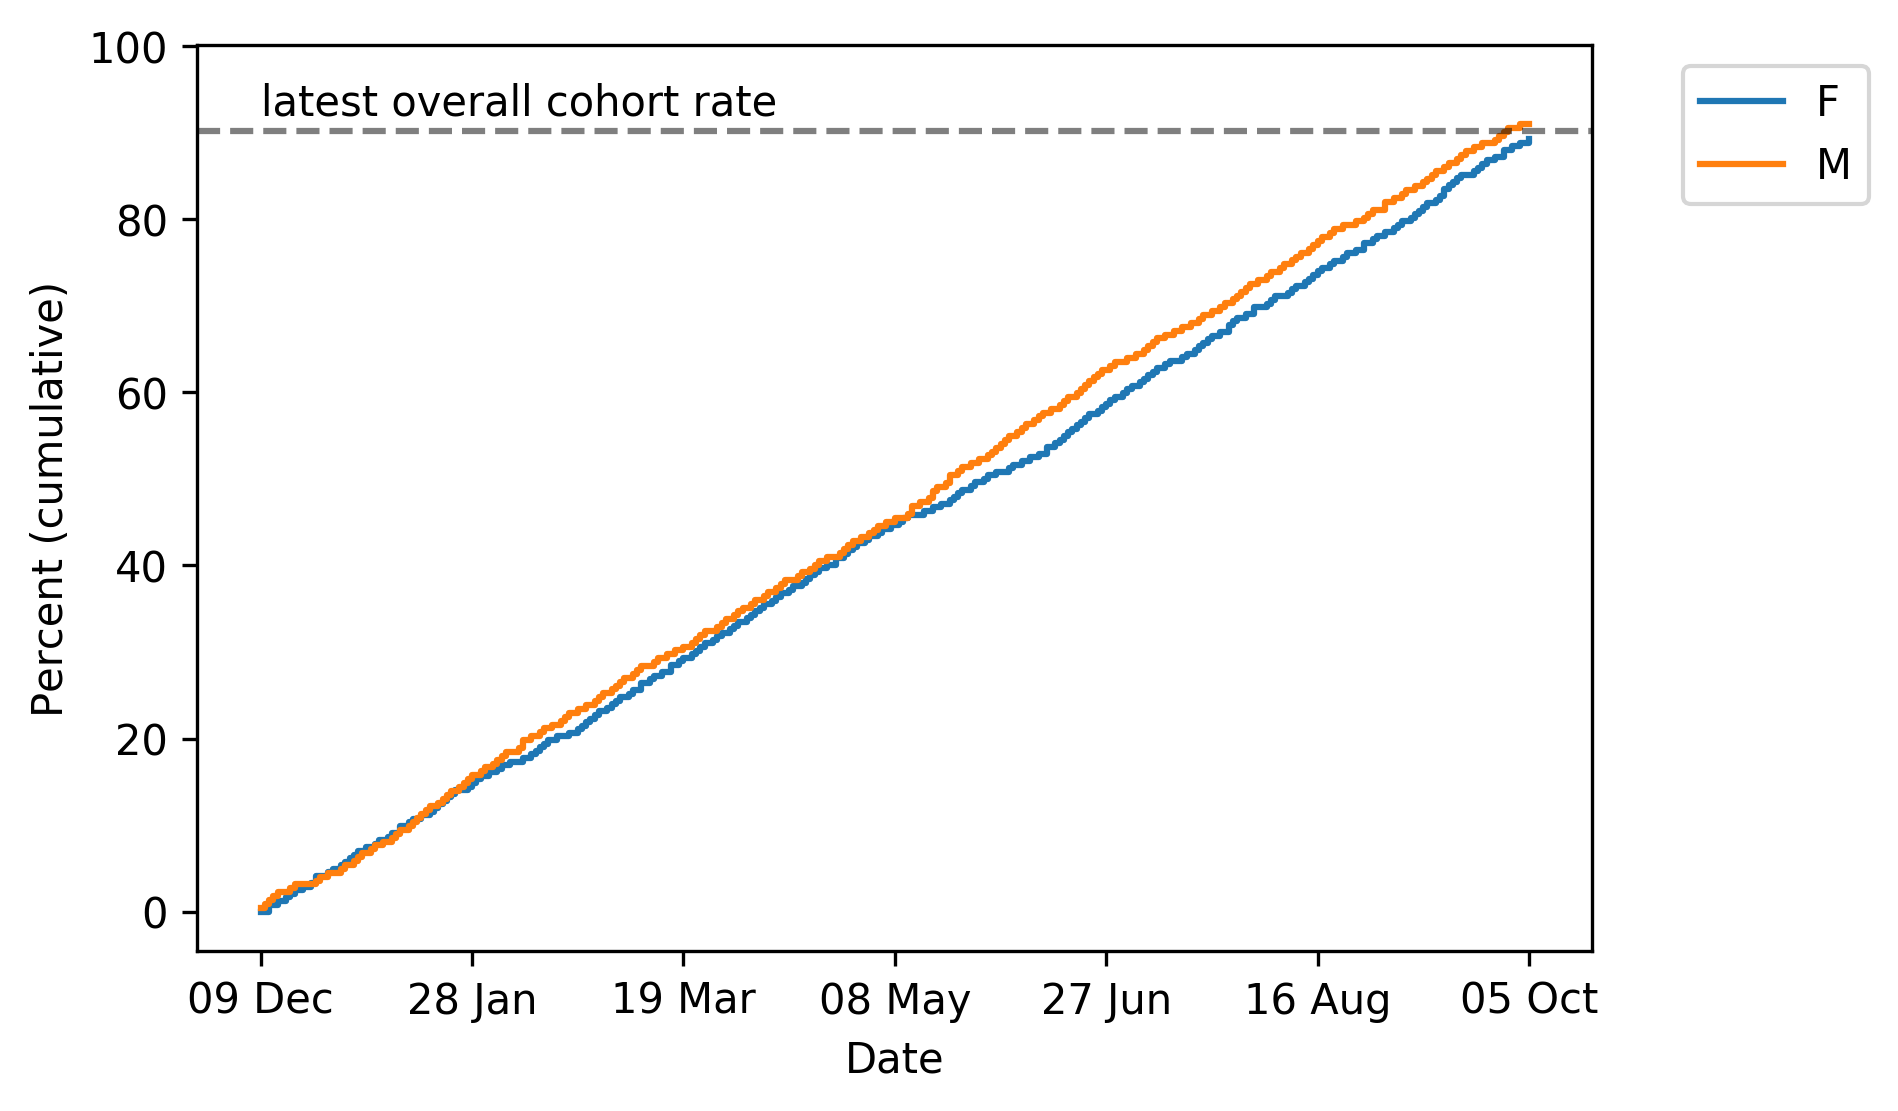

### COVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

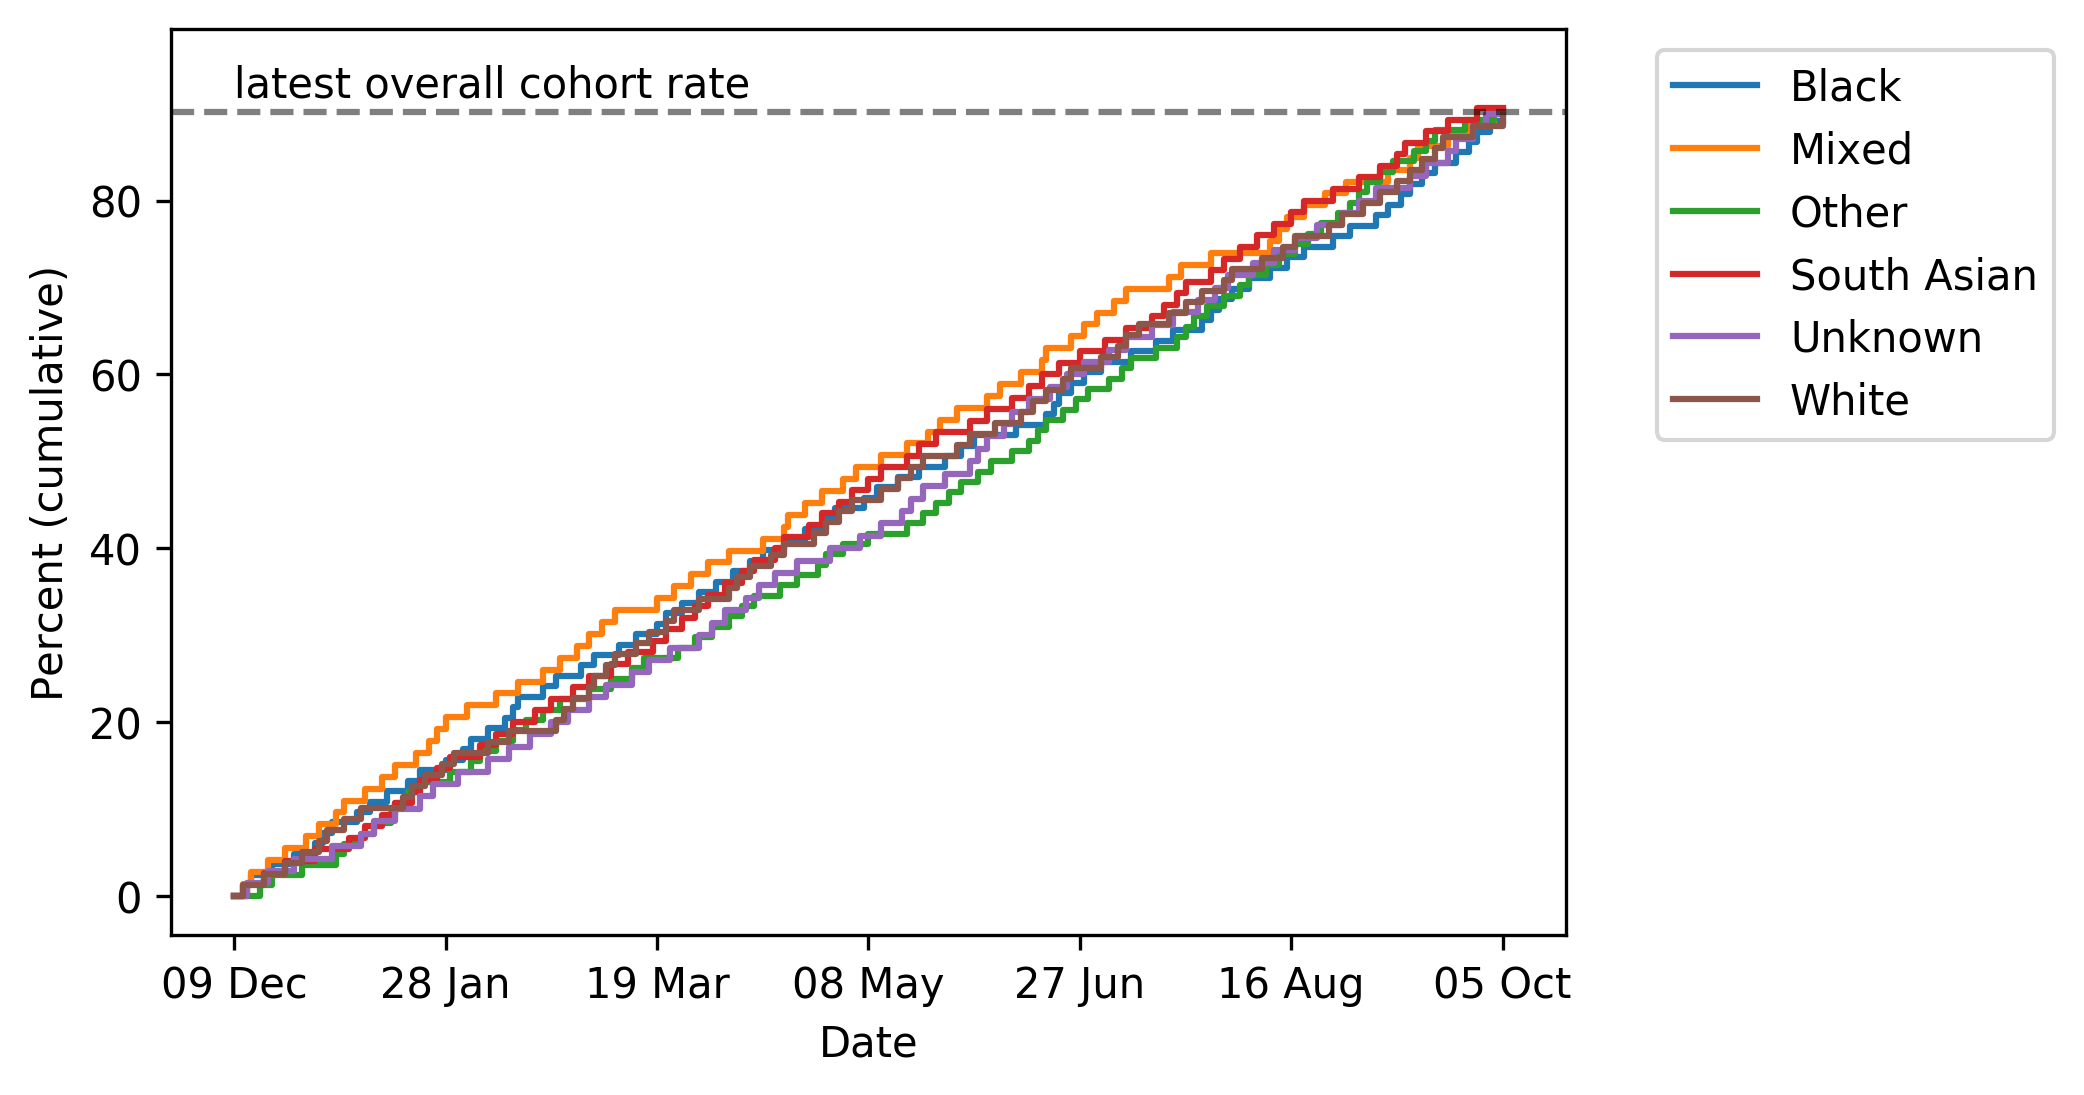

### COVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

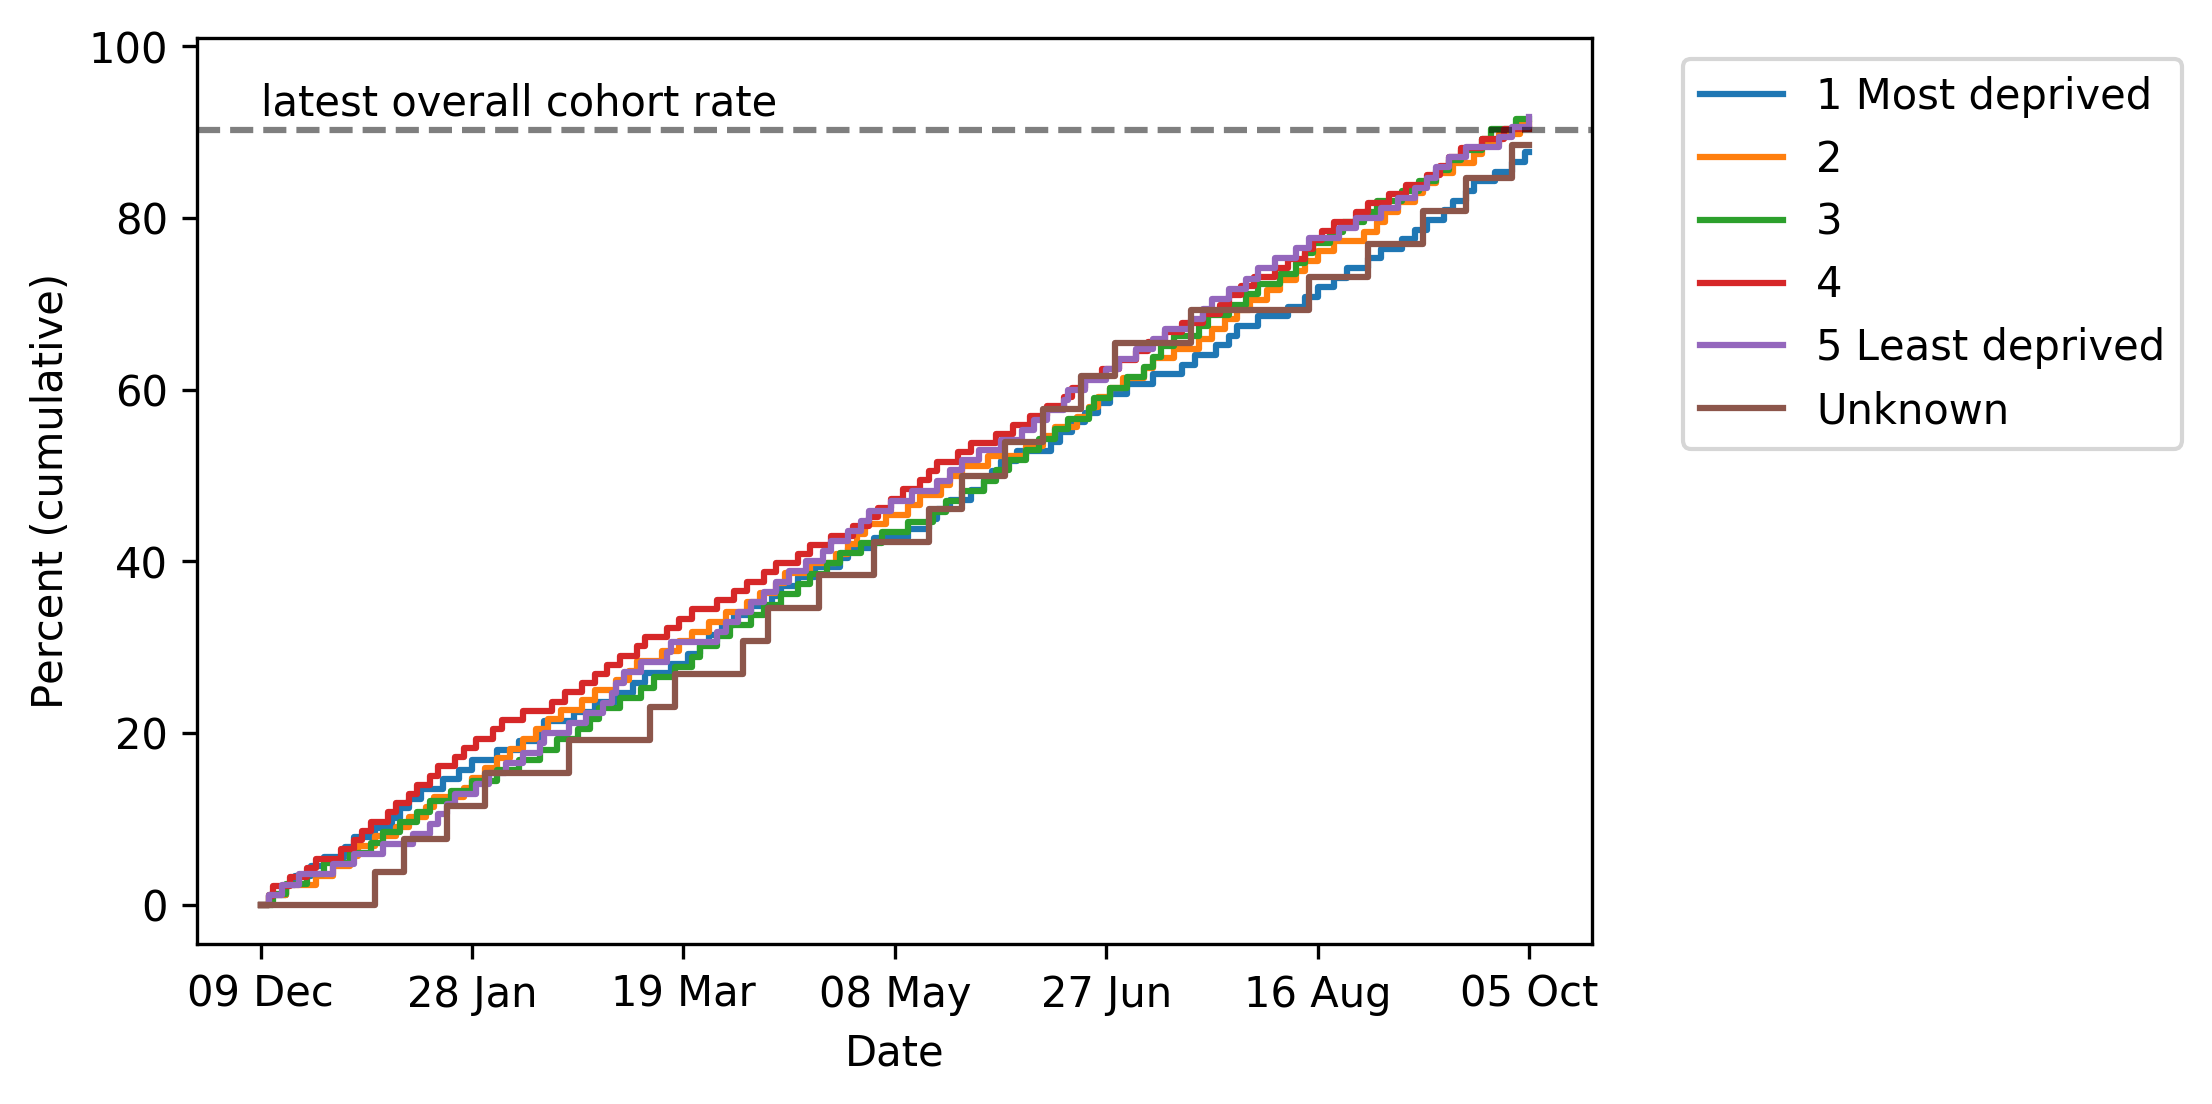

### COVID vaccinations among 55-59 population
 ### by BMI

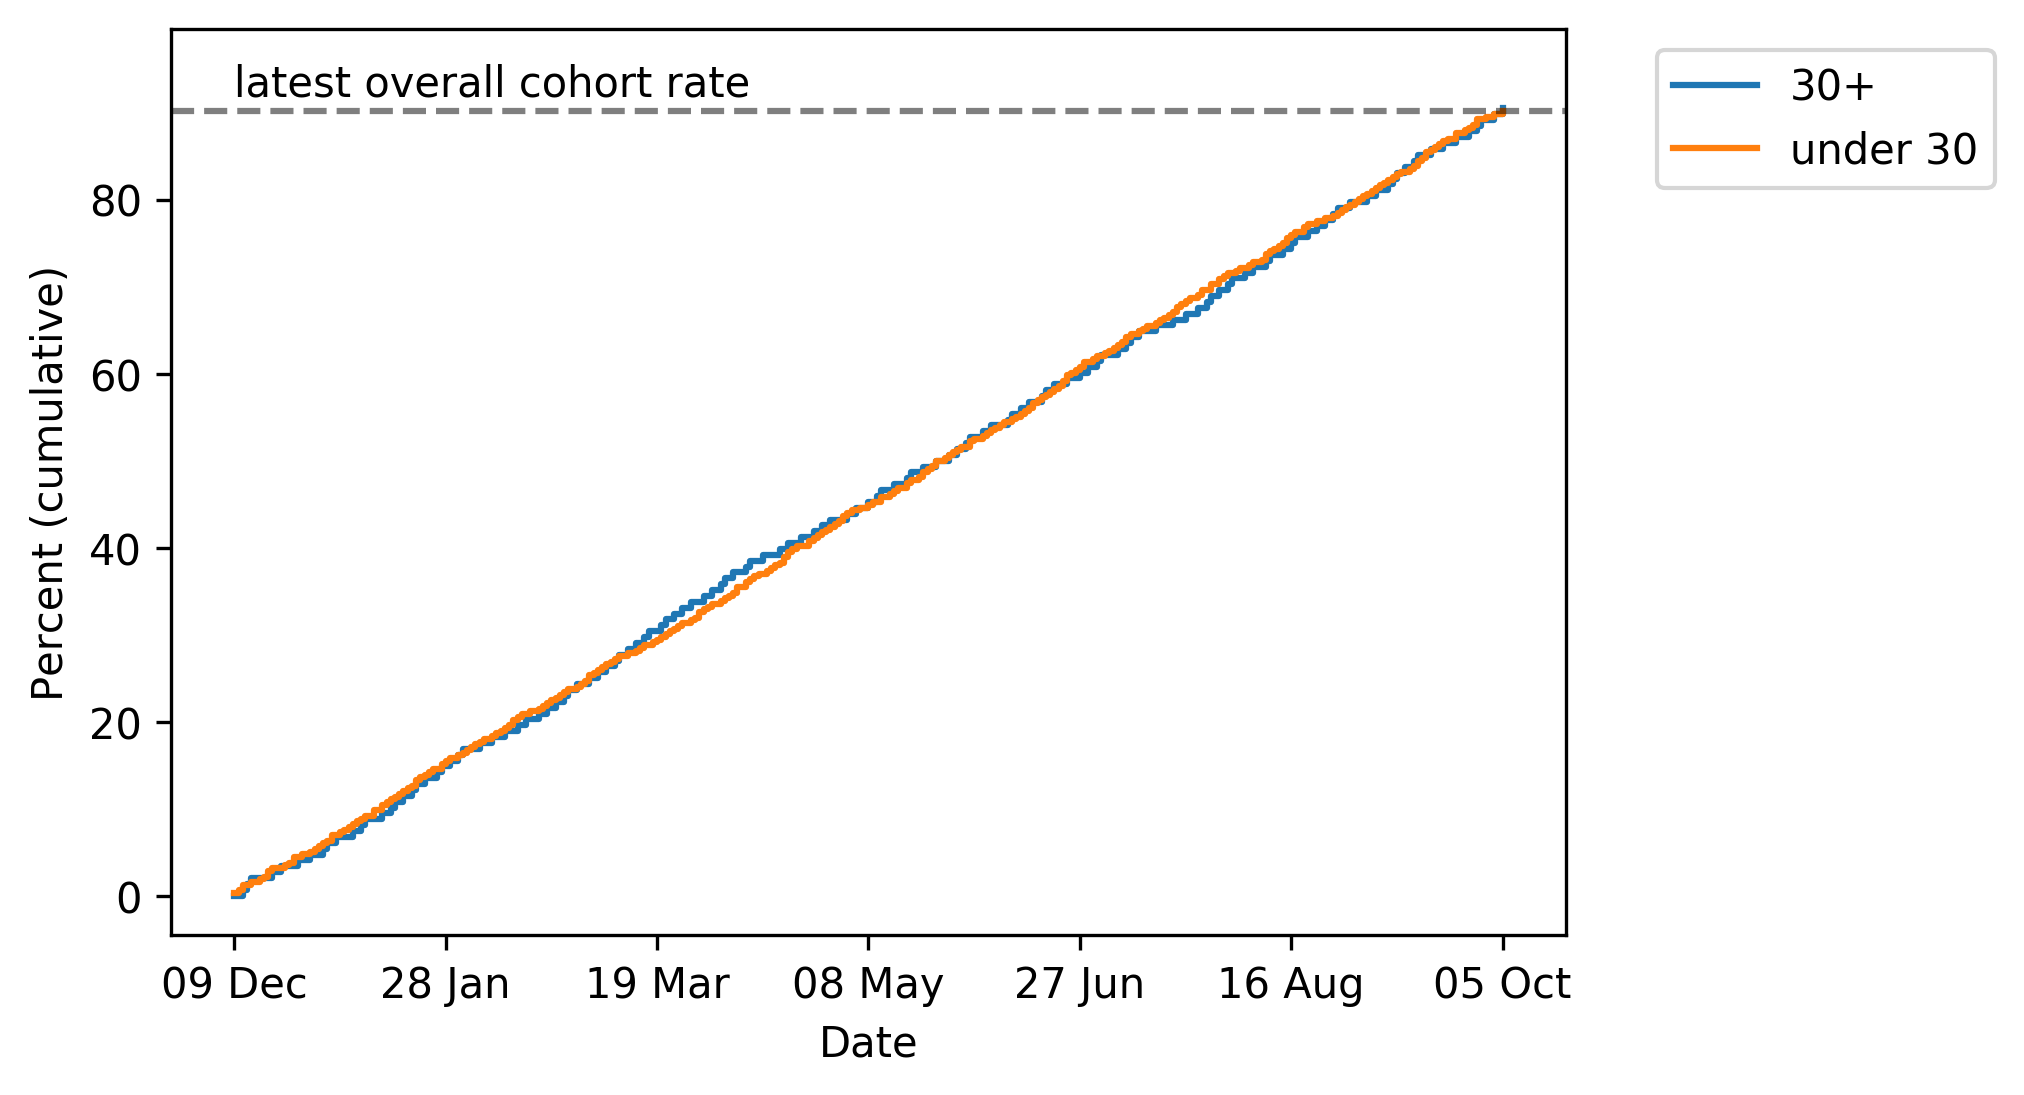

### COVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

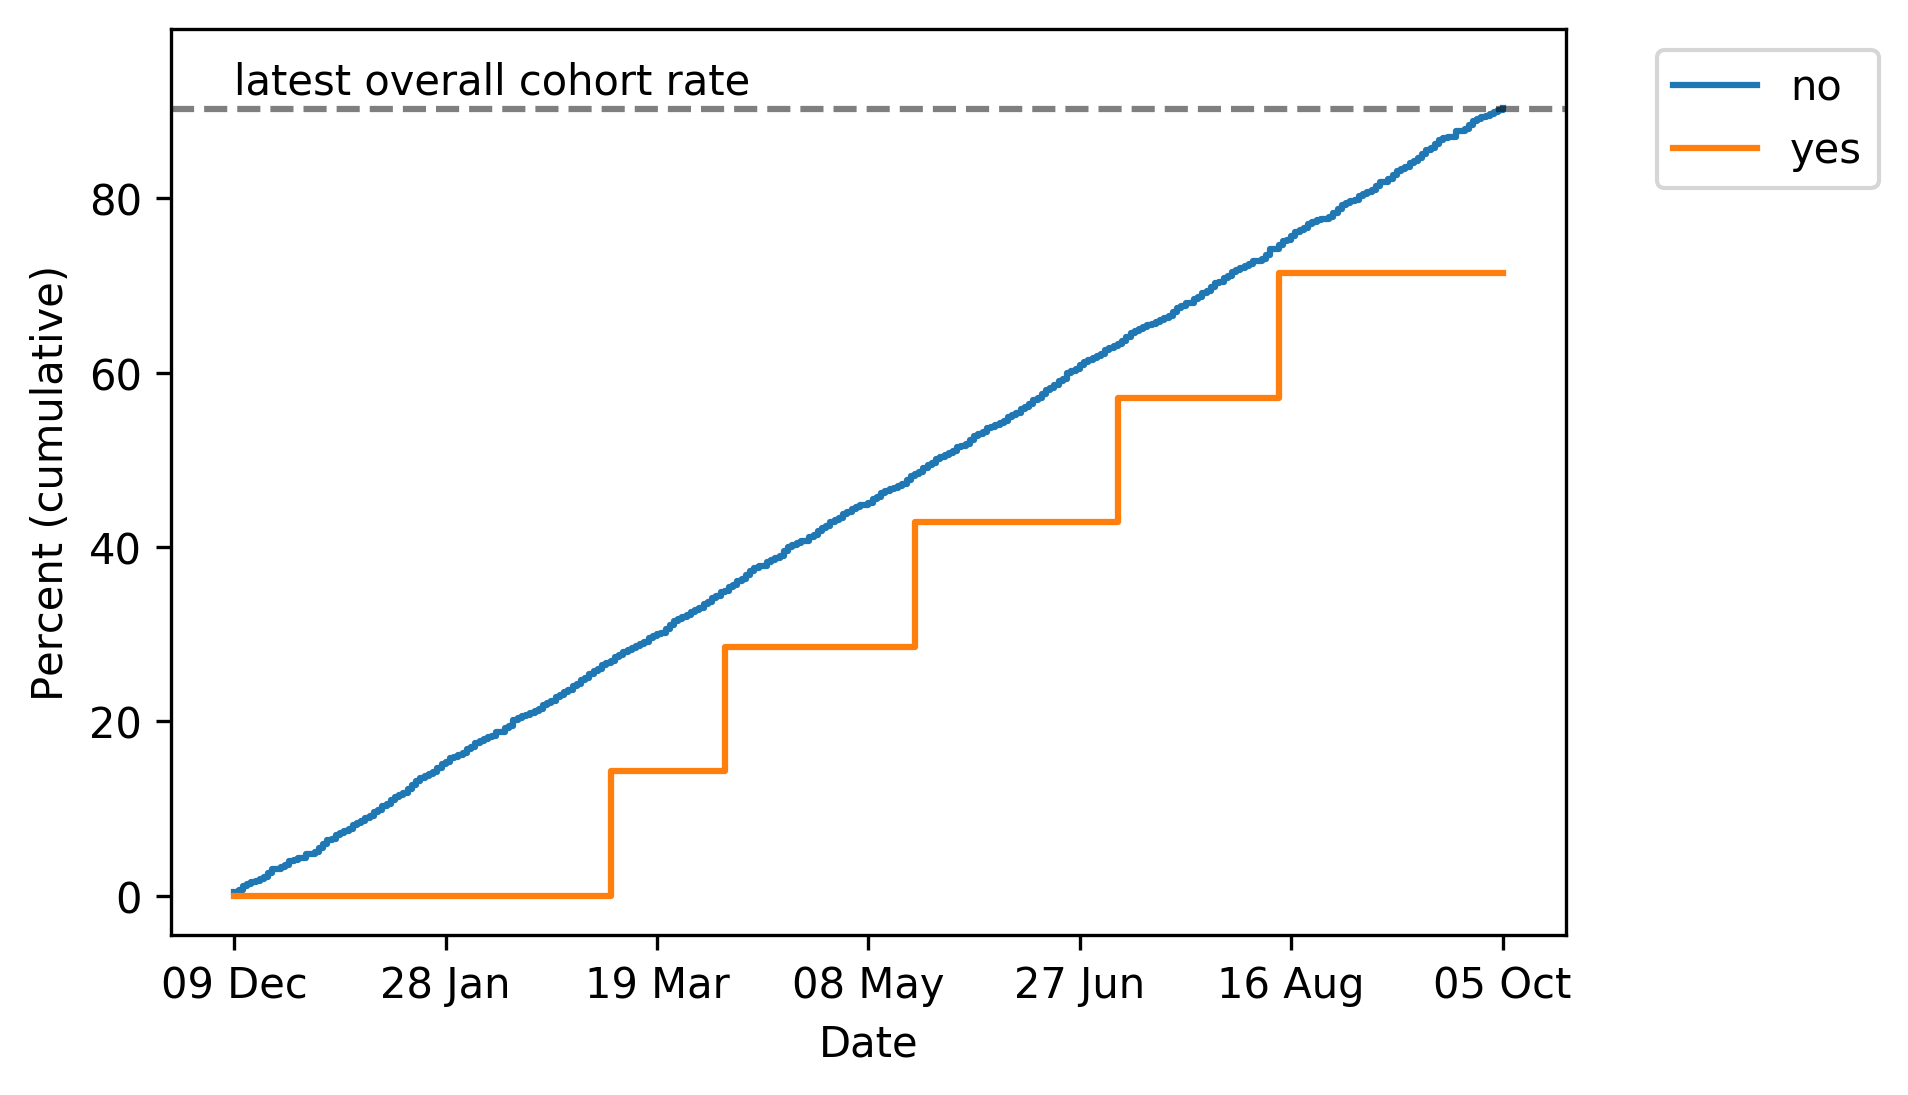

### COVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

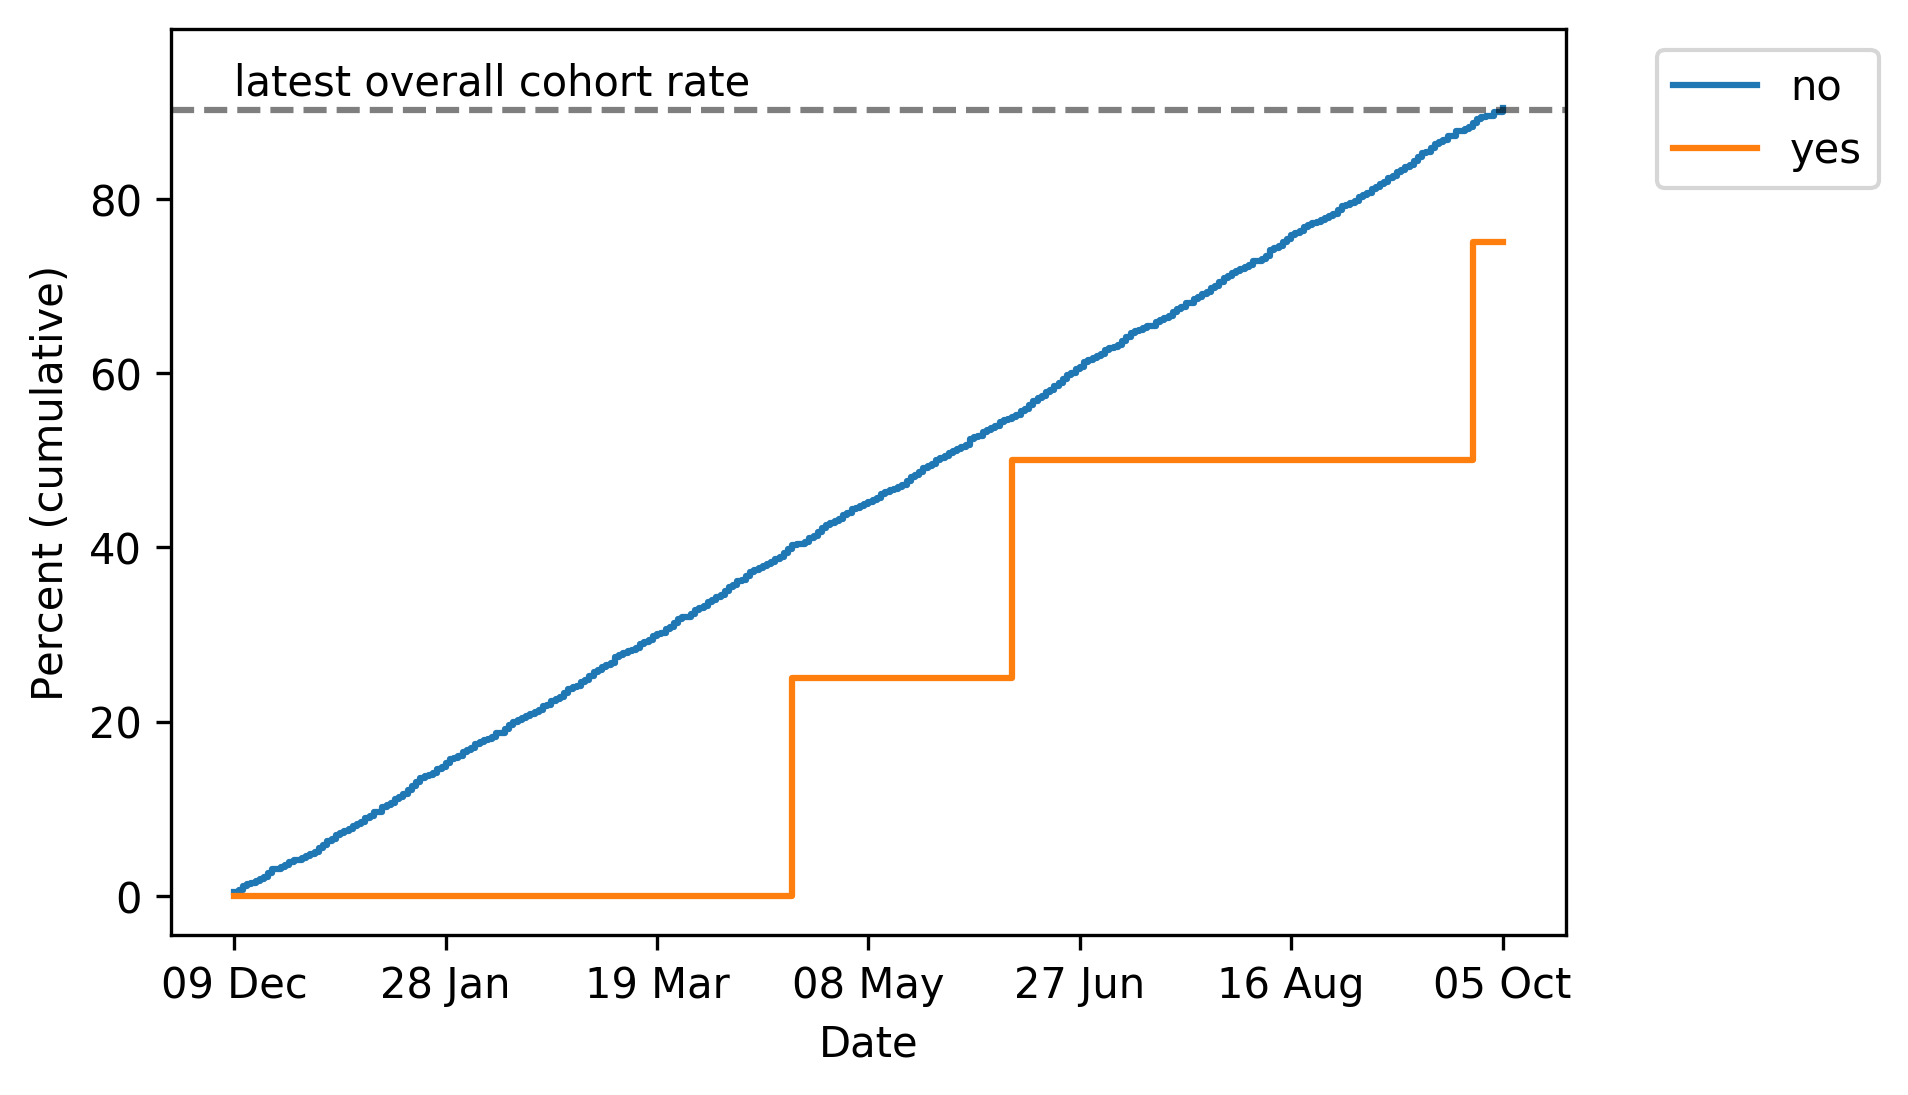

In [9]:
display(Markdown("## 55-59 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="55-59", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 50-54 population according to demographic/clinical features, cumulatively by day. <a name='charts50' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

+

## 50-54 population

### COVID vaccinations among 50-54 population
 ### by Sex

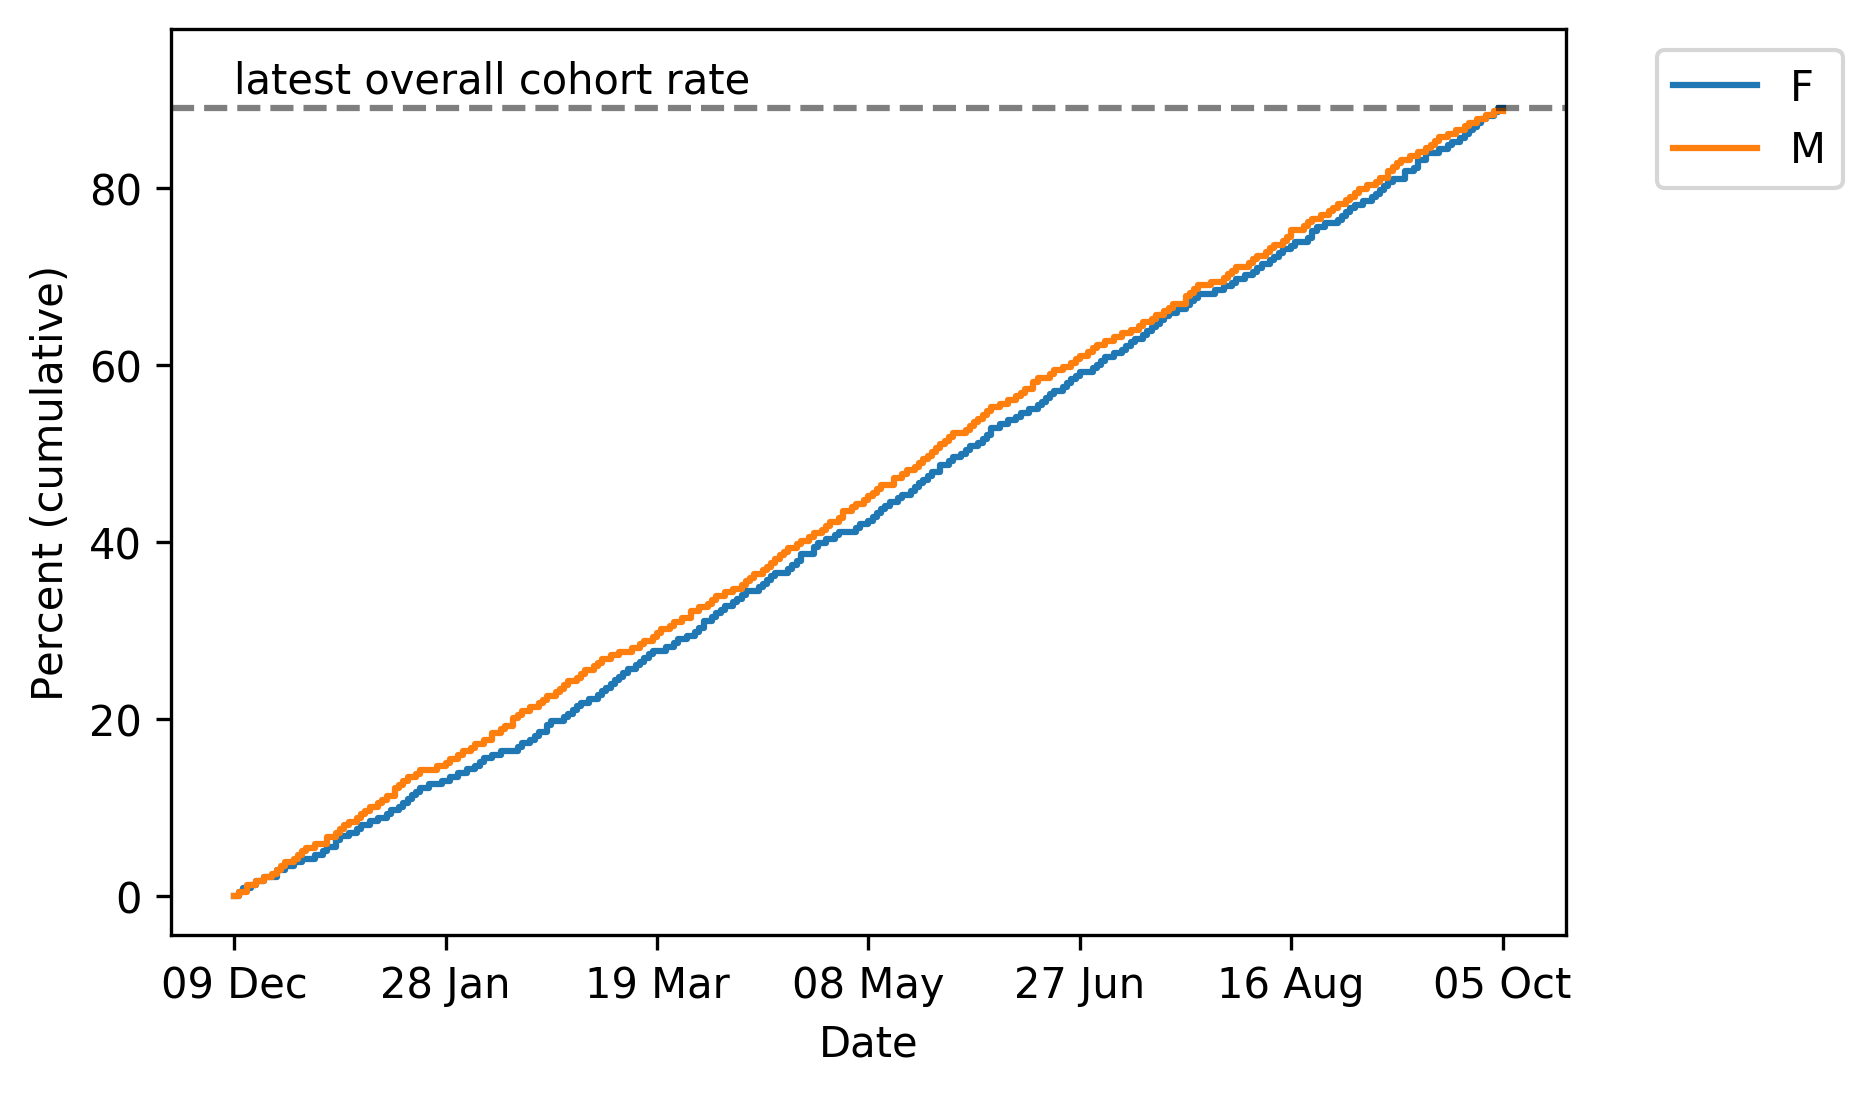

### COVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

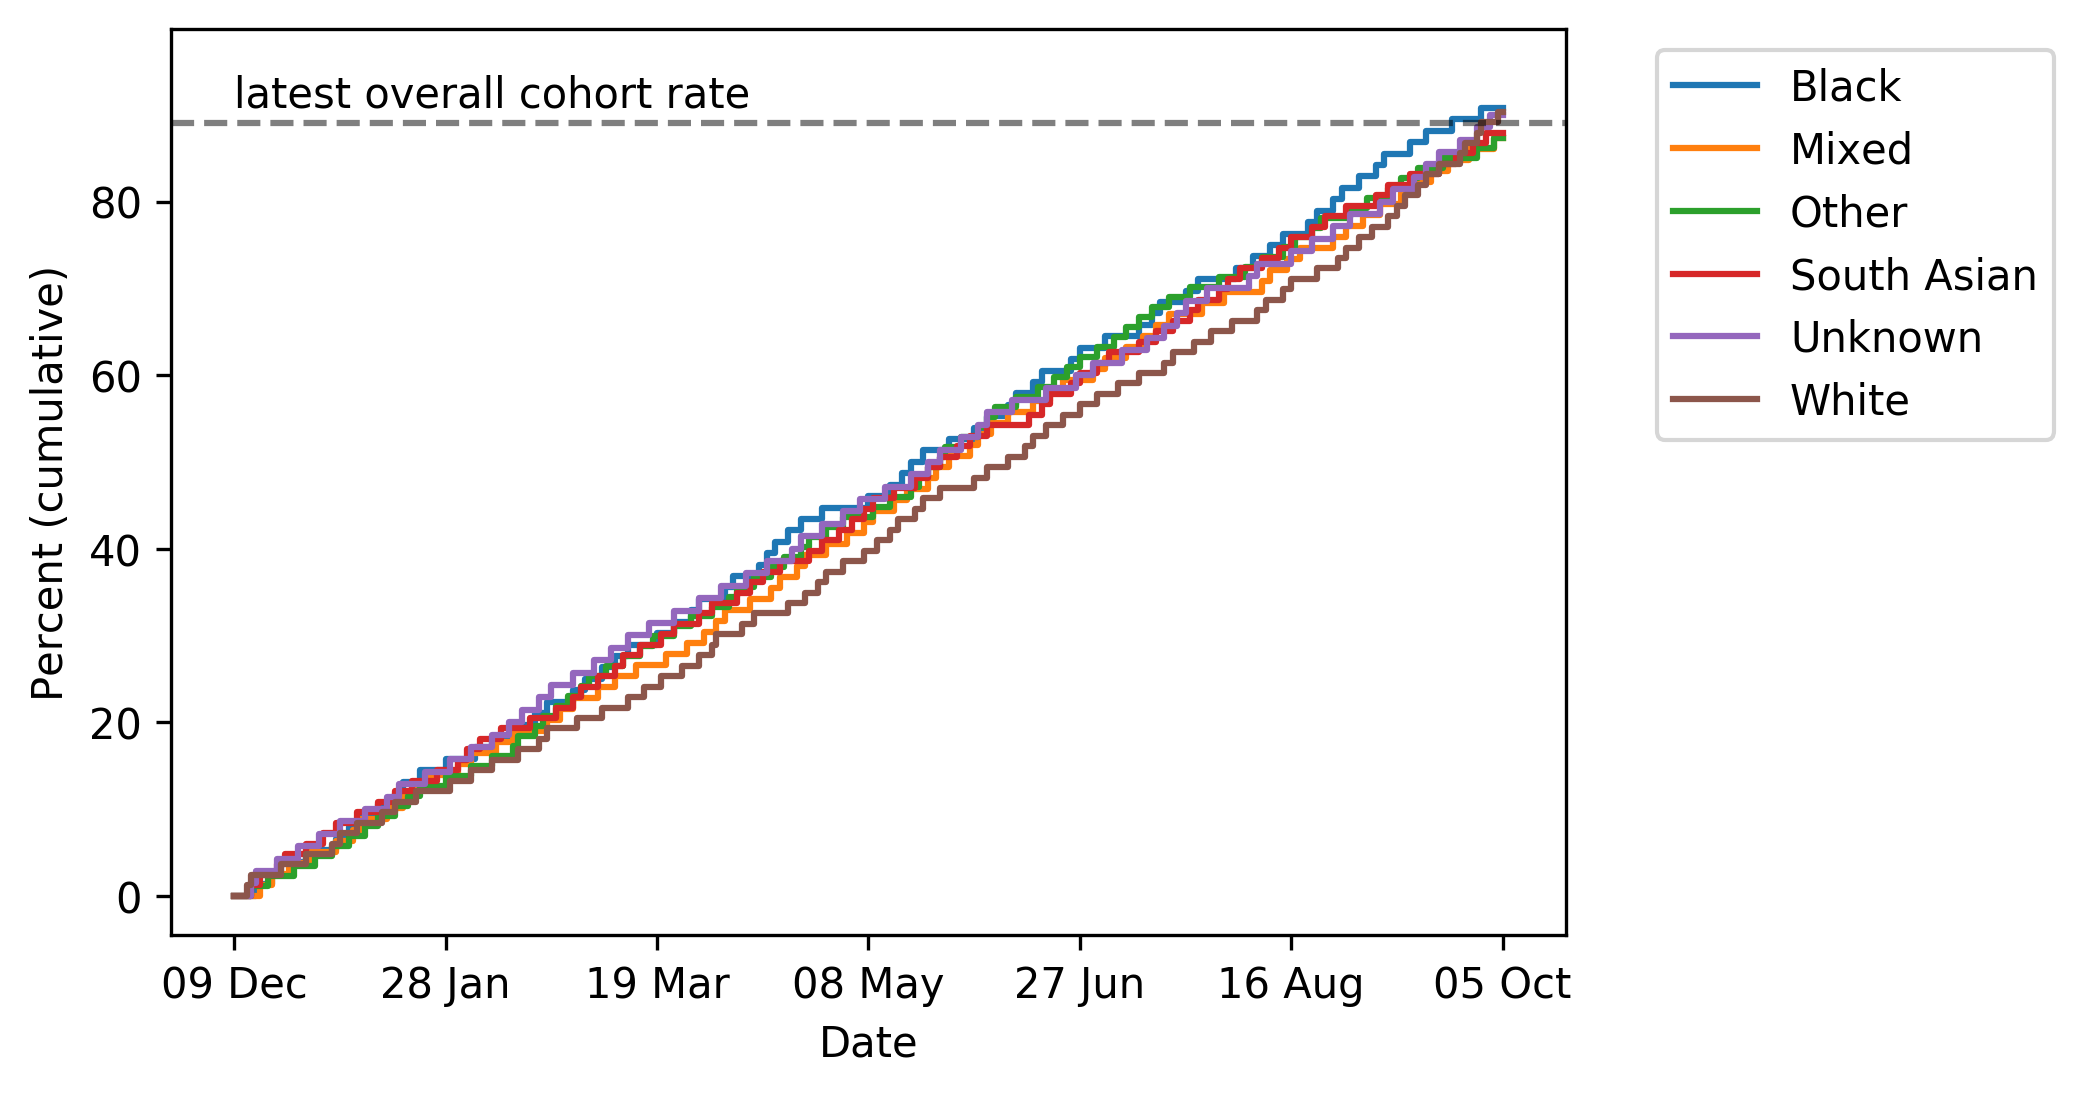

### COVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

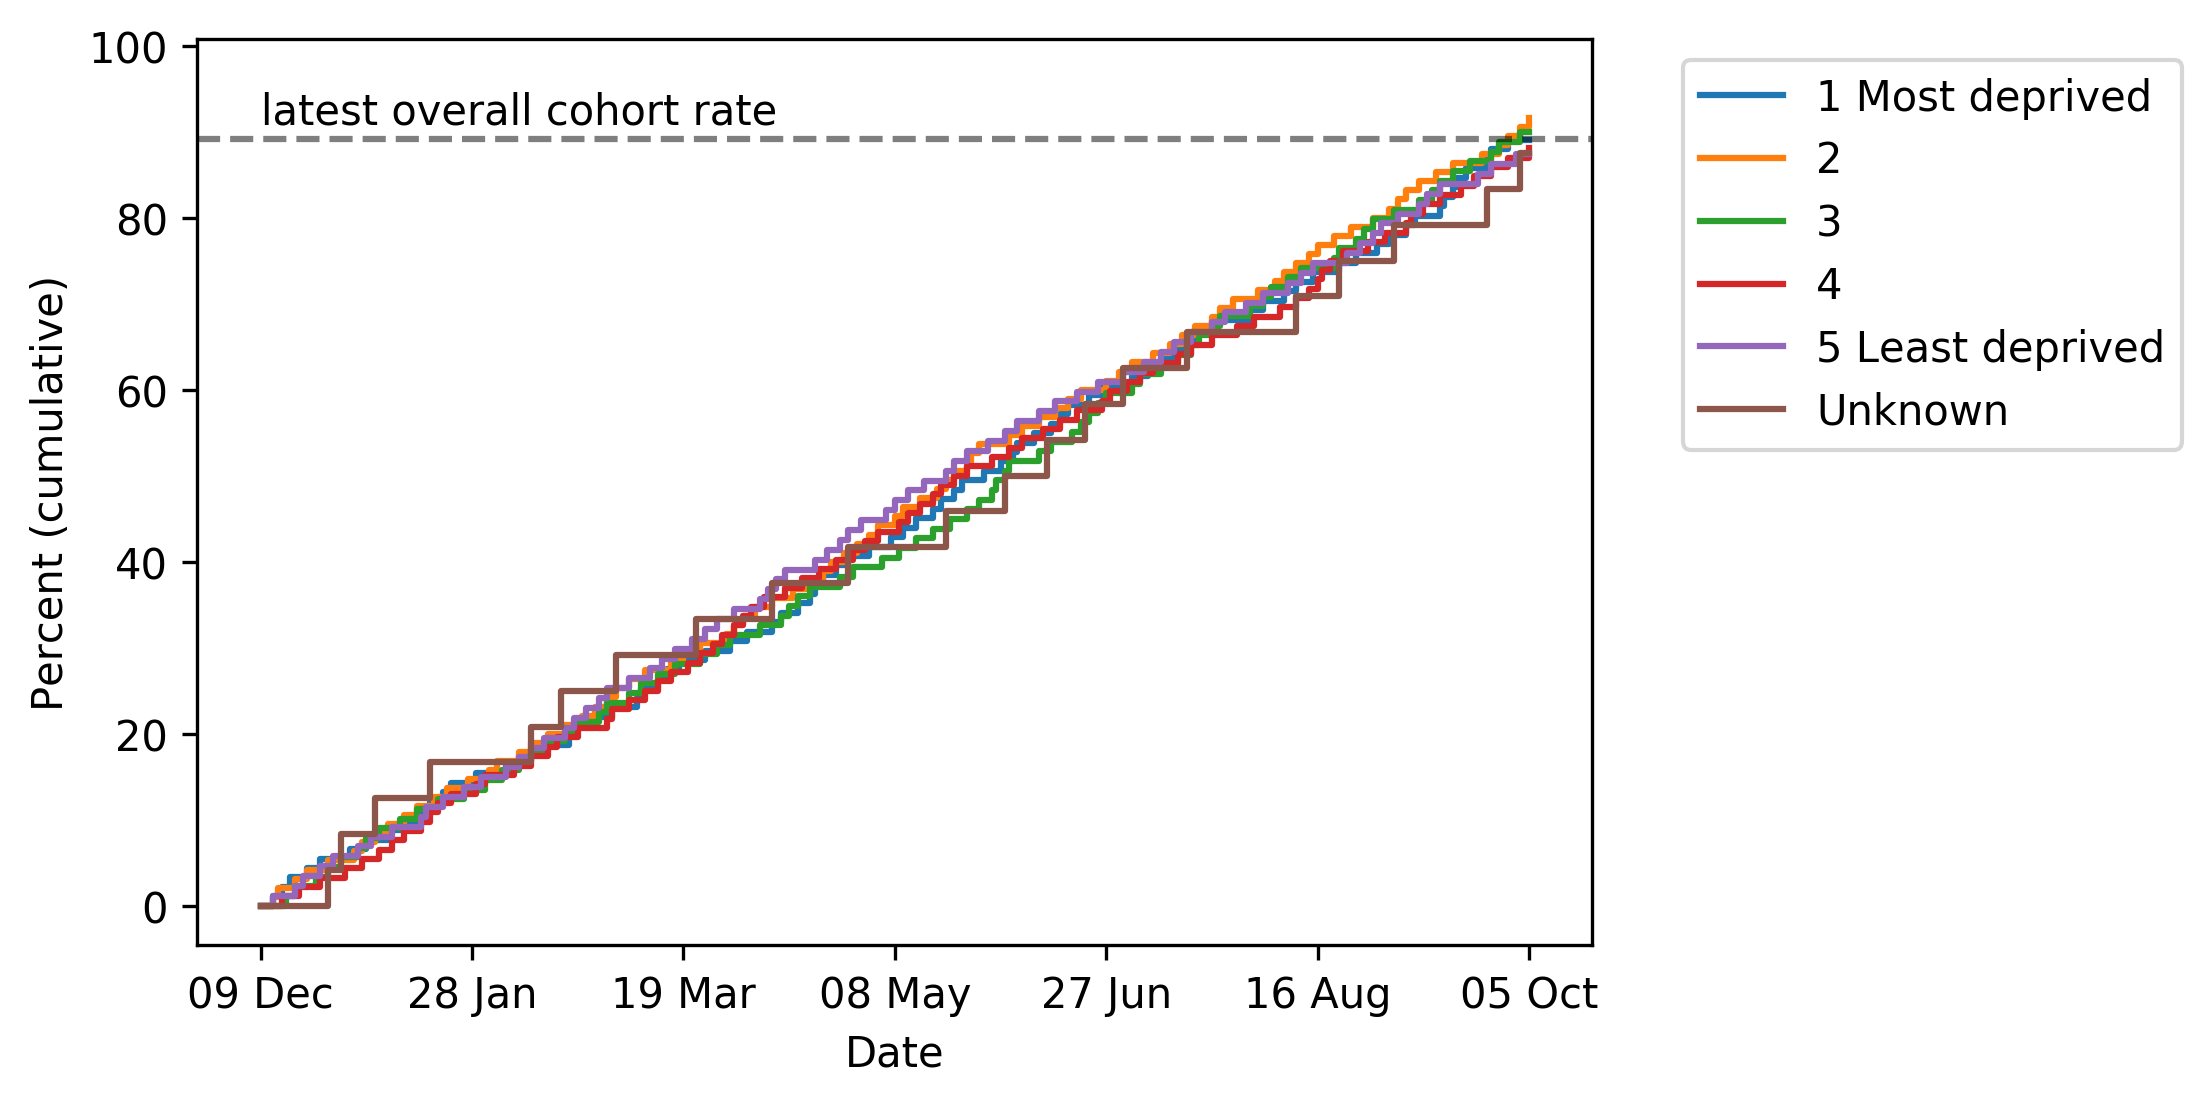

### COVID vaccinations among 50-54 population
 ### by BMI

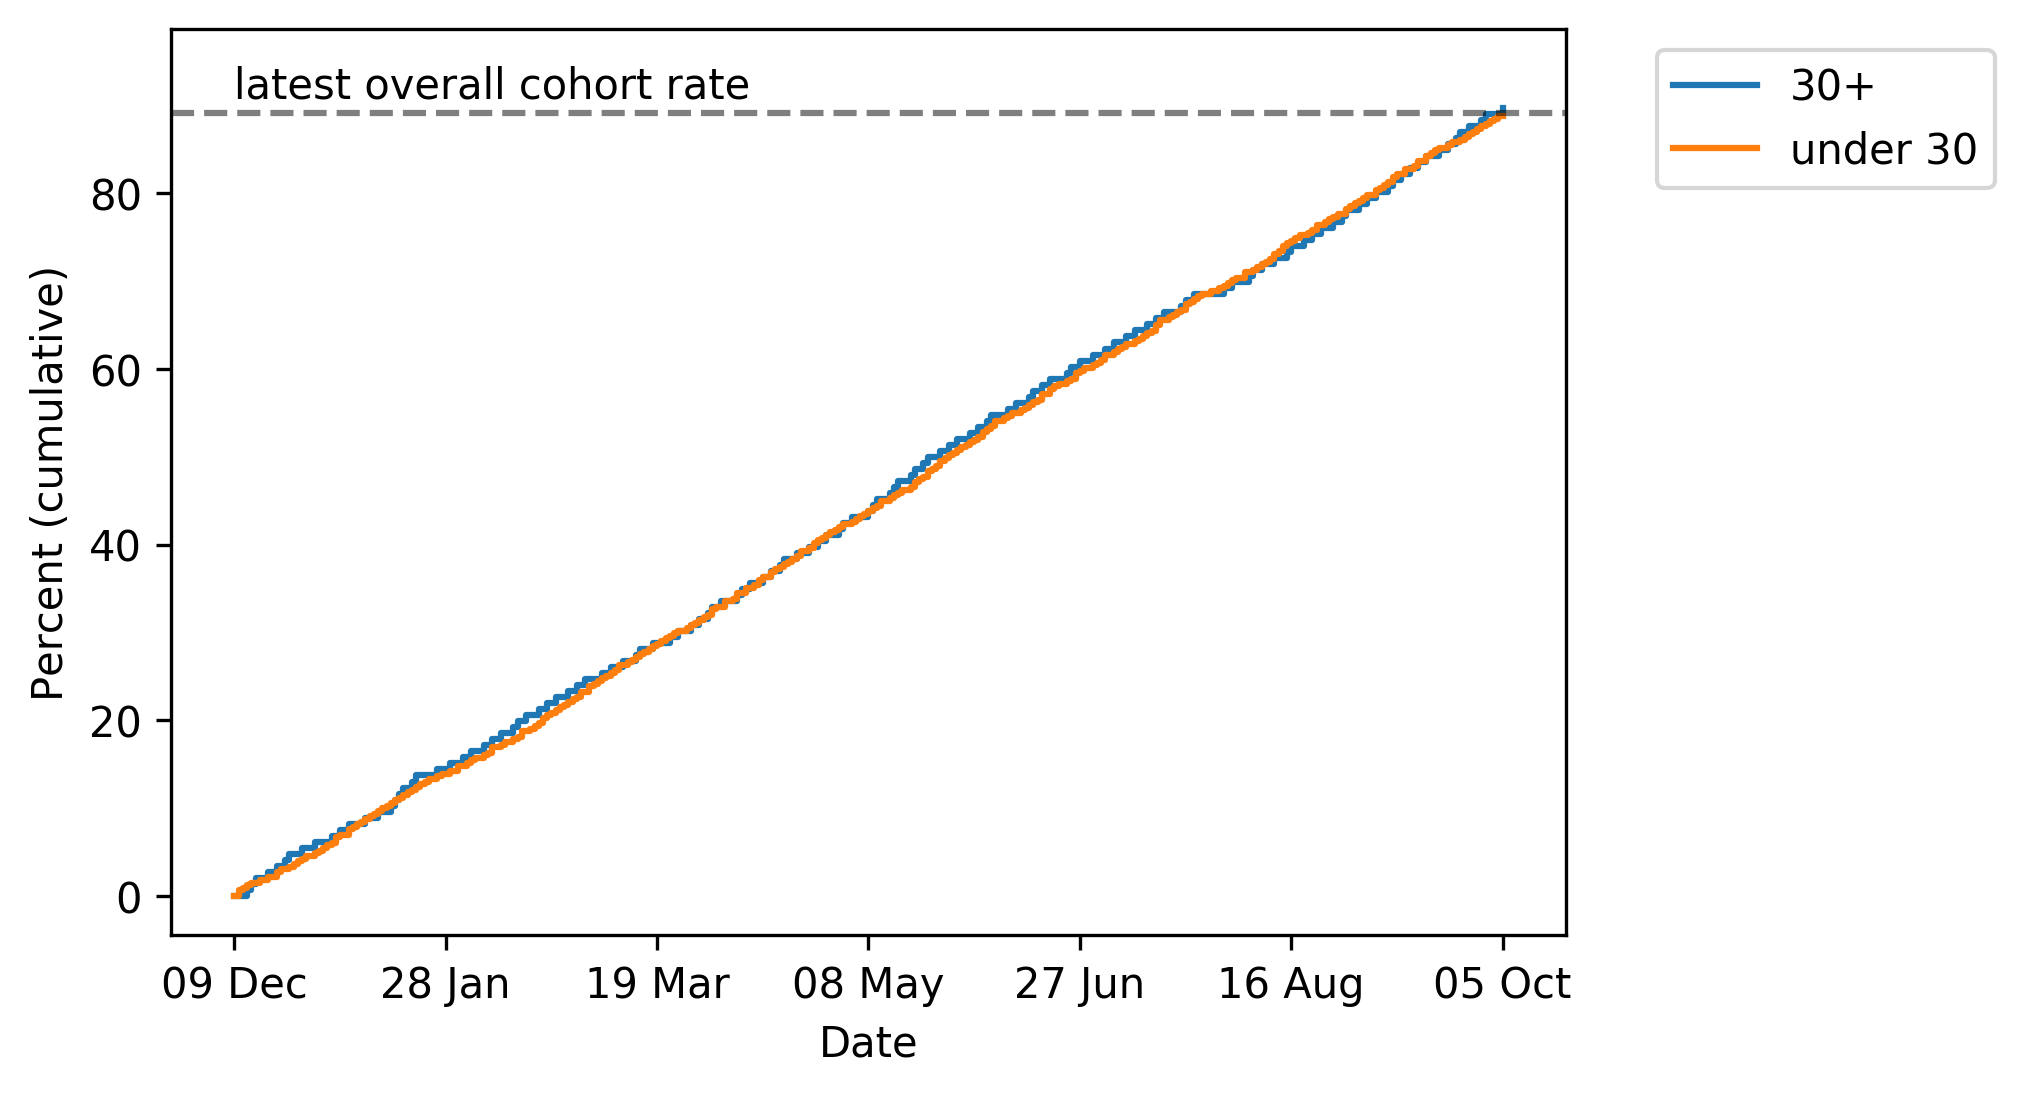

### COVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

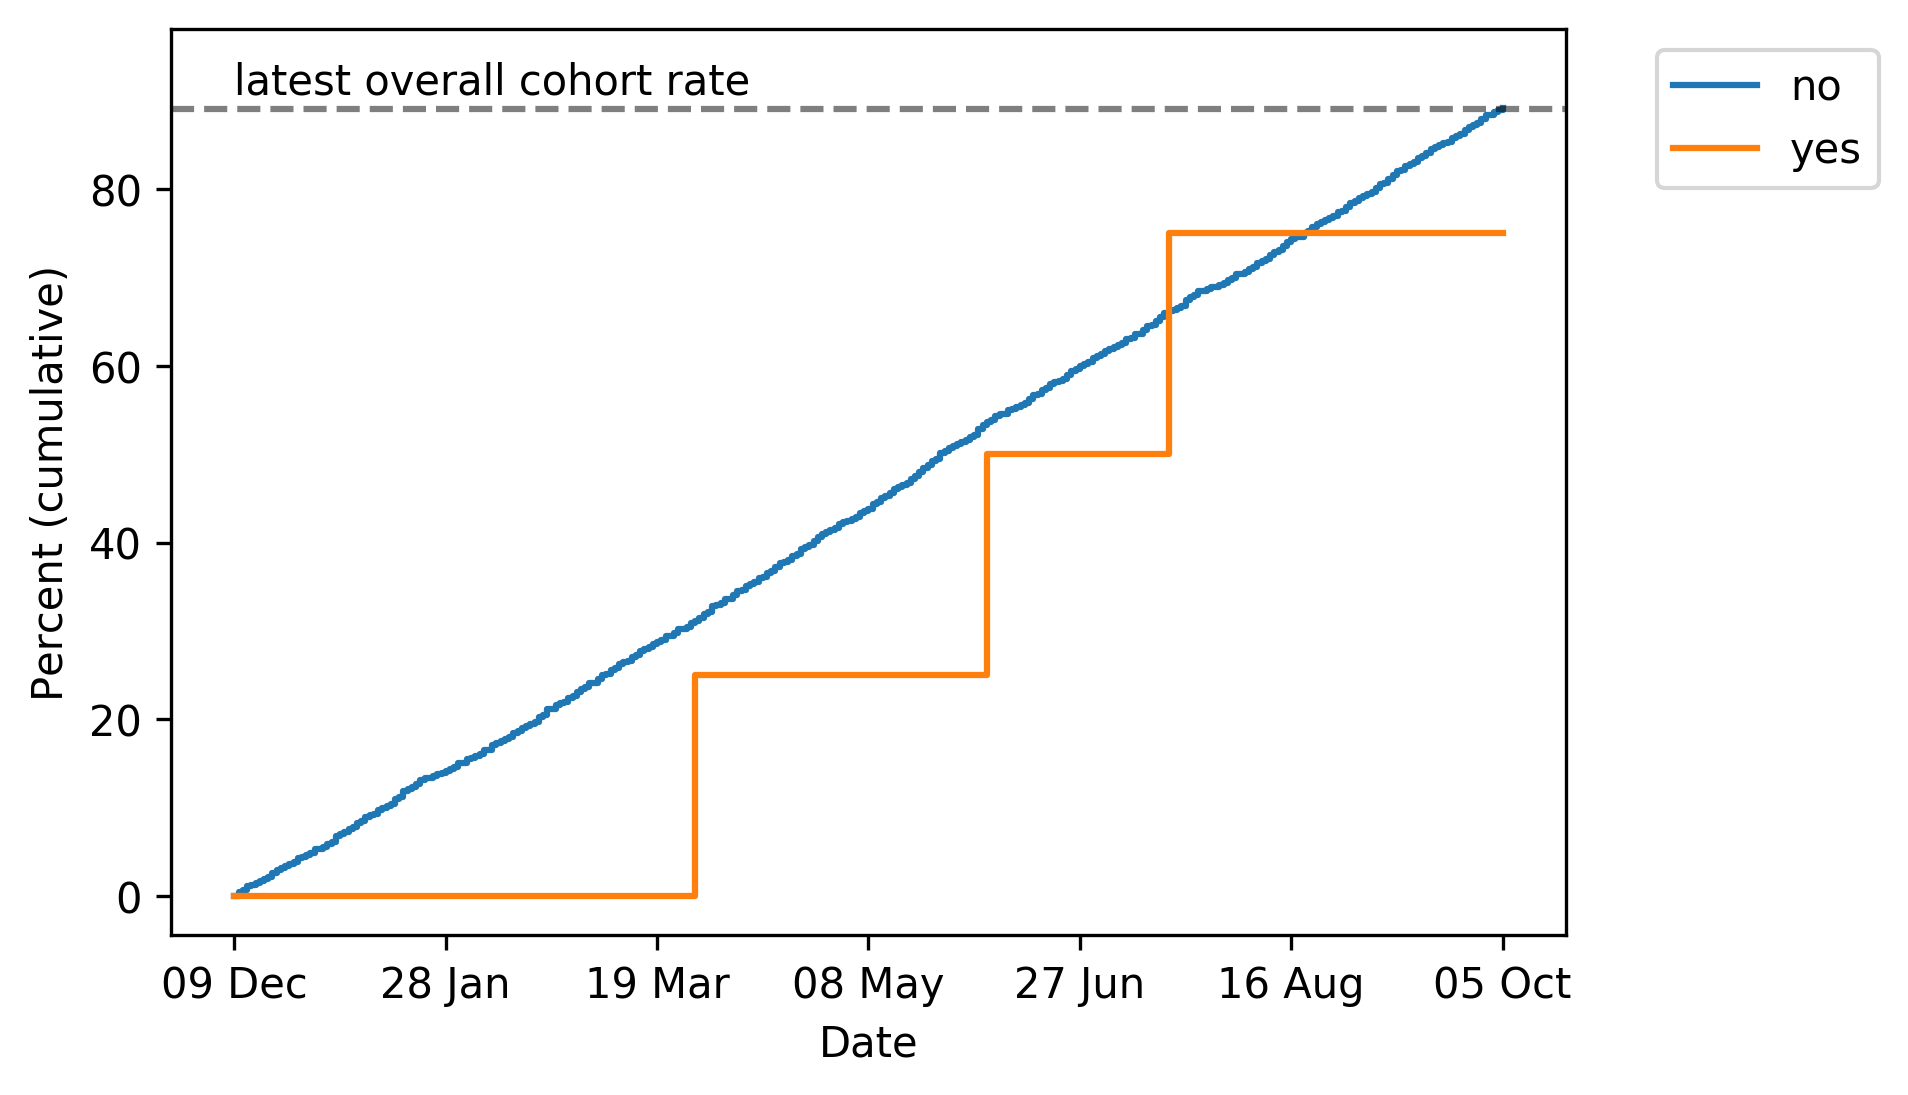

### COVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

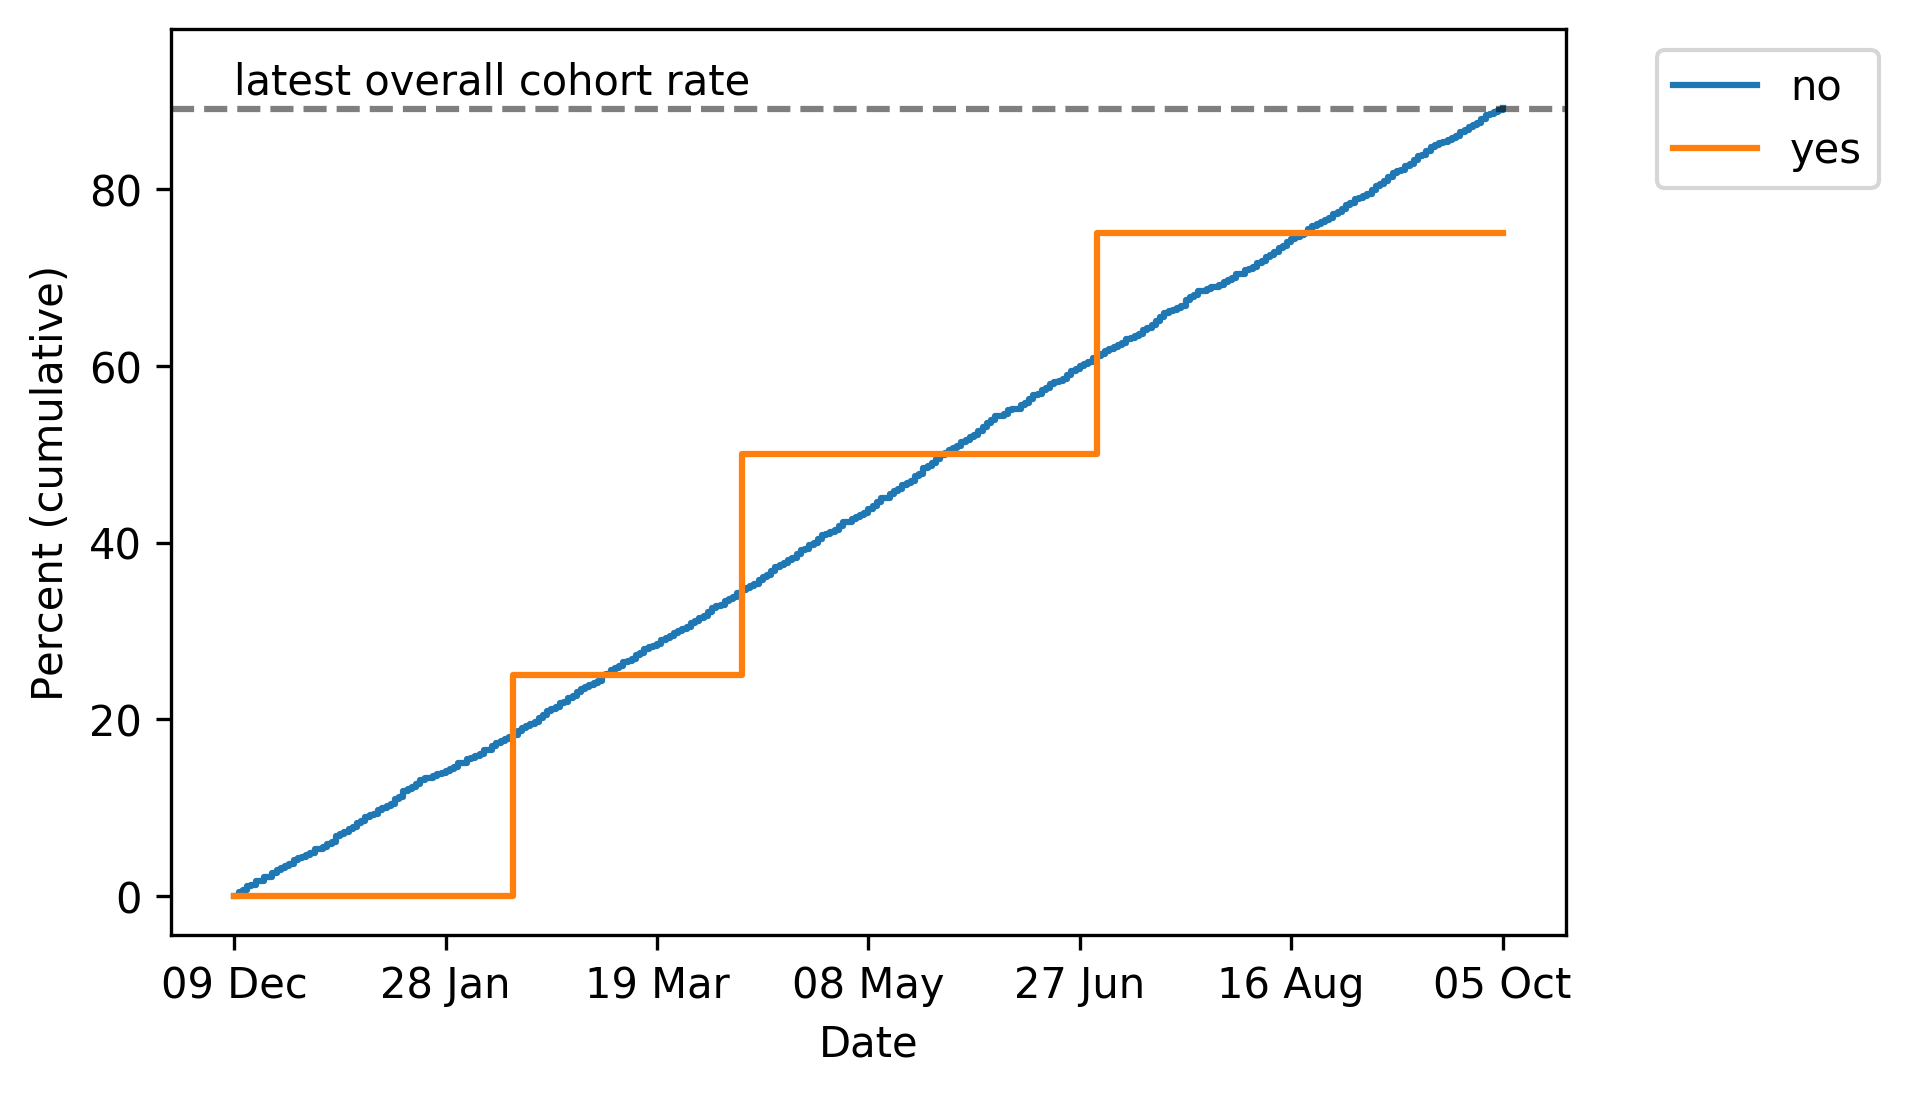

In [10]:
display(Markdown("## 50-54 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="50-54", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 40-49 population according to demographic/clinical features, cumulatively by day. <a name='charts40' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 40-49 population

### COVID vaccinations among 40-49 population
 ### by Sex

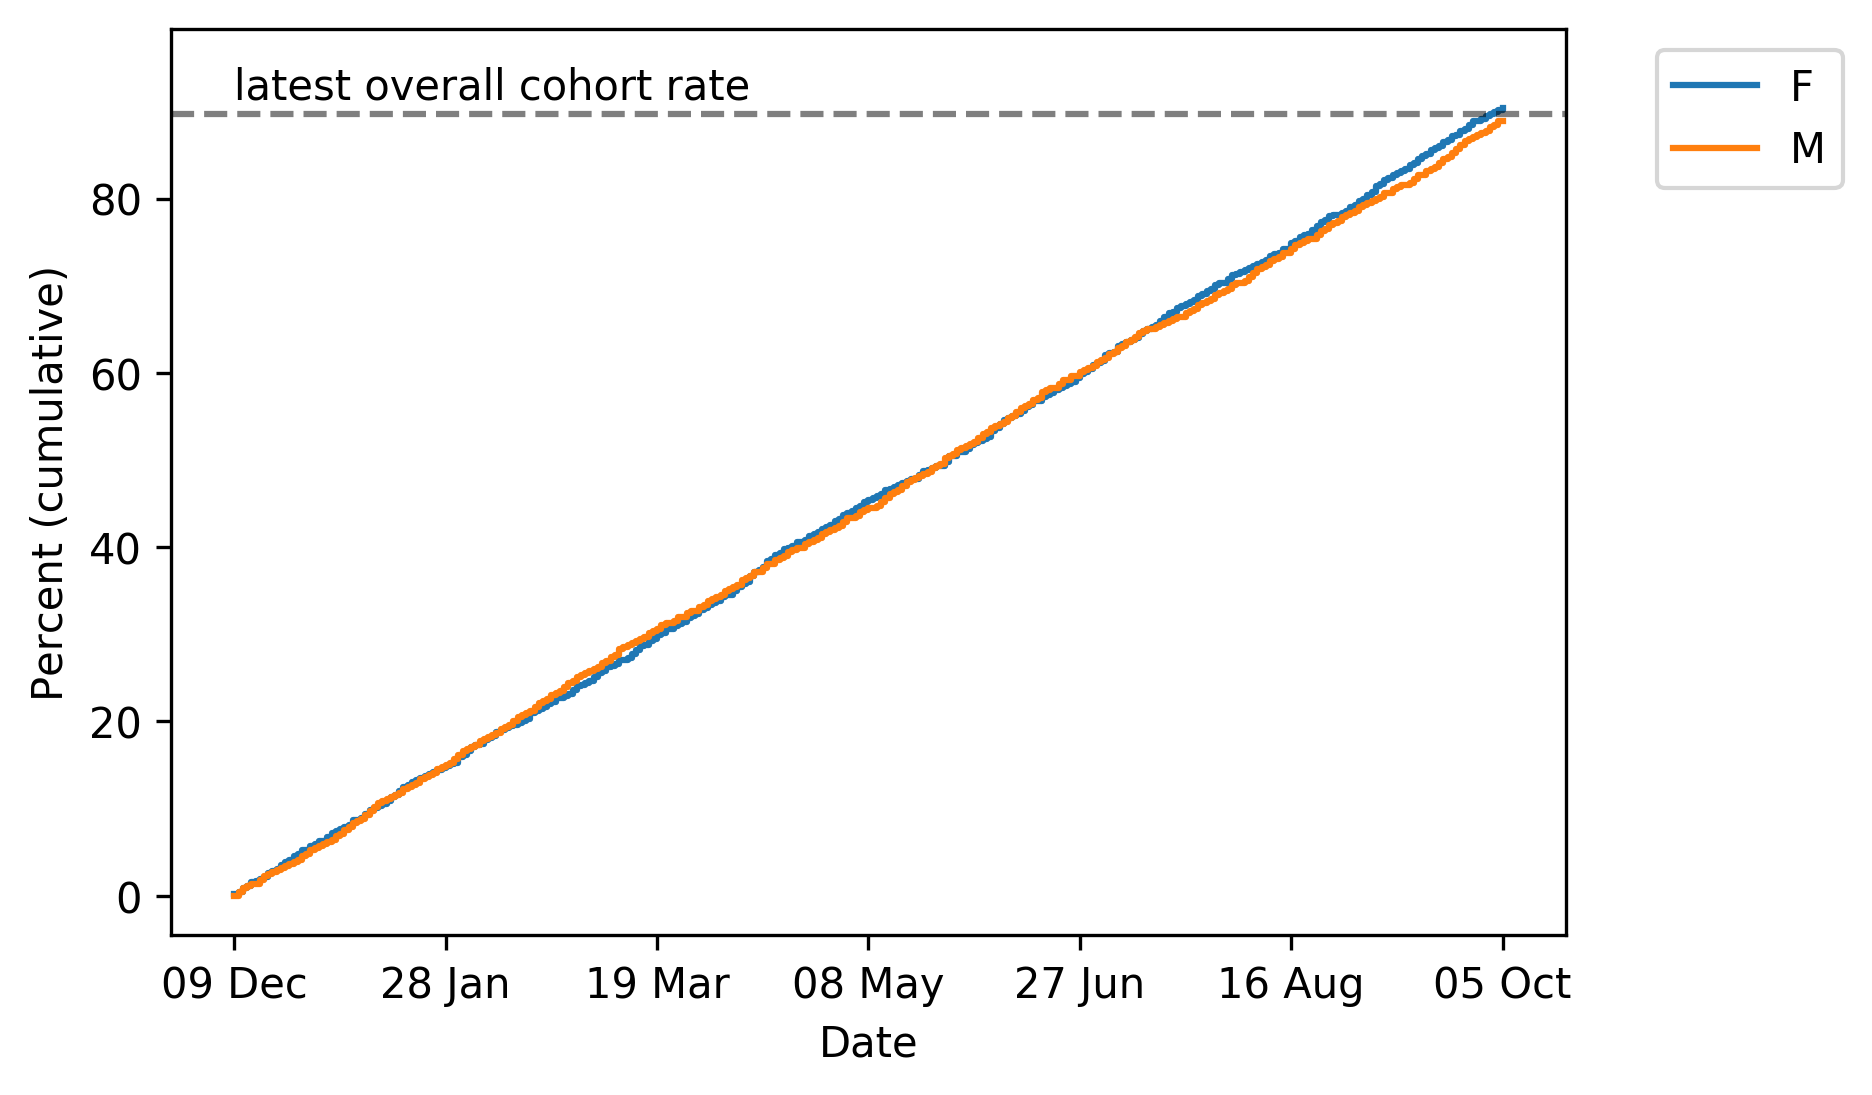

### COVID vaccinations among 40-49 population
 ### by Ethnicity (broad categories)

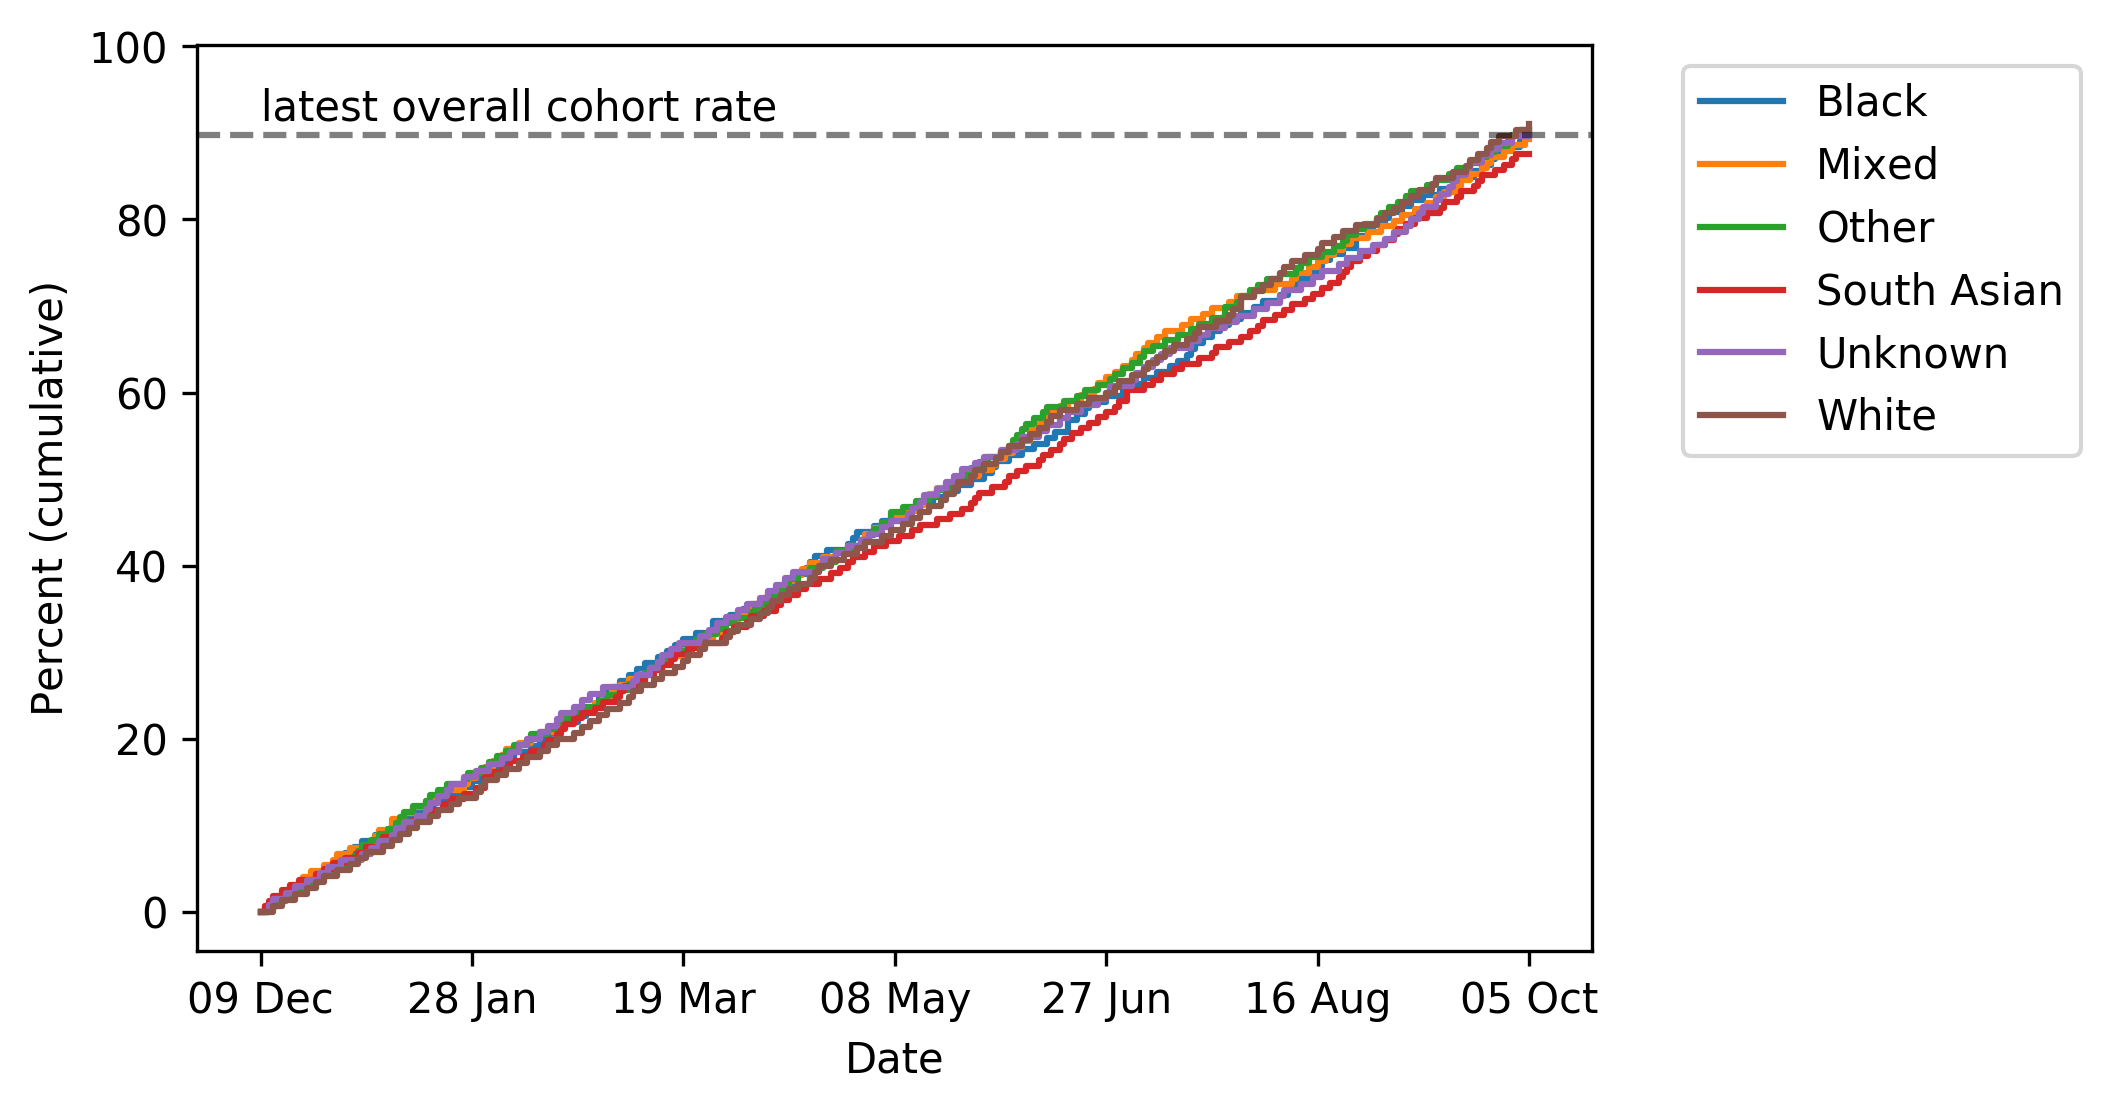

### COVID vaccinations among 40-49 population
 ### by Index of Multiple Deprivation (quintiles)

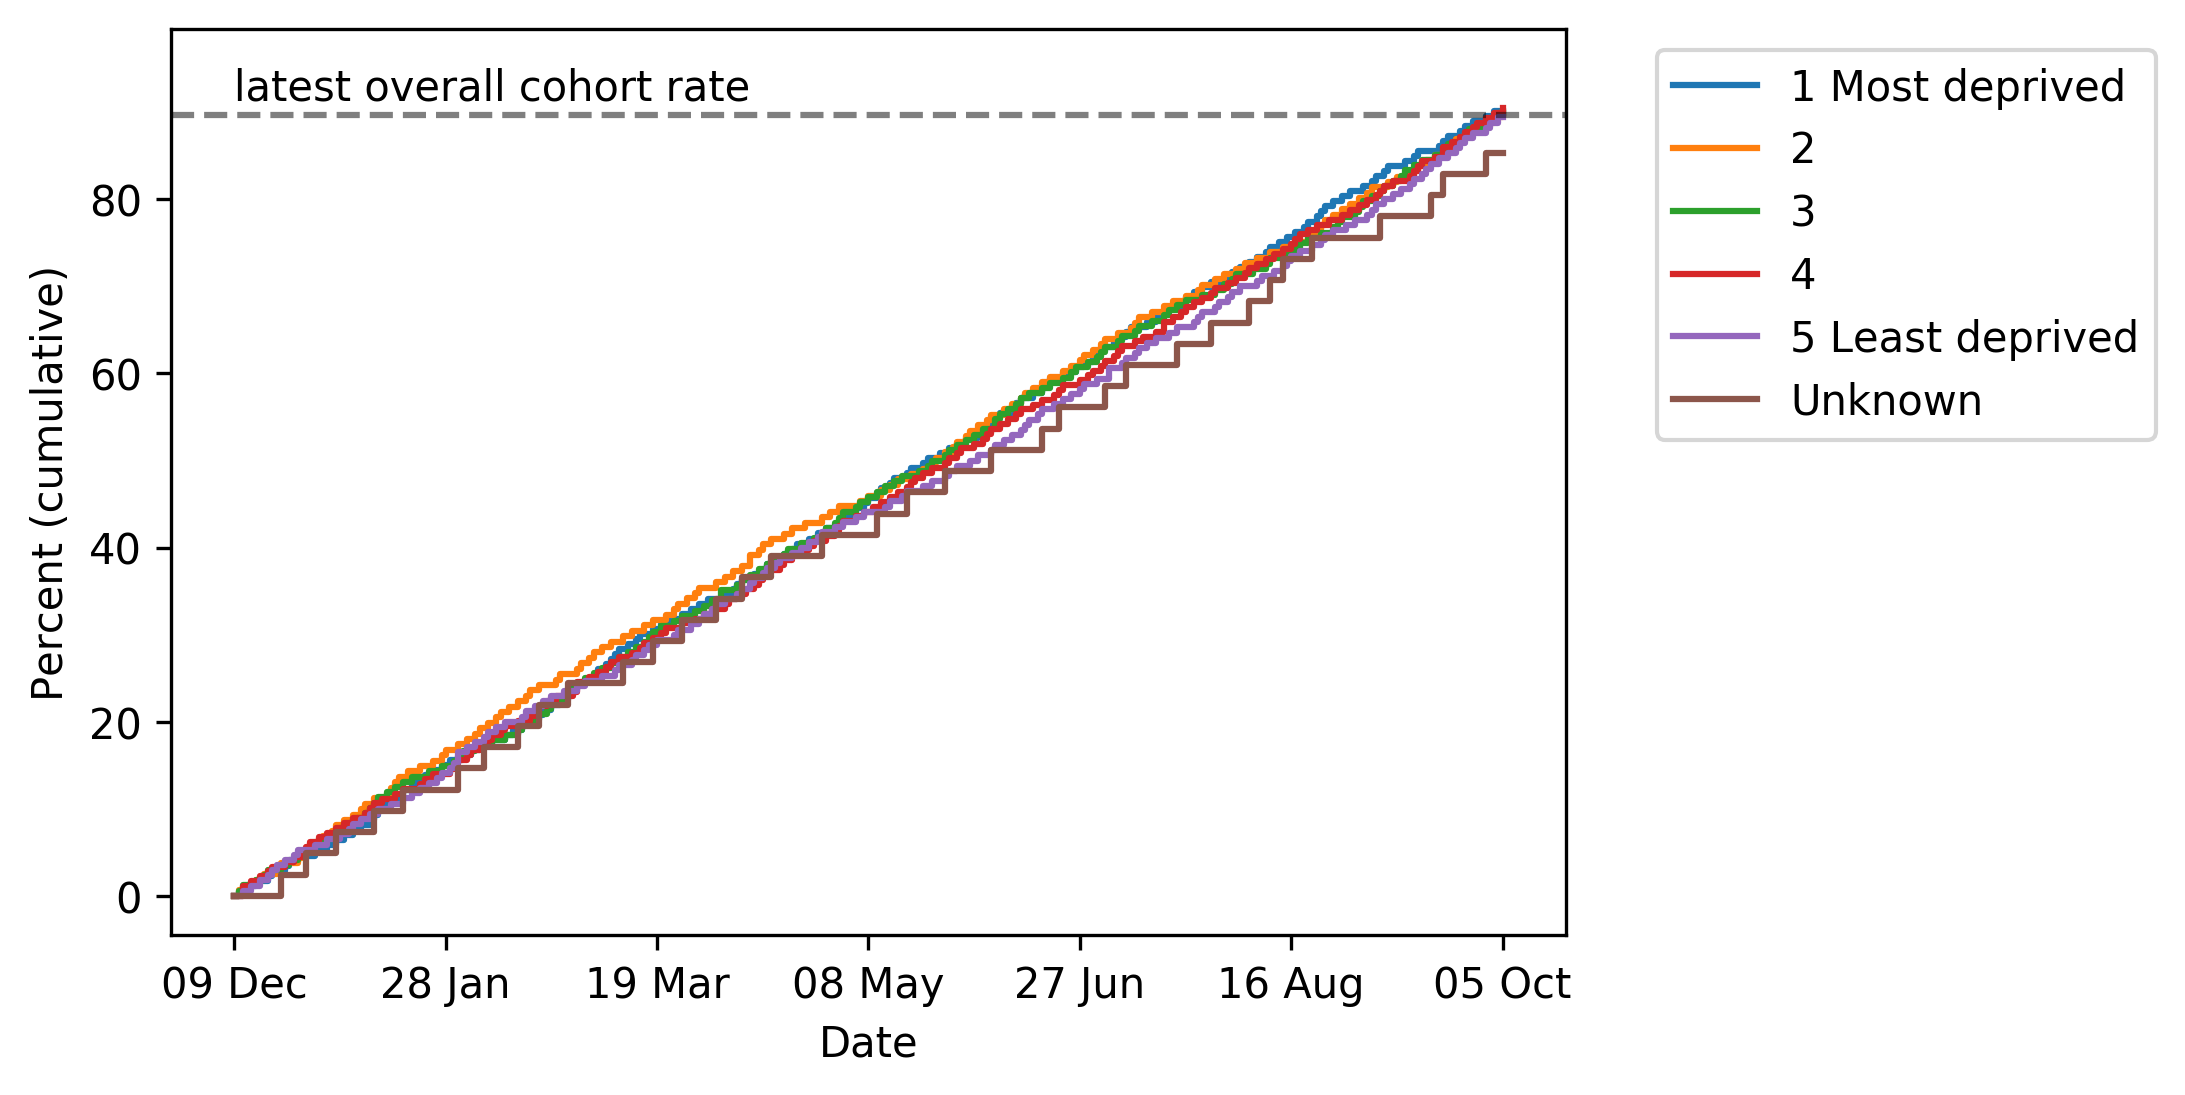

In [11]:
display(Markdown("## 40-49 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="40-49", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />
  - <a href=#Cumulative-vaccination-figures-among-80+-population>80+</a>  population
  - <a href=#Cumulative-vaccination-figures-among-70-79-population>70-79</a>  population
  - <a href=#Cumulative-vaccination-figures-among-care-home-population>care home (65+)</a> population
  - <a href=#Cumulative-vaccination-figures-among-shielding-(aged-16-69)-population>shielding (aged 16-69)</a>  population
  - <a href=#Cumulative-vaccination-figures-among-65-69-population>65-69</a>  population
  - <a href=#Cumulative-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population>LD (aged 16-64)</a> populations.
  - <a href=#Cumulative-vaccination-figures-among-60-64-population>60-64</a>  population
  - <a href=#Cumulative-vaccination-figures-among-55-59-population>55-59</a>  population
  - <a href=#Cumulative-vaccination-figures-among-50-54-population>50-54</a>  population
  - <a href=#Cumulative-vaccination-figures-among-40-49-population>40-49</a>  population
  - <a href=#Cumulative-vaccination-figures-among-18-39-population>18-39</a>  population
  - <a href=#Cumulative-vaccination-figures-among-16-17-population>16-17</a>  population
<br>

In [12]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="Cumulative vaccination figures",
                            files_to_exclude=[])
    
for filename in tablelist:
    df, title = import_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)
    show_table(df, title, latest_date_fmt, show_carehomes=True)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1940   
Sex                                       F                                                        1008   
                                          M                                                         931   
Age band                                  0                                                          21   
                                          0-15                                                      140   
                                          16-17                                                     147   
                                          18-29                                                     119   
                                          30-34                                                     133   
                                          35-39                                                     119   
                                          40-44                                                     126   
                                          45-49                                                     126   
                                          50-54                                                      91   
                                          55-59                                                     119   
                                          60-64                                                     133   
                                          65-69                                                     119   
                                          70-74                                                     154   
                                          75-79                                                     119   
                                          80-84                                                     126   
                                          85-89                                                     126   
                                          90+                                                        21   
Ethnicity (broad categories)              Black                                                     322   
                                          Mixed                                                     308   
                                          Other                                                     350   
                                          South Asian                                               315   
                                          Unknown                                                   301   
                                          White                                                     343   
ethnicity 16 groups                        African                                                  112   
                                           Bangladeshi or British Bangladeshi                        91   
                                           Caribbean                                                105   
                                           Chinese                                                   84   
                                           Other                                                     84   
                                           Other Asian                                               98   
                                          British or Mixed British                                  126   
                                          Indian or British Indian                                  105   
                                          Irish                                                      98   
                                          Other Black                                                98   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  3104   
Sex                                       F                                                        1617   
                                          M                                                        1491   
Age band                                  0                                                          35   
                                          0-15                                                      224   
                                          16-17                                                     217   
                                          18-29                                                     189   
                                          30-34                                                     189   
                                          35-39                                                     196   
                                          40-44                                                     203   
                                          45-49                                                     196   
                                          50-54                                                     189   
                                          55-59                                                     203   
                                          60-64                                                     189   
                                          65-69                                                     196   
                                          70-74                                                     182   
                                          75-79                                                     224   
                                          80-84                                                     238   
                                          85-89                                                     196   
                                          90+                                                        35   
Ethnicity (broad categories)              Black                                                     539   
                                          Mixed                                                     532   
                                          Other                                                     518   
                                          South Asian                                               539   
                                          Unknown                                                   455   
                                          White                                                     518   
ethnicity 16 groups                        African                                                  168   
                                           Bangladeshi or British Bangladeshi                       182   
                                           Caribbean                                                175   
                                           Chinese                                                  161   
                                           Other                                                    154   
                                           Other Asian                                              161   
                                          British or Mixed British                                  154   
                                          Indian or British Indian                                  161   
                                          Irish                                                     175   
                                          Other Black                                               182   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                     Group                                   
overall                      overall                          1236   
Sex                          F                                 630   
                             M                                 602   
Age band                     0                                  14   
                             0-15                               77   
                             16-17                              77   
                             18-29                              77   
                             30-34                              84   
                             35-39                              77   
                             40-44                              77   
                             45-49                              77   
                             50-54                              84   
                             55-59                              84   
                             60-64                              77   
                             65-69                              77   
                             70-74                             105   
                             75-79                              84   
                             80-84                              77   
                             85-89                              84   
                             90+                                14   
Ethnicity (broad categories) Black                             203   
                             Mixed                             189   
                             Other                             238   
                             South Asian                       196   
                             Unknown                           189   
                             White                             224   
Dementia                     no                               1218   
                             yes                                14   

                                          Vaccinated at 05 Oct (%)  \
Category                     Group                                   
overall                      overall                          91.0   
Sex                          F                                90.9   
                             M                                90.5   
Age band                     0                                66.7   
                             0-15                             91.7   
                             16-17                           100.0   
                             18-29                            84.6   
                             30-34                            92.3   
                             35-39                           100.0   
                             40-44                            91.7   
                             45-49                            91.7   
                             50-54                            92.3   
                             55-59                            85.7   
                             60-64                            91.7   
                             65-69                            91.7   
                             70-74                           100.0   
                             75-79                            92.3   
                             80-84                            91.7   
                             85-89                            92.3   
                             90+                              66.7   
Ethnicity (broad categories) Black                            93.5   
                             Mixed                            90.0   
                             Other                            94.4   
                             South Asian                      90.3   
                             Unknown                          93.1   
                             White                 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                        
overall                                   overall                                393   
newly shielded since feb 15               no                                     385   
                                          yes                                      0   
Sex                                       F                                      196   
                                          M                                      196   
Age band                                  16-29                                   49   
                                          30-39                                   42   
                                          40-49                                   63   
                                          50-59                                   49   
                                          60-69                                   56   
                                          70-79                                   84   
                                          80+                                     42   
Ethnicity (broad categories)              Black                                   70   
                                          Mixed                                   77   
                                          Other                                   70   
                                          South Asian                             63   
                                          Unknown                                 49   
                                          White                                   70   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         77   
                                          2                                       77   
                                          3                                       77   
                                          4                                       77   
                                          5 Least deprived                        70   
                                          Unknown                                 21   
Learning disability                       no                                     385   
                                          yes                                      7   

                                                            Vaccinated at 05 Oct (%)  \
Category                                  Group                                        
overall                                   overall                               92.0   
newly shielded since feb 15               no                                    91.7   
                                          yes                                    0.0   
Sex                                       F                                     93.3   
                                          M                                     93.3   
Age band                                  16-29                                100.0   
                                          30-39                                 85.7   
                                          40-49                                100.0   
                                          50-59                                 87.5   
                                          60-69                                 88.9   
                                          70-79                                 85.7   
                                          80+                                   85.7   
Ethnicity (broad categories)              Black                                 90.9   
                                          Mixed                                 91.7   
                                          Other                                100.0   
                                          South Asian                           90.0   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1894   
Sex                                       F                                                         966   
                                          M                                                         931   
Ethnicity (broad categories)              Black                                                     336   
                                          Mixed                                                     315   
                                          Other                                                     308   
                                          South Asian                                               329   
                                          Unknown                                                   273   
                                          White                                                     336   
ethnicity 16 groups                        African                                                  126   
                                           Bangladeshi or British Bangladeshi                        98   
                                           Caribbean                                                 98   
                                           Chinese                                                   91   
                                           Other                                                    112   
                                           Other Asian                                               91   
                                          British or Mixed British                                   98   
                                          Indian or British Indian                                  105   
                                          Irish                                                      98   
                                          Other Black                                                84   
                                          Other White                                                98   
                                          Other mixed                                               112   
                                          Pakistani or British Pakistani                             98   
                                          Unknown                                                   273   
                                          White + Asian                                              98   
                                          White + Black African                                      98   
                                          White + Black Caribbean                                   119   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           364   
                                          2                                                         371   
                                          3                                                         343   
                                          4                                                         350   
                                          5 Least deprived                                          364   
                                          Unknown                                                    98   
BMI                                       30+                                                       602   
                                          under 30                                                 1295   
Chronic cardiac disease                   no                                                       1876   
                                          yes                                                        21   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                     Group                                   
overall                      overall                           721   
Sex                          F                                 378   
                             M                                 343   
Age band                     0                                   7   
                             0-15                               49   
                             16-17                              42   
                             18-29                              49   
                             30-34                              49   
                             35-39                              42   
                             40-44                              56   
                             45-49                              49   
                             50-54                              35   
                             55-59                              35   
                             60-64                              42   
                             65-69                              56   
                             70-74                              49   
                             75-79                              49   
                             80-84                              49   
                             85-89                              49   
                             90+                                 7   
Ethnicity (broad categories) Black                             133   
                             Mixed                             140   
                             Other                             133   
                             South Asian                       105   
                             Unknown                           105   
                             White                             112   

                                          Vaccinated at 05 Oct (%)  \
Category                     Group                                   
overall                      overall                          90.4   
Sex                          F                                90.0   
                             M                                89.1   
Age band                     0                               100.0   
                             0-15                            100.0   
                             16-17                            85.7   
                             18-29                            87.5   
                             30-34                           100.0   
                             35-39                            85.7   
                             40-44                            88.9   
                             45-49                            87.5   
                             50-54                            83.3   
                             55-59                            83.3   
                             60-64                            85.7   
                             65-69                            88.9   
                             70-74                            87.5   
                             75-79                            87.5   
                             80-84                            87.5   
                             85-89                            87.5   
                             90+                             100.0   
Ethnicity (broad categories) Black                            95.0   
                             Mixed                            90.9   
                             Other                            90.5   
                             South Asian                      83.3   
                             Unknown                          93.8   
                             White                            94.1   

                                          Total eligible  \
Category                     Group                         


**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

## 
 ## Cumulative vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2411   
Sex                                       F                                                        1225   
                                          M                                                        1183   
Ethnicity (broad categories)              Black                                                     413   
                                          Mixed                                                     441   
                                          Other                                                     420   
                                          South Asian                                               399   
                                          Unknown                                                   336   
                                          White                                                     406   
ethnicity 16 groups                        African                                                  147   
                                           Bangladeshi or British Bangladeshi                       133   
                                           Caribbean                                                119   
                                           Chinese                                                  133   
                                           Other                                                    126   
                                           Other Asian                                              140   
                                          British or Mixed British                                  112   
                                          Indian or British Indian                                  119   
                                          Irish                                                     126   
                                          Other Black                                               112   
                                          Other White                                               126   
                                          Other mixed                                               133   
                                          Pakistani or British Pakistani                            140   
                                          Unknown                                                   371   
                                          White + Asian                                             119   
                                          White + Black African                                     133   
                                          White + Black Caribbean                                   119   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           469   
                                          2                                                         476   
                                          3                                                         483   
                                          4                                                         434   
                                          5 Least deprived                                          441   
                                          Unknown                                                   112   
BMI                                       30+                                                       721   
                                          under 30                                                 1694   
Chronic cardiac disease                   no                                                       2380   
                                          yes                                                        28   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2930   
Sex                                       F                                                        1512   
                                          M                                                        1414   
Ethnicity (broad categories)              Black                                                     518   
                                          Mixed                                                     462   
                                          Other                                                     532   
                                          South Asian                                               476   
                                          Unknown                                                   441   
                                          White                                                     497   
ethnicity 16 groups                        African                                                  133   
                                           Bangladeshi or British Bangladeshi                       147   
                                           Caribbean                                                161   
                                           Chinese                                                  147   
                                           Other                                                    168   
                                           Other Asian                                              147   
                                          British or Mixed British                                  182   
                                          Indian or British Indian                                  133   
                                          Irish                                                     189   
                                          Other Black                                               154   
                                          Other White                                               147   
                                          Other mixed                                               175   
                                          Pakistani or British Pakistani                            161   
                                          Unknown                                                   441   
                                          White + Asian                                             140   
                                          White + Black African                                     140   
                                          White + Black Caribbean                                   175   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           546   
                                          2                                                         560   
                                          3                                                         532   
                                          4                                                         588   
                                          5 Least deprived                                          546   
                                          Unknown                                                   161   
BMI                                       30+                                                       938   
                                          under 30                                                 1995   
Chronic cardiac disease                   no                                                       2905   
                                          yes                                                        28   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  2974   
Sex                                       F                                                        1484   
                                          M                                                        1484   
Ethnicity (broad categories)              Black                                                     483   
                                          Mixed                                                     483   
                                          Other                                                     532   
                                          South Asian                                               511   
                                          Unknown                                                   441   
                                          White                                                     525   
ethnicity 16 groups                        African                                                  175   
                                           Bangladeshi or British Bangladeshi                       168   
                                           Caribbean                                                161   
                                           Chinese                                                  175   
                                           Other                                                    175   
                                           Other Asian                                              168   
                                          British or Mixed British                                  168   
                                          Indian or British Indian                                  154   
                                          Irish                                                     154   
                                          Other Black                                               147   
                                          Other White                                               133   
                                          Other mixed                                               161   
                                          Pakistani or British Pakistani                            147   
                                          Unknown                                                   420   
                                          White + Asian                                             175   
                                          White + Black African                                     161   
                                          White + Black Caribbean                                   133   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           567   
                                          2                                                         609   
                                          3                                                         560   
                                          4                                                         567   
                                          5 Least deprived                                          532   
                                          Unknown                                                   147   
BMI                                       30+                                                       917   
                                          under 30                                                 2058   
Chronic cardiac disease                   no                                                       2940   
                                          yes                                                        35   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 40-49 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  5602   
Sex                                       F                                                        2898   
                                          M                                                        2702   
Ethnicity (broad categories)              Black                                                     917   
                                          Mixed                                                     931   
                                          Other                                                     987   
                                          South Asian                                               987   
                                          Unknown                                                   854   
                                          White                                                     924   
ethnicity 16 groups                        African                                                  301   
                                           Bangladeshi or British Bangladeshi                       287   
                                           Caribbean                                                273   
                                           Chinese                                                  315   
                                           Other                                                    315   
                                           Other Asian                                              273   
                                          British or Mixed British                                  280   
                                          Indian or British Indian                                  315   
                                          Irish                                                     287   
                                          Other Black                                               287   
                                          Other White                                               315   
                                          Other mixed                                               287   
                                          Pakistani or British Pakistani                            301   
                                          Unknown                                                   847   
                                          White + Asian                                             301   
                                          White + Black African                                     322   
                                          White + Black Caribbean                                   294   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          1092   
                                          2                                                        1015   
                                          3                                                        1057   
                                          4                                                        1134   
                                          5 Least deprived                                         1064   
                                          Unknown                                                   245   

                                                                               Vaccinated at 05 Oct (%)  \
Category                                  Group                                                           
overall                                   overall                                                  89.7   
Sex                                       F                                                        90.4   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 30-39 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  5762   
Sex                                       F                                                        2891   
                                          M                                                        2870   
Ethnicity (broad categories)              Black                                                    1001   
                                          Mixed                                                     994   
                                          Other                                                     924   
                                          South Asian                                               987   
                                          Unknown                                                   868   
                                          White                                                     980   
ethnicity 16 groups                        African                                                  308   
                                           Bangladeshi or British Bangladeshi                       294   
                                           Caribbean                                                308   
                                           Chinese                                                  301   
                                           Other                                                    301   
                                           Other Asian                                              315   
                                          British or Mixed British                                  308   
                                          Indian or British Indian                                  336   
                                          Irish                                                     280   
                                          Other Black                                               294   
                                          Other White                                               294   
                                          Other mixed                                               308   
                                          Pakistani or British Pakistani                            343   
                                          Unknown                                                   840   
                                          White + Asian                                             322   
                                          White + Black African                                     315   
                                          White + Black Caribbean                                   301   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          1127   
                                          2                                                        1113   
                                          3                                                        1099   
                                          4                                                        1113   
                                          5 Least deprived                                         1029   
                                          Unknown                                                   273   

                                                                               Vaccinated at 05 Oct (%)  \
Category                                  Group                                                           
overall                                   overall                                                  90.1   
Sex                                       F                                                        90.6   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 18-29 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                                           
overall                                   overall                                                  6747   
Sex                                       F                                                        3458   
                                          M                                                        3290   
Ethnicity (broad categories)              Black                                                    1120   
                                          Mixed                                                    1183   
                                          Other                                                    1127   
                                          South Asian                                              1176   
                                          Unknown                                                   987   
                                          White                                                    1155   
ethnicity 16 groups                        African                                                  385   
                                           Bangladeshi or British Bangladeshi                       392   
                                           Caribbean                                                357   
                                           Chinese                                                  371   
                                           Other                                                    364   
                                           Other Asian                                              371   
                                          British or Mixed British                                  322   
                                          Indian or British Indian                                  343   
                                          Irish                                                     350   
                                          Other Black                                               350   
                                          Other White                                               322   
                                          Other mixed                                               385   
                                          Pakistani or British Pakistani                            336   
                                          Unknown                                                   994   
                                          White + Asian                                             392   
                                          White + Black African                                     357   
                                          White + Black Caribbean                                   357   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          1253   
                                          2                                                        1316   
                                          3                                                        1323   
                                          4                                                        1330   
                                          5 Least deprived                                         1211   
                                          Unknown                                                   315   

                                                                               Vaccinated at 05 Oct (%)  \
Category                                  Group                                                           
overall                                   overall                                                  90.2   
Sex                                       F                                                        90.1   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 16-17 population 
 Please refer to footnotes below table for information.

Vaccinated at 05 Oct (n)  \
Category                                  Group                                        
overall                                   overall                               9287   
Sex                                       F                                     4753   
                                          M                                     4536   
Ethnicity (broad categories)              Black                                 1540   
                                          Mixed                                 1582   
                                          Other                                 1568   
                                          South Asian                           1645   
                                          Unknown                               1421   
                                          White                                 1526   
Index of Multiple Deprivation (quintiles) 1 Most deprived                       1820   
                                          2                                     1750   
                                          3                                     1722   
                                          4                                     1722   
                                          5 Least deprived                      1820   
                                          Unknown                                448   

                                                            Vaccinated at 05 Oct (%)  \
Category                                  Group                                        
overall                                   overall                               90.3   
Sex                                       F                                     90.3   
                                          M                                     90.3   
Ethnicity (broad categories)              Black                                 90.5   
                                          Mixed                                 91.1   
                                          Other                                 89.2   
                                          South Asian                           91.1   
                                          Unknown                               89.4   
                                          White                                 89.7   
Index of Multiple Deprivation (quintiles) 1 Most deprived                       89.3   
                                          2                                     89.6   
                                          3                                     91.4   
                                          4                                     91.1   
                                          5 Least deprived                      89.3   
                                          Unknown                               90.1   

                                                            Total eligible  \
Category                                  Group                              
overall                                   overall                    10290   
Sex                                       F                           5264   
                                          M                           5026   
Ethnicity (broad categories)              Black                       1701   
                                          Mixed                       1736   
                                          Other                       1757   
                                          South Asian                 1806   
                                          Unknown                     1589   
                                          White                       1701   
Index of Multiple Deprivation (quintiles) 1 Most deprived             2037   
                                          2                           1953   
                                          3         

**Footnotes:**
- Patient counts rounded to the nearest 7

### 
## Appendix 
### Ethnicity coverage for each eligible group <a name='ethnicity' />

In [13]:
from create_report import get_savepath
savepath = get_savepath()
tab = pd.read_csv(os.path.join(savepath["text"], "ethnicity_coverage.csv")).set_index("group")
tab.index = tab.index.str.replace("vaccinated 18-29", "18-29")
display(Markdown("- Ethnicity information is primarily retrieved from GP records. \
                 \n- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present. \
                 \n - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity \
                 \n recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).\
                 \n- Patient counts are rounded to the nearest 7"))

tab[["total population (n)","ethnicity coverage (%)"]]

- Ethnicity information is primarily retrieved from GP records.                  
- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present.                  
 - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity                  
 recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).                 
- Patient counts are rounded to the nearest 7

total population (n)  ethnicity coverage (%)
group                                                               
80+                                     2156                    84.4
70-79                                   3500                    85.0
care home                               1358                    84.5
shielding (aged 16-69)                   427                    86.9
65-69                                   2100                    85.3
LD (aged 16-64)                          798                    86.0
60-64                                   2667                    86.1
55-59                                   3248                    84.7
50-54                                   3339                    85.3
40-49                                   6244                    84.9
30-39                                   6398                    84.8
18-29                                   7476                    85.3
16-17                                  10290                    84.6